In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainSet = pd.read_csv("TrainingSet.csv")
crossVal = pd.read_csv("CrossVal.csv")
testSet = pd.read_csv("TestSet.csv")

In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
dtypes = {'Semana':'uint8',
          'Agencia_ID': 'uint16',
          'Canal_ID': 'uint8',
          'Ruta_SAK': 'uint16',
          'Cliente_ID': 'uint32',
          'Producto_ID': 'uint16',
          'Demanda_uni_equil': 'uint16',
          'CatProductID' : 'uint16',
          'CleanClientID' : 'float16',
          'TownID' : 'uint16',
          'AggProductSales' : 'float32',
          'AvgClientProdDemand' : 'float16',
          'AggTownProductDemand' : 'float32',
          'AvgWeeklyClientDemand' : 'float32',
          'StdClientProdDemand' : 'float16',
          'AggRouteProdDemand' : 'float16',
          'NoOfRoutesinDepot' : 'float16',
          'AverageClientProdCount' : 'float16',
          'PriorWeekDem1' : 'float16',
          'PriorWeekDem2' : 'float16',
          'PriorWeekDem3' : 'float16',
          'PriorWeekCatDem1' : 'float16',
          'PriorWeekCatDem2' : 'float16'
         }

In [6]:
trainSet = trainSet.astype(dtypes)
crossVal = crossVal.astype(dtypes)
testSet = testSet.astype(dtypes)

In [8]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy.stats import norm,boxcox

In [9]:
X_train = trainSet.copy()
y_train = boxcox(trainSet['Demanda_uni_equil'] + 1)[0]
X_test = crossVal.copy()
y_test = boxcox(crossVal['Demanda_uni_equil'] + 1)[0]
X_train.drop(["Demanda_uni_equil"],axis=1, inplace=True)
X_test.drop(["Demanda_uni_equil"],axis=1, inplace=True)

In [13]:
#RandomizedSearchCV on the model
from scipy.stats import uniform, randint
from sklearn.model_selection import KFold, RandomizedSearchCV


params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(5, 12), # default 3
    "n_estimators": randint(100, 200), # default 100
    "subsample": uniform(0.6, 0.4),
    "num_leaves": randint(30,60)
}
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

search = RandomizedSearchCV(lgb.LGBMRegressor(objective="Regression",metric= ['l2', 'l1']), param_distributions=params, random_state=42, n_iter=20, cv=kfold, verbose=1, n_jobs=1, return_train_score=True)


In [25]:
search.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test, y_test)],
        eval_metric=['l1','l2'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[1]	valid_0's l2: 0.128335	valid_0's l1: 0.288419	valid_1's l2: 0.136187	valid_1's l1: 0.296618
[2]	valid_0's l2: 0.108543	valid_0's l1: 0.264	valid_1's l2: 0.121225	valid_1's l1: 0.277454
[3]	valid_0's l2: 0.0962642	valid_0's l1: 0.245717	valid_1's l2: 0.109383	valid_1's l1: 0.260078
[4]	valid_0's l2: 0.0891061	valid_0's l1: 0.233539	valid_1's l2: 0.107284	valid_1's l1: 0.254441
[5]	valid_0's l2: 0.0852259	valid_0's l1: 0.226219	valid_1's l2: 0.104849	valid_1's l1: 0.249397
[6]	valid_0's l2: 0.0833052	valid_0's l1: 0.222314	valid_1's l2: 0.105751	valid_1's l1: 0.248963
[7]	valid_0's l2: 0.0815196	valid_0's l1: 0.218956	valid_1's l2: 0.103812	valid_1's l1: 0.245365
[8]	valid_0's l2: 0.0802708	valid_0's l1: 0.216366	valid_1's l2: 0.101881	valid_1's l1: 0.242088
[9]	valid_0's l2: 0.0794553	valid_0's l1: 0.214755	valid_1's l2: 0.101719	valid_1's l1: 0.24124
[10]	valid_0's l2: 0.0788921	valid_0's l1: 0.213638	valid_1's l2: 0.10155	valid_1's l1: 0.240592
[11]	valid_0's l2: 0.078495	valid_0'

[86]	valid_0's l2: 0.0712515	valid_0's l1: 0.200878	valid_1's l2: 0.10932	valid_1's l1: 0.24797
[87]	valid_0's l2: 0.07122	valid_0's l1: 0.200829	valid_1's l2: 0.109418	valid_1's l1: 0.248079
[88]	valid_0's l2: 0.0711921	valid_0's l1: 0.200784	valid_1's l2: 0.109402	valid_1's l1: 0.248066
[89]	valid_0's l2: 0.0711749	valid_0's l1: 0.200757	valid_1's l2: 0.108984	valid_1's l1: 0.247556
[90]	valid_0's l2: 0.0711508	valid_0's l1: 0.200717	valid_1's l2: 0.108897	valid_1's l1: 0.247448
[91]	valid_0's l2: 0.0711258	valid_0's l1: 0.200682	valid_1's l2: 0.10887	valid_1's l1: 0.247437
[92]	valid_0's l2: 0.07111	valid_0's l1: 0.200659	valid_1's l2: 0.108854	valid_1's l1: 0.247414
[93]	valid_0's l2: 0.0710847	valid_0's l1: 0.200622	valid_1's l2: 0.109142	valid_1's l1: 0.247766
[94]	valid_0's l2: 0.0710642	valid_0's l1: 0.200592	valid_1's l2: 0.109505	valid_1's l1: 0.248205
[95]	valid_0's l2: 0.0710327	valid_0's l1: 0.200552	valid_1's l2: 0.109563	valid_1's l1: 0.248304
[96]	valid_0's l2: 0.071008

[170]	valid_0's l2: 0.0696843	valid_0's l1: 0.198589	valid_1's l2: 0.114273	valid_1's l1: 0.254037
[171]	valid_0's l2: 0.0696724	valid_0's l1: 0.198571	valid_1's l2: 0.114314	valid_1's l1: 0.254081
[1]	valid_0's l2: 0.128339	valid_0's l1: 0.28846	valid_1's l2: 0.13591	valid_1's l1: 0.296307
[2]	valid_0's l2: 0.108582	valid_0's l1: 0.264069	valid_1's l2: 0.120952	valid_1's l1: 0.277138
[3]	valid_0's l2: 0.0962618	valid_0's l1: 0.24573	valid_1's l2: 0.108722	valid_1's l1: 0.259405
[4]	valid_0's l2: 0.0891175	valid_0's l1: 0.233532	valid_1's l2: 0.106409	valid_1's l1: 0.253453
[5]	valid_0's l2: 0.0851845	valid_0's l1: 0.22608	valid_1's l2: 0.103955	valid_1's l1: 0.248476
[6]	valid_0's l2: 0.0833074	valid_0's l1: 0.222305	valid_1's l2: 0.105529	valid_1's l1: 0.248869
[7]	valid_0's l2: 0.081435	valid_0's l1: 0.218807	valid_1's l2: 0.104526	valid_1's l1: 0.246685
[8]	valid_0's l2: 0.0801803	valid_0's l1: 0.216317	valid_1's l2: 0.102736	valid_1's l1: 0.24364
[9]	valid_0's l2: 0.0792857	valid_

[85]	valid_0's l2: 0.0713827	valid_0's l1: 0.201108	valid_1's l2: 0.108986	valid_1's l1: 0.247867
[86]	valid_0's l2: 0.0713542	valid_0's l1: 0.201062	valid_1's l2: 0.109013	valid_1's l1: 0.24789
[87]	valid_0's l2: 0.0713103	valid_0's l1: 0.201005	valid_1's l2: 0.109121	valid_1's l1: 0.248019
[88]	valid_0's l2: 0.0712927	valid_0's l1: 0.200984	valid_1's l2: 0.109124	valid_1's l1: 0.248027
[89]	valid_0's l2: 0.0712743	valid_0's l1: 0.200957	valid_1's l2: 0.10911	valid_1's l1: 0.248033
[90]	valid_0's l2: 0.0712368	valid_0's l1: 0.200905	valid_1's l2: 0.109048	valid_1's l1: 0.247946
[91]	valid_0's l2: 0.0711978	valid_0's l1: 0.200852	valid_1's l2: 0.109148	valid_1's l1: 0.248077
[92]	valid_0's l2: 0.0711479	valid_0's l1: 0.200769	valid_1's l2: 0.109244	valid_1's l1: 0.248185
[93]	valid_0's l2: 0.0711173	valid_0's l1: 0.200706	valid_1's l2: 0.109237	valid_1's l1: 0.248169
[94]	valid_0's l2: 0.0710892	valid_0's l1: 0.200665	valid_1's l2: 0.10929	valid_1's l1: 0.248208
[95]	valid_0's l2: 0.07

[169]	valid_0's l2: 0.0697562	valid_0's l1: 0.198742	valid_1's l2: 0.110437	valid_1's l1: 0.249949
[170]	valid_0's l2: 0.0697437	valid_0's l1: 0.198723	valid_1's l2: 0.110419	valid_1's l1: 0.249926
[171]	valid_0's l2: 0.0697276	valid_0's l1: 0.198701	valid_1's l2: 0.110389	valid_1's l1: 0.249888
[1]	valid_0's l2: 0.128352	valid_0's l1: 0.288449	valid_1's l2: 0.136084	valid_1's l1: 0.296525
[2]	valid_0's l2: 0.108517	valid_0's l1: 0.263916	valid_1's l2: 0.121806	valid_1's l1: 0.278331
[3]	valid_0's l2: 0.0961291	valid_0's l1: 0.245644	valid_1's l2: 0.110204	valid_1's l1: 0.261513
[4]	valid_0's l2: 0.0895694	valid_0's l1: 0.233986	valid_1's l2: 0.106066	valid_1's l1: 0.252977
[5]	valid_0's l2: 0.0857889	valid_0's l1: 0.22685	valid_1's l2: 0.102946	valid_1's l1: 0.247151
[6]	valid_0's l2: 0.0838558	valid_0's l1: 0.223013	valid_1's l2: 0.103888	valid_1's l1: 0.246868
[7]	valid_0's l2: 0.0816836	valid_0's l1: 0.219236	valid_1's l2: 0.101836	valid_1's l1: 0.243689
[8]	valid_0's l2: 0.0802941

[83]	valid_0's l2: 0.0713552	valid_0's l1: 0.201024	valid_1's l2: 0.106	valid_1's l1: 0.243826
[84]	valid_0's l2: 0.0713356	valid_0's l1: 0.200998	valid_1's l2: 0.106013	valid_1's l1: 0.243838
[85]	valid_0's l2: 0.0713138	valid_0's l1: 0.200966	valid_1's l2: 0.106062	valid_1's l1: 0.243894
[86]	valid_0's l2: 0.0712955	valid_0's l1: 0.200942	valid_1's l2: 0.106182	valid_1's l1: 0.244028
[87]	valid_0's l2: 0.0712664	valid_0's l1: 0.200903	valid_1's l2: 0.106207	valid_1's l1: 0.244065
[88]	valid_0's l2: 0.071244	valid_0's l1: 0.20087	valid_1's l2: 0.106242	valid_1's l1: 0.244098
[89]	valid_0's l2: 0.0712198	valid_0's l1: 0.200831	valid_1's l2: 0.10626	valid_1's l1: 0.244118
[90]	valid_0's l2: 0.0711955	valid_0's l1: 0.2008	valid_1's l2: 0.106089	valid_1's l1: 0.243883
[91]	valid_0's l2: 0.0711459	valid_0's l1: 0.200724	valid_1's l2: 0.106225	valid_1's l1: 0.24409
[92]	valid_0's l2: 0.0711175	valid_0's l1: 0.200683	valid_1's l2: 0.106514	valid_1's l1: 0.244425
[93]	valid_0's l2: 0.0710935	

[168]	valid_0's l2: 0.0696729	valid_0's l1: 0.198583	valid_1's l2: 0.108969	valid_1's l1: 0.247917
[169]	valid_0's l2: 0.0696628	valid_0's l1: 0.198568	valid_1's l2: 0.109028	valid_1's l1: 0.247982
[170]	valid_0's l2: 0.0696484	valid_0's l1: 0.198548	valid_1's l2: 0.109037	valid_1's l1: 0.247998
[171]	valid_0's l2: 0.0696327	valid_0's l1: 0.198527	valid_1's l2: 0.10904	valid_1's l1: 0.248025
[1]	valid_0's l2: 0.128308	valid_0's l1: 0.288384	valid_1's l2: 0.136327	valid_1's l1: 0.296864
[2]	valid_0's l2: 0.108549	valid_0's l1: 0.263991	valid_1's l2: 0.120959	valid_1's l1: 0.277256
[3]	valid_0's l2: 0.0963141	valid_0's l1: 0.245816	valid_1's l2: 0.112056	valid_1's l1: 0.263252
[4]	valid_0's l2: 0.0893297	valid_0's l1: 0.233761	valid_1's l2: 0.106644	valid_1's l1: 0.25361
[5]	valid_0's l2: 0.0853433	valid_0's l1: 0.226274	valid_1's l2: 0.103735	valid_1's l1: 0.247964
[6]	valid_0's l2: 0.0834243	valid_0's l1: 0.222368	valid_1's l2: 0.104267	valid_1's l1: 0.247208
[7]	valid_0's l2: 0.081477

[83]	valid_0's l2: 0.0713678	valid_0's l1: 0.201054	valid_1's l2: 0.104643	valid_1's l1: 0.24207
[84]	valid_0's l2: 0.0713285	valid_0's l1: 0.200985	valid_1's l2: 0.104604	valid_1's l1: 0.242002
[85]	valid_0's l2: 0.071305	valid_0's l1: 0.200939	valid_1's l2: 0.104891	valid_1's l1: 0.242338
[86]	valid_0's l2: 0.0712838	valid_0's l1: 0.20091	valid_1's l2: 0.104853	valid_1's l1: 0.242283
[87]	valid_0's l2: 0.071251	valid_0's l1: 0.200858	valid_1's l2: 0.105089	valid_1's l1: 0.24258
[88]	valid_0's l2: 0.0712184	valid_0's l1: 0.20081	valid_1's l2: 0.104884	valid_1's l1: 0.242321
[89]	valid_0's l2: 0.0711767	valid_0's l1: 0.200738	valid_1's l2: 0.105093	valid_1's l1: 0.24256
[90]	valid_0's l2: 0.0711584	valid_0's l1: 0.20071	valid_1's l2: 0.105158	valid_1's l1: 0.242635
[91]	valid_0's l2: 0.0711448	valid_0's l1: 0.20069	valid_1's l2: 0.105179	valid_1's l1: 0.242748
[92]	valid_0's l2: 0.0711169	valid_0's l1: 0.200649	valid_1's l2: 0.105154	valid_1's l1: 0.242717
[93]	valid_0's l2: 0.0710981	

[167]	valid_0's l2: 0.0697489	valid_0's l1: 0.198693	valid_1's l2: 0.107237	valid_1's l1: 0.245474
[168]	valid_0's l2: 0.0697368	valid_0's l1: 0.198675	valid_1's l2: 0.107198	valid_1's l1: 0.245423
[169]	valid_0's l2: 0.069715	valid_0's l1: 0.19864	valid_1's l2: 0.107259	valid_1's l1: 0.245499
[170]	valid_0's l2: 0.0696996	valid_0's l1: 0.198625	valid_1's l2: 0.107342	valid_1's l1: 0.245607
[171]	valid_0's l2: 0.0696896	valid_0's l1: 0.198614	valid_1's l2: 0.107339	valid_1's l1: 0.245605
[1]	valid_0's l2: 0.128346	valid_0's l1: 0.288429	valid_1's l2: 0.136144	valid_1's l1: 0.296613
[2]	valid_0's l2: 0.108584	valid_0's l1: 0.264037	valid_1's l2: 0.120721	valid_1's l1: 0.277017
[3]	valid_0's l2: 0.0963193	valid_0's l1: 0.245777	valid_1's l2: 0.108442	valid_1's l1: 0.259158
[4]	valid_0's l2: 0.0892455	valid_0's l1: 0.2337	valid_1's l2: 0.1064	valid_1's l1: 0.253509
[5]	valid_0's l2: 0.0852153	valid_0's l1: 0.226143	valid_1's l2: 0.104261	valid_1's l1: 0.248887
[6]	valid_0's l2: 0.0832774	

[81]	valid_0's l2: 0.071392	valid_0's l1: 0.20109	valid_1's l2: 0.106303	valid_1's l1: 0.244219
[82]	valid_0's l2: 0.0713746	valid_0's l1: 0.201063	valid_1's l2: 0.106281	valid_1's l1: 0.244211
[83]	valid_0's l2: 0.0713417	valid_0's l1: 0.201013	valid_1's l2: 0.10637	valid_1's l1: 0.244318
[84]	valid_0's l2: 0.0713138	valid_0's l1: 0.20097	valid_1's l2: 0.106382	valid_1's l1: 0.244338
[85]	valid_0's l2: 0.0712774	valid_0's l1: 0.200914	valid_1's l2: 0.106384	valid_1's l1: 0.244352
[86]	valid_0's l2: 0.0712405	valid_0's l1: 0.200864	valid_1's l2: 0.106479	valid_1's l1: 0.244462
[87]	valid_0's l2: 0.0712177	valid_0's l1: 0.200833	valid_1's l2: 0.106403	valid_1's l1: 0.244387
[88]	valid_0's l2: 0.0711821	valid_0's l1: 0.20078	valid_1's l2: 0.106558	valid_1's l1: 0.244584
[89]	valid_0's l2: 0.0711592	valid_0's l1: 0.20075	valid_1's l2: 0.106571	valid_1's l1: 0.244597
[90]	valid_0's l2: 0.0711318	valid_0's l1: 0.200708	valid_1's l2: 0.106696	valid_1's l1: 0.244765
[91]	valid_0's l2: 0.07110

[167]	valid_0's l2: 0.0697092	valid_0's l1: 0.19868	valid_1's l2: 0.108255	valid_1's l1: 0.246985
[168]	valid_0's l2: 0.069702	valid_0's l1: 0.198671	valid_1's l2: 0.108272	valid_1's l1: 0.247014
[169]	valid_0's l2: 0.0696895	valid_0's l1: 0.198657	valid_1's l2: 0.108307	valid_1's l1: 0.247061
[170]	valid_0's l2: 0.0696802	valid_0's l1: 0.198644	valid_1's l2: 0.108301	valid_1's l1: 0.247055
[171]	valid_0's l2: 0.0696741	valid_0's l1: 0.198639	valid_1's l2: 0.108301	valid_1's l1: 0.247219
[1]	valid_0's l2: 0.160469	valid_0's l1: 0.32518	valid_1's l2: 0.165615	valid_1's l1: 0.3303
[2]	valid_0's l2: 0.153134	valid_0's l1: 0.317378	valid_1's l2: 0.158768	valid_1's l1: 0.322781
[3]	valid_0's l2: 0.145736	valid_0's l1: 0.309197	valid_1's l2: 0.152087	valid_1's l1: 0.315351
[4]	valid_0's l2: 0.139142	valid_0's l1: 0.301612	valid_1's l2: 0.146147	valid_1's l1: 0.308515
[5]	valid_0's l2: 0.133263	valid_0's l1: 0.294652	valid_1's l2: 0.140417	valid_1's l1: 0.301881
[6]	valid_0's l2: 0.12862	vali

[80]	valid_0's l2: 0.076322	valid_0's l1: 0.209196	valid_1's l2: 0.0990412	valid_1's l1: 0.236845
[81]	valid_0's l2: 0.0762708	valid_0's l1: 0.209096	valid_1's l2: 0.0990698	valid_1's l1: 0.236842
[82]	valid_0's l2: 0.0762062	valid_0's l1: 0.208994	valid_1's l2: 0.0991008	valid_1's l1: 0.236844
[83]	valid_0's l2: 0.0761632	valid_0's l1: 0.208915	valid_1's l2: 0.0991691	valid_1's l1: 0.236876
[84]	valid_0's l2: 0.0761	valid_0's l1: 0.208804	valid_1's l2: 0.0990672	valid_1's l1: 0.236711
[85]	valid_0's l2: 0.076027	valid_0's l1: 0.208681	valid_1's l2: 0.0990401	valid_1's l1: 0.236634
[86]	valid_0's l2: 0.075971	valid_0's l1: 0.208583	valid_1's l2: 0.0990398	valid_1's l1: 0.236592
[87]	valid_0's l2: 0.0759211	valid_0's l1: 0.208502	valid_1's l2: 0.0990383	valid_1's l1: 0.23658
[88]	valid_0's l2: 0.0758826	valid_0's l1: 0.20842	valid_1's l2: 0.0990205	valid_1's l1: 0.236523
[89]	valid_0's l2: 0.0758448	valid_0's l1: 0.208351	valid_1's l2: 0.0989768	valid_1's l1: 0.236448
[90]	valid_0's l2:

[59]	valid_0's l2: 0.0779293	valid_0's l1: 0.212215	valid_1's l2: 0.0982479	valid_1's l1: 0.236835
[60]	valid_0's l2: 0.0778321	valid_0's l1: 0.212026	valid_1's l2: 0.0982453	valid_1's l1: 0.236735
[61]	valid_0's l2: 0.0777574	valid_0's l1: 0.211876	valid_1's l2: 0.0984112	valid_1's l1: 0.236853
[62]	valid_0's l2: 0.0776216	valid_0's l1: 0.21164	valid_1's l2: 0.0984406	valid_1's l1: 0.236838
[63]	valid_0's l2: 0.0775301	valid_0's l1: 0.211462	valid_1's l2: 0.0985759	valid_1's l1: 0.236931
[64]	valid_0's l2: 0.0774186	valid_0's l1: 0.211244	valid_1's l2: 0.0984889	valid_1's l1: 0.236735
[65]	valid_0's l2: 0.0773505	valid_0's l1: 0.211105	valid_1's l2: 0.0984793	valid_1's l1: 0.236662
[66]	valid_0's l2: 0.0772653	valid_0's l1: 0.210938	valid_1's l2: 0.0983672	valid_1's l1: 0.236442
[67]	valid_0's l2: 0.0771771	valid_0's l1: 0.210781	valid_1's l2: 0.098353	valid_1's l1: 0.23638
[68]	valid_0's l2: 0.0770879	valid_0's l1: 0.210626	valid_1's l2: 0.0984235	valid_1's l1: 0.236426
[69]	valid_0'

[142]	valid_0's l2: 0.0738351	valid_0's l1: 0.204953	valid_1's l2: 0.0995118	valid_1's l1: 0.235899
[143]	valid_0's l2: 0.0738003	valid_0's l1: 0.204893	valid_1's l2: 0.0994913	valid_1's l1: 0.235868
[144]	valid_0's l2: 0.0737735	valid_0's l1: 0.204848	valid_1's l2: 0.099466	valid_1's l1: 0.235834
[145]	valid_0's l2: 0.0737578	valid_0's l1: 0.204827	valid_1's l2: 0.0994606	valid_1's l1: 0.235822
[146]	valid_0's l2: 0.0737438	valid_0's l1: 0.204794	valid_1's l2: 0.099448	valid_1's l1: 0.235794
[147]	valid_0's l2: 0.073719	valid_0's l1: 0.204754	valid_1's l2: 0.0994626	valid_1's l1: 0.23581
[148]	valid_0's l2: 0.0736809	valid_0's l1: 0.204683	valid_1's l2: 0.0993972	valid_1's l1: 0.235709
[149]	valid_0's l2: 0.0736578	valid_0's l1: 0.204653	valid_1's l2: 0.0994021	valid_1's l1: 0.235713
[150]	valid_0's l2: 0.0736365	valid_0's l1: 0.204618	valid_1's l2: 0.0994441	valid_1's l1: 0.235766
[151]	valid_0's l2: 0.0736185	valid_0's l1: 0.204584	valid_1's l2: 0.0994399	valid_1's l1: 0.235744
[152

[39]	valid_0's l2: 0.081252	valid_0's l1: 0.218915	valid_1's l2: 0.0982171	valid_1's l1: 0.239668
[40]	valid_0's l2: 0.0810109	valid_0's l1: 0.218403	valid_1's l2: 0.0980642	valid_1's l1: 0.239273
[41]	valid_0's l2: 0.0808068	valid_0's l1: 0.217973	valid_1's l2: 0.0982064	valid_1's l1: 0.239257
[42]	valid_0's l2: 0.0806002	valid_0's l1: 0.217546	valid_1's l2: 0.0983253	valid_1's l1: 0.239223
[43]	valid_0's l2: 0.0803068	valid_0's l1: 0.217018	valid_1's l2: 0.0979307	valid_1's l1: 0.238561
[44]	valid_0's l2: 0.080095	valid_0's l1: 0.216587	valid_1's l2: 0.097918	valid_1's l1: 0.238388
[45]	valid_0's l2: 0.0798612	valid_0's l1: 0.216131	valid_1's l2: 0.0977255	valid_1's l1: 0.238001
[46]	valid_0's l2: 0.0796757	valid_0's l1: 0.215776	valid_1's l2: 0.0978607	valid_1's l1: 0.238032
[47]	valid_0's l2: 0.0794839	valid_0's l1: 0.21539	valid_1's l2: 0.0977714	valid_1's l1: 0.237766
[48]	valid_0's l2: 0.0793323	valid_0's l1: 0.215066	valid_1's l2: 0.0978556	valid_1's l1: 0.237727
[49]	valid_0's

[122]	valid_0's l2: 0.0744751	valid_0's l1: 0.20602	valid_1's l2: 0.0988128	valid_1's l1: 0.23556
[123]	valid_0's l2: 0.0744437	valid_0's l1: 0.205966	valid_1's l2: 0.0988528	valid_1's l1: 0.235596
[124]	valid_0's l2: 0.0744013	valid_0's l1: 0.205895	valid_1's l2: 0.0988184	valid_1's l1: 0.235531
[125]	valid_0's l2: 0.0743754	valid_0's l1: 0.205855	valid_1's l2: 0.0988552	valid_1's l1: 0.235569
[126]	valid_0's l2: 0.0743573	valid_0's l1: 0.20582	valid_1's l2: 0.0988647	valid_1's l1: 0.235559
[127]	valid_0's l2: 0.0743167	valid_0's l1: 0.205742	valid_1's l2: 0.0988381	valid_1's l1: 0.235503
[128]	valid_0's l2: 0.0742933	valid_0's l1: 0.205712	valid_1's l2: 0.099073	valid_1's l1: 0.235767
[129]	valid_0's l2: 0.0742665	valid_0's l1: 0.205664	valid_1's l2: 0.0991512	valid_1's l1: 0.235856
[130]	valid_0's l2: 0.0742096	valid_0's l1: 0.205571	valid_1's l2: 0.0991483	valid_1's l1: 0.235836
[131]	valid_0's l2: 0.0741714	valid_0's l1: 0.205514	valid_1's l2: 0.0991743	valid_1's l1: 0.235854
[132

[19]	valid_0's l2: 0.0942437	valid_0's l1: 0.242816	valid_1's l2: 0.107429	valid_1's l1: 0.257663
[20]	valid_0's l2: 0.092936	valid_0's l1: 0.240608	valid_1's l2: 0.106383	valid_1's l1: 0.255928
[21]	valid_0's l2: 0.0918051	valid_0's l1: 0.238655	valid_1's l2: 0.105463	valid_1's l1: 0.254344
[22]	valid_0's l2: 0.0906949	valid_0's l1: 0.236732	valid_1's l2: 0.104184	valid_1's l1: 0.252336
[23]	valid_0's l2: 0.0897507	valid_0's l1: 0.235047	valid_1's l2: 0.103549	valid_1's l1: 0.251144
[24]	valid_0's l2: 0.0888057	valid_0's l1: 0.233331	valid_1's l2: 0.102695	valid_1's l1: 0.249649
[25]	valid_0's l2: 0.0879942	valid_0's l1: 0.23185	valid_1's l2: 0.101889	valid_1's l1: 0.248197
[26]	valid_0's l2: 0.0872746	valid_0's l1: 0.230514	valid_1's l2: 0.101614	valid_1's l1: 0.247429
[27]	valid_0's l2: 0.0866453	valid_0's l1: 0.229314	valid_1's l2: 0.101352	valid_1's l1: 0.246724
[28]	valid_0's l2: 0.0859923	valid_0's l1: 0.228089	valid_1's l2: 0.101197	valid_1's l1: 0.246229
[29]	valid_0's l2: 0.0

[103]	valid_0's l2: 0.0752311	valid_0's l1: 0.207292	valid_1's l2: 0.0984141	valid_1's l1: 0.235319
[104]	valid_0's l2: 0.0752035	valid_0's l1: 0.20725	valid_1's l2: 0.0984014	valid_1's l1: 0.235308
[105]	valid_0's l2: 0.0751598	valid_0's l1: 0.207177	valid_1's l2: 0.0982885	valid_1's l1: 0.235138
[106]	valid_0's l2: 0.0750979	valid_0's l1: 0.207076	valid_1's l2: 0.0982167	valid_1's l1: 0.23502
[107]	valid_0's l2: 0.0750551	valid_0's l1: 0.206997	valid_1's l2: 0.0982077	valid_1's l1: 0.234982
[108]	valid_0's l2: 0.0750026	valid_0's l1: 0.206901	valid_1's l2: 0.0981862	valid_1's l1: 0.23493
[109]	valid_0's l2: 0.0749782	valid_0's l1: 0.206857	valid_1's l2: 0.0981862	valid_1's l1: 0.234928
[110]	valid_0's l2: 0.0749481	valid_0's l1: 0.206809	valid_1's l2: 0.0983019	valid_1's l1: 0.235043
[111]	valid_0's l2: 0.074911	valid_0's l1: 0.206745	valid_1's l2: 0.0983228	valid_1's l1: 0.235057
[112]	valid_0's l2: 0.0748724	valid_0's l1: 0.206685	valid_1's l2: 0.0982929	valid_1's l1: 0.23501
[113]

[186]	valid_0's l2: 0.0731517	valid_0's l1: 0.203794	valid_1's l2: 0.0994609	valid_1's l1: 0.235869
[187]	valid_0's l2: 0.0731387	valid_0's l1: 0.203771	valid_1's l2: 0.0994515	valid_1's l1: 0.235856
[1]	valid_0's l2: 0.160472	valid_0's l1: 0.325189	valid_1's l2: 0.165631	valid_1's l1: 0.33034
[2]	valid_0's l2: 0.153151	valid_0's l1: 0.317394	valid_1's l2: 0.158778	valid_1's l1: 0.322829
[3]	valid_0's l2: 0.145756	valid_0's l1: 0.309214	valid_1's l2: 0.152083	valid_1's l1: 0.315371
[4]	valid_0's l2: 0.139211	valid_0's l1: 0.301687	valid_1's l2: 0.146102	valid_1's l1: 0.308468
[5]	valid_0's l2: 0.133337	valid_0's l1: 0.294742	valid_1's l2: 0.140331	valid_1's l1: 0.301773
[6]	valid_0's l2: 0.12864	valid_0's l1: 0.289094	valid_1's l2: 0.136333	valid_1's l1: 0.296898
[7]	valid_0's l2: 0.124444	valid_0's l1: 0.284007	valid_1's l2: 0.132758	valid_1's l1: 0.292542
[8]	valid_0's l2: 0.120071	valid_0's l1: 0.278728	valid_1's l2: 0.129033	valid_1's l1: 0.288029
[9]	valid_0's l2: 0.116209	valid_0

[83]	valid_0's l2: 0.0761142	valid_0's l1: 0.208865	valid_1's l2: 0.0986293	valid_1's l1: 0.236063
[84]	valid_0's l2: 0.0760615	valid_0's l1: 0.208773	valid_1's l2: 0.0985945	valid_1's l1: 0.235977
[85]	valid_0's l2: 0.0760063	valid_0's l1: 0.208678	valid_1's l2: 0.0985957	valid_1's l1: 0.235941
[86]	valid_0's l2: 0.0759508	valid_0's l1: 0.208586	valid_1's l2: 0.0985911	valid_1's l1: 0.235907
[87]	valid_0's l2: 0.0759154	valid_0's l1: 0.208521	valid_1's l2: 0.0987003	valid_1's l1: 0.236003
[88]	valid_0's l2: 0.0758735	valid_0's l1: 0.208436	valid_1's l2: 0.0987421	valid_1's l1: 0.236017
[89]	valid_0's l2: 0.0758264	valid_0's l1: 0.208353	valid_1's l2: 0.0987298	valid_1's l1: 0.235978
[90]	valid_0's l2: 0.0757922	valid_0's l1: 0.208302	valid_1's l2: 0.0988916	valid_1's l1: 0.236157
[91]	valid_0's l2: 0.0757423	valid_0's l1: 0.208211	valid_1's l2: 0.0989779	valid_1's l1: 0.236228
[92]	valid_0's l2: 0.0757042	valid_0's l1: 0.208133	valid_1's l2: 0.098937	valid_1's l1: 0.236149
[93]	valid_

[166]	valid_0's l2: 0.0733445	valid_0's l1: 0.204157	valid_1's l2: 0.0998916	valid_1's l1: 0.236463
[167]	valid_0's l2: 0.0733178	valid_0's l1: 0.204114	valid_1's l2: 0.0998005	valid_1's l1: 0.23633
[168]	valid_0's l2: 0.0732944	valid_0's l1: 0.204072	valid_1's l2: 0.0998324	valid_1's l1: 0.23637
[169]	valid_0's l2: 0.0732774	valid_0's l1: 0.204046	valid_1's l2: 0.0999604	valid_1's l1: 0.236519
[170]	valid_0's l2: 0.0732568	valid_0's l1: 0.204012	valid_1's l2: 0.0999665	valid_1's l1: 0.236524
[171]	valid_0's l2: 0.0732376	valid_0's l1: 0.203987	valid_1's l2: 0.0999694	valid_1's l1: 0.236534
[172]	valid_0's l2: 0.07322	valid_0's l1: 0.203962	valid_1's l2: 0.100028	valid_1's l1: 0.236583
[173]	valid_0's l2: 0.0732029	valid_0's l1: 0.20393	valid_1's l2: 0.100061	valid_1's l1: 0.236618
[174]	valid_0's l2: 0.0731899	valid_0's l1: 0.203909	valid_1's l2: 0.100046	valid_1's l1: 0.236598
[175]	valid_0's l2: 0.0731774	valid_0's l1: 0.203888	valid_1's l2: 0.100058	valid_1's l1: 0.236613
[176]	val

[63]	valid_0's l2: 0.0828126	valid_0's l1: 0.221448	valid_1's l2: 0.0968326	valid_1's l1: 0.238555
[64]	valid_0's l2: 0.0826254	valid_0's l1: 0.221063	valid_1's l2: 0.0967902	valid_1's l1: 0.238365
[65]	valid_0's l2: 0.0824445	valid_0's l1: 0.2207	valid_1's l2: 0.0966729	valid_1's l1: 0.238087
[66]	valid_0's l2: 0.0822658	valid_0's l1: 0.220342	valid_1's l2: 0.0964687	valid_1's l1: 0.237687
[67]	valid_0's l2: 0.0820915	valid_0's l1: 0.219998	valid_1's l2: 0.0962867	valid_1's l1: 0.23733
[68]	valid_0's l2: 0.0819234	valid_0's l1: 0.219655	valid_1's l2: 0.096069	valid_1's l1: 0.23692
[69]	valid_0's l2: 0.0817835	valid_0's l1: 0.219361	valid_1's l2: 0.0960935	valid_1's l1: 0.236823
[70]	valid_0's l2: 0.081651	valid_0's l1: 0.219081	valid_1's l2: 0.0961484	valid_1's l1: 0.236759
[71]	valid_0's l2: 0.0814981	valid_0's l1: 0.218784	valid_1's l2: 0.0959972	valid_1's l1: 0.236471
[72]	valid_0's l2: 0.0813752	valid_0's l1: 0.218529	valid_1's l2: 0.0960475	valid_1's l1: 0.23638
[73]	valid_0's l2

[42]	valid_0's l2: 0.08905	valid_0's l1: 0.233241	valid_1's l2: 0.102509	valid_1's l1: 0.249211
[43]	valid_0's l2: 0.0885994	valid_0's l1: 0.232432	valid_1's l2: 0.101994	valid_1's l1: 0.24836
[44]	valid_0's l2: 0.0881358	valid_0's l1: 0.231594	valid_1's l2: 0.101599	valid_1's l1: 0.247647
[45]	valid_0's l2: 0.0877124	valid_0's l1: 0.230823	valid_1's l2: 0.101207	valid_1's l1: 0.246942
[46]	valid_0's l2: 0.0873164	valid_0's l1: 0.23011	valid_1's l2: 0.100985	valid_1's l1: 0.246473
[47]	valid_0's l2: 0.0869584	valid_0's l1: 0.229451	valid_1's l2: 0.100612	valid_1's l1: 0.245823
[48]	valid_0's l2: 0.0865979	valid_0's l1: 0.228772	valid_1's l2: 0.100526	valid_1's l1: 0.245533
[49]	valid_0's l2: 0.0862522	valid_0's l1: 0.228117	valid_1's l2: 0.100286	valid_1's l1: 0.245056
[50]	valid_0's l2: 0.0858854	valid_0's l1: 0.227467	valid_1's l2: 0.0999709	valid_1's l1: 0.244498
[51]	valid_0's l2: 0.0855802	valid_0's l1: 0.226895	valid_1's l2: 0.0996594	valid_1's l1: 0.243922
[52]	valid_0's l2: 0.0

[20]	valid_0's l2: 0.108404	valid_0's l1: 0.263882	valid_1's l2: 0.118876	valid_1's l1: 0.275189
[21]	valid_0's l2: 0.106878	valid_0's l1: 0.261793	valid_1's l2: 0.117498	valid_1's l1: 0.273296
[22]	valid_0's l2: 0.105451	valid_0's l1: 0.259792	valid_1's l2: 0.116046	valid_1's l1: 0.27132
[23]	valid_0's l2: 0.104104	valid_0's l1: 0.25784	valid_1's l2: 0.115137	valid_1's l1: 0.26994
[24]	valid_0's l2: 0.102818	valid_0's l1: 0.255984	valid_1's l2: 0.114187	valid_1's l1: 0.268526
[25]	valid_0's l2: 0.101659	valid_0's l1: 0.254252	valid_1's l2: 0.113064	valid_1's l1: 0.266882
[26]	valid_0's l2: 0.100599	valid_0's l1: 0.252625	valid_1's l2: 0.112238	valid_1's l1: 0.265534
[27]	valid_0's l2: 0.0994908	valid_0's l1: 0.250928	valid_1's l2: 0.111454	valid_1's l1: 0.264301
[28]	valid_0's l2: 0.0984873	valid_0's l1: 0.249343	valid_1's l2: 0.110553	valid_1's l1: 0.262895
[29]	valid_0's l2: 0.0975177	valid_0's l1: 0.247823	valid_1's l2: 0.109814	valid_1's l1: 0.261717
[30]	valid_0's l2: 0.0966204	v

[104]	valid_0's l2: 0.0784633	valid_0's l1: 0.21298	valid_1's l2: 0.0959255	valid_1's l1: 0.234034
[105]	valid_0's l2: 0.0784174	valid_0's l1: 0.212887	valid_1's l2: 0.0959278	valid_1's l1: 0.234003
[106]	valid_0's l2: 0.0783525	valid_0's l1: 0.212775	valid_1's l2: 0.0960726	valid_1's l1: 0.234142
[107]	valid_0's l2: 0.0783048	valid_0's l1: 0.212687	valid_1's l2: 0.0961425	valid_1's l1: 0.234153
[108]	valid_0's l2: 0.0782562	valid_0's l1: 0.21259	valid_1's l2: 0.0961468	valid_1's l1: 0.234117
[109]	valid_0's l2: 0.0781901	valid_0's l1: 0.212472	valid_1's l2: 0.0961259	valid_1's l1: 0.234051
[110]	valid_0's l2: 0.0781379	valid_0's l1: 0.212372	valid_1's l2: 0.0962556	valid_1's l1: 0.234168
[111]	valid_0's l2: 0.078086	valid_0's l1: 0.212277	valid_1's l2: 0.096208	valid_1's l1: 0.234076
[112]	valid_0's l2: 0.0780383	valid_0's l1: 0.212188	valid_1's l2: 0.0962231	valid_1's l1: 0.234069
[113]	valid_0's l2: 0.0779954	valid_0's l1: 0.21211	valid_1's l2: 0.0962682	valid_1's l1: 0.234077
[114]

[187]	valid_0's l2: 0.0757255	valid_0's l1: 0.208019	valid_1's l2: 0.0967145	valid_1's l1: 0.233113
[1]	valid_0's l2: 0.164025	valid_0's l1: 0.328827	valid_1's l2: 0.168982	valid_1's l1: 0.333808
[2]	valid_0's l2: 0.158972	valid_0's l1: 0.323636	valid_1's l2: 0.164217	valid_1's l1: 0.328872
[3]	valid_0's l2: 0.154292	valid_0's l1: 0.318656	valid_1's l2: 0.159806	valid_1's l1: 0.324111
[4]	valid_0's l2: 0.149921	valid_0's l1: 0.313866	valid_1's l2: 0.155699	valid_1's l1: 0.319516
[5]	valid_0's l2: 0.145791	valid_0's l1: 0.309257	valid_1's l2: 0.15197	valid_1's l1: 0.315267
[6]	valid_0's l2: 0.14236	valid_0's l1: 0.305355	valid_1's l2: 0.148854	valid_1's l1: 0.311754
[7]	valid_0's l2: 0.138735	valid_0's l1: 0.301142	valid_1's l2: 0.145568	valid_1's l1: 0.30796
[8]	valid_0's l2: 0.13532	valid_0's l1: 0.297105	valid_1's l2: 0.142541	valid_1's l1: 0.304399
[9]	valid_0's l2: 0.13216	valid_0's l1: 0.293296	valid_1's l2: 0.139496	valid_1's l1: 0.300786
[10]	valid_0's l2: 0.129197	valid_0's l1:

[84]	valid_0's l2: 0.0799838	valid_0's l1: 0.215859	valid_1's l2: 0.0955562	valid_1's l1: 0.234796
[85]	valid_0's l2: 0.0799117	valid_0's l1: 0.215702	valid_1's l2: 0.0955086	valid_1's l1: 0.234678
[86]	valid_0's l2: 0.0798191	valid_0's l1: 0.215517	valid_1's l2: 0.0955151	valid_1's l1: 0.234594
[87]	valid_0's l2: 0.0797346	valid_0's l1: 0.215346	valid_1's l2: 0.095542	valid_1's l1: 0.234573
[88]	valid_0's l2: 0.0796525	valid_0's l1: 0.215186	valid_1's l2: 0.0956116	valid_1's l1: 0.234599
[89]	valid_0's l2: 0.0795649	valid_0's l1: 0.215023	valid_1's l2: 0.0955804	valid_1's l1: 0.234496
[90]	valid_0's l2: 0.0794943	valid_0's l1: 0.214881	valid_1's l2: 0.0956066	valid_1's l1: 0.234475
[91]	valid_0's l2: 0.0794113	valid_0's l1: 0.214721	valid_1's l2: 0.0955577	valid_1's l1: 0.234348
[92]	valid_0's l2: 0.0793363	valid_0's l1: 0.214577	valid_1's l2: 0.095655	valid_1's l1: 0.234395
[93]	valid_0's l2: 0.0792633	valid_0's l1: 0.214445	valid_1's l2: 0.0956692	valid_1's l1: 0.234374
[94]	valid_0

[167]	valid_0's l2: 0.0761627	valid_0's l1: 0.208852	valid_1's l2: 0.0963835	valid_1's l1: 0.23309
[168]	valid_0's l2: 0.0761217	valid_0's l1: 0.208773	valid_1's l2: 0.0963657	valid_1's l1: 0.233049
[169]	valid_0's l2: 0.0761019	valid_0's l1: 0.20874	valid_1's l2: 0.0964042	valid_1's l1: 0.233079
[170]	valid_0's l2: 0.0760818	valid_0's l1: 0.208704	valid_1's l2: 0.0964395	valid_1's l1: 0.233111
[171]	valid_0's l2: 0.0760627	valid_0's l1: 0.208674	valid_1's l2: 0.0964485	valid_1's l1: 0.233122
[172]	valid_0's l2: 0.0760356	valid_0's l1: 0.208625	valid_1's l2: 0.096489	valid_1's l1: 0.233153
[173]	valid_0's l2: 0.0760179	valid_0's l1: 0.208597	valid_1's l2: 0.0965034	valid_1's l1: 0.233163
[174]	valid_0's l2: 0.0759979	valid_0's l1: 0.208561	valid_1's l2: 0.0964865	valid_1's l1: 0.233135
[175]	valid_0's l2: 0.0759735	valid_0's l1: 0.208509	valid_1's l2: 0.096462	valid_1's l1: 0.233084
[176]	valid_0's l2: 0.0759591	valid_0's l1: 0.208481	valid_1's l2: 0.0964744	valid_1's l1: 0.233087
[177

[64]	valid_0's l2: 0.082587	valid_0's l1: 0.221031	valid_1's l2: 0.0973923	valid_1's l1: 0.239188
[65]	valid_0's l2: 0.0824156	valid_0's l1: 0.220683	valid_1's l2: 0.0973248	valid_1's l1: 0.238971
[66]	valid_0's l2: 0.0822346	valid_0's l1: 0.220315	valid_1's l2: 0.0971061	valid_1's l1: 0.238552
[67]	valid_0's l2: 0.082041	valid_0's l1: 0.219946	valid_1's l2: 0.0969147	valid_1's l1: 0.238181
[68]	valid_0's l2: 0.0818753	valid_0's l1: 0.219609	valid_1's l2: 0.0967778	valid_1's l1: 0.237884
[69]	valid_0's l2: 0.0817366	valid_0's l1: 0.21932	valid_1's l2: 0.0968024	valid_1's l1: 0.237772
[70]	valid_0's l2: 0.081594	valid_0's l1: 0.219025	valid_1's l2: 0.0968486	valid_1's l1: 0.237707
[71]	valid_0's l2: 0.0814564	valid_0's l1: 0.218744	valid_1's l2: 0.0966611	valid_1's l1: 0.237296
[72]	valid_0's l2: 0.0813266	valid_0's l1: 0.218475	valid_1's l2: 0.0966291	valid_1's l1: 0.237162
[73]	valid_0's l2: 0.0812113	valid_0's l1: 0.218237	valid_1's l2: 0.0966894	valid_1's l1: 0.237116
[74]	valid_0's

[147]	valid_0's l2: 0.0766862	valid_0's l1: 0.209756	valid_1's l2: 0.0965786	valid_1's l1: 0.23343
[148]	valid_0's l2: 0.076662	valid_0's l1: 0.209714	valid_1's l2: 0.0966402	valid_1's l1: 0.233476
[149]	valid_0's l2: 0.0766299	valid_0's l1: 0.209658	valid_1's l2: 0.0966341	valid_1's l1: 0.233449
[150]	valid_0's l2: 0.0766078	valid_0's l1: 0.209618	valid_1's l2: 0.0966672	valid_1's l1: 0.233464
[151]	valid_0's l2: 0.0765655	valid_0's l1: 0.20955	valid_1's l2: 0.0966443	valid_1's l1: 0.233416
[152]	valid_0's l2: 0.0765329	valid_0's l1: 0.209491	valid_1's l2: 0.0966793	valid_1's l1: 0.233451
[153]	valid_0's l2: 0.0765061	valid_0's l1: 0.209443	valid_1's l2: 0.0966832	valid_1's l1: 0.233439
[154]	valid_0's l2: 0.0764745	valid_0's l1: 0.209386	valid_1's l2: 0.0966502	valid_1's l1: 0.233386
[155]	valid_0's l2: 0.0764398	valid_0's l1: 0.209322	valid_1's l2: 0.0966384	valid_1's l1: 0.233354
[156]	valid_0's l2: 0.0764218	valid_0's l1: 0.209289	valid_1's l2: 0.0966459	valid_1's l1: 0.233353
[15

[43]	valid_0's l2: 0.075075	valid_0's l1: 0.207031	valid_1's l2: 0.0992852	valid_1's l1: 0.236346
[44]	valid_0's l2: 0.0750313	valid_0's l1: 0.206961	valid_1's l2: 0.0993594	valid_1's l1: 0.236416
[45]	valid_0's l2: 0.0749827	valid_0's l1: 0.206865	valid_1's l2: 0.09928	valid_1's l1: 0.236296
[46]	valid_0's l2: 0.0749325	valid_0's l1: 0.206782	valid_1's l2: 0.0996214	valid_1's l1: 0.236728
[47]	valid_0's l2: 0.0748508	valid_0's l1: 0.206631	valid_1's l2: 0.099498	valid_1's l1: 0.236541
[48]	valid_0's l2: 0.0748143	valid_0's l1: 0.206602	valid_1's l2: 0.0995817	valid_1's l1: 0.236641
[49]	valid_0's l2: 0.0746976	valid_0's l1: 0.206388	valid_1's l2: 0.0993217	valid_1's l1: 0.23624
[50]	valid_0's l2: 0.0746475	valid_0's l1: 0.206305	valid_1's l2: 0.0992695	valid_1's l1: 0.236139
[51]	valid_0's l2: 0.0746046	valid_0's l1: 0.206244	valid_1's l2: 0.0993339	valid_1's l1: 0.236259
[52]	valid_0's l2: 0.0745501	valid_0's l1: 0.20618	valid_1's l2: 0.0992701	valid_1's l1: 0.23621
[53]	valid_0's l2

[127]	valid_0's l2: 0.0722317	valid_0's l1: 0.202477	valid_1's l2: 0.102365	valid_1's l1: 0.2399
[128]	valid_0's l2: 0.0722013	valid_0's l1: 0.20244	valid_1's l2: 0.10231	valid_1's l1: 0.239823
[129]	valid_0's l2: 0.0721785	valid_0's l1: 0.202405	valid_1's l2: 0.102298	valid_1's l1: 0.239807
[130]	valid_0's l2: 0.0721724	valid_0's l1: 0.202399	valid_1's l2: 0.1023	valid_1's l1: 0.239809
[131]	valid_0's l2: 0.0721406	valid_0's l1: 0.202339	valid_1's l2: 0.102321	valid_1's l1: 0.239837
[132]	valid_0's l2: 0.0721333	valid_0's l1: 0.202326	valid_1's l2: 0.10233	valid_1's l1: 0.239844
[133]	valid_0's l2: 0.0721131	valid_0's l1: 0.202302	valid_1's l2: 0.102308	valid_1's l1: 0.239831
[134]	valid_0's l2: 0.0721003	valid_0's l1: 0.202288	valid_1's l2: 0.102356	valid_1's l1: 0.239887
[135]	valid_0's l2: 0.0720617	valid_0's l1: 0.202244	valid_1's l2: 0.102275	valid_1's l1: 0.239783
[136]	valid_0's l2: 0.072038	valid_0's l1: 0.202211	valid_1's l2: 0.102303	valid_1's l1: 0.239816
[137]	valid_0's l2

[37]	valid_0's l2: 0.0756909	valid_0's l1: 0.208063	valid_1's l2: 0.0985441	valid_1's l1: 0.235502
[38]	valid_0's l2: 0.0755317	valid_0's l1: 0.207755	valid_1's l2: 0.098438	valid_1's l1: 0.235316
[39]	valid_0's l2: 0.0753954	valid_0's l1: 0.207509	valid_1's l2: 0.0983719	valid_1's l1: 0.235243
[40]	valid_0's l2: 0.0752813	valid_0's l1: 0.2073	valid_1's l2: 0.0987015	valid_1's l1: 0.23563
[41]	valid_0's l2: 0.0752175	valid_0's l1: 0.207238	valid_1's l2: 0.0987468	valid_1's l1: 0.235679
[42]	valid_0's l2: 0.0751143	valid_0's l1: 0.207068	valid_1's l2: 0.0988653	valid_1's l1: 0.235836
[43]	valid_0's l2: 0.0750167	valid_0's l1: 0.2069	valid_1's l2: 0.0988074	valid_1's l1: 0.235674
[44]	valid_0's l2: 0.0749691	valid_0's l1: 0.206815	valid_1's l2: 0.0987171	valid_1's l1: 0.235533
[45]	valid_0's l2: 0.0749236	valid_0's l1: 0.206745	valid_1's l2: 0.0987314	valid_1's l1: 0.235539
[46]	valid_0's l2: 0.0748546	valid_0's l1: 0.206637	valid_1's l2: 0.0986721	valid_1's l1: 0.235457
[47]	valid_0's l

[122]	valid_0's l2: 0.0723664	valid_0's l1: 0.202665	valid_1's l2: 0.100515	valid_1's l1: 0.237236
[123]	valid_0's l2: 0.0723484	valid_0's l1: 0.202648	valid_1's l2: 0.100557	valid_1's l1: 0.237308
[124]	valid_0's l2: 0.0723344	valid_0's l1: 0.202632	valid_1's l2: 0.100561	valid_1's l1: 0.237316
[125]	valid_0's l2: 0.0723221	valid_0's l1: 0.202616	valid_1's l2: 0.100935	valid_1's l1: 0.237828
[126]	valid_0's l2: 0.0723059	valid_0's l1: 0.202595	valid_1's l2: 0.100935	valid_1's l1: 0.237856
[127]	valid_0's l2: 0.072297	valid_0's l1: 0.202586	valid_1's l2: 0.100977	valid_1's l1: 0.237911
[128]	valid_0's l2: 0.0722808	valid_0's l1: 0.202567	valid_1's l2: 0.100898	valid_1's l1: 0.237825
[129]	valid_0's l2: 0.0722571	valid_0's l1: 0.202518	valid_1's l2: 0.101243	valid_1's l1: 0.238206
[130]	valid_0's l2: 0.0722429	valid_0's l1: 0.202484	valid_1's l2: 0.1012	valid_1's l1: 0.238145
[131]	valid_0's l2: 0.0722277	valid_0's l1: 0.202477	valid_1's l2: 0.101311	valid_1's l1: 0.238266
[132]	valid_0

[31]	valid_0's l2: 0.0760706	valid_0's l1: 0.208642	valid_1's l2: 0.0985084	valid_1's l1: 0.235134
[32]	valid_0's l2: 0.0759668	valid_0's l1: 0.208466	valid_1's l2: 0.098547	valid_1's l1: 0.235176
[33]	valid_0's l2: 0.0758782	valid_0's l1: 0.208329	valid_1's l2: 0.0986362	valid_1's l1: 0.235248
[34]	valid_0's l2: 0.0757374	valid_0's l1: 0.208041	valid_1's l2: 0.0984799	valid_1's l1: 0.234987
[35]	valid_0's l2: 0.0756201	valid_0's l1: 0.207866	valid_1's l2: 0.098312	valid_1's l1: 0.234708
[36]	valid_0's l2: 0.0755512	valid_0's l1: 0.207772	valid_1's l2: 0.0982971	valid_1's l1: 0.234694
[37]	valid_0's l2: 0.0753812	valid_0's l1: 0.207464	valid_1's l2: 0.0984178	valid_1's l1: 0.234822
[38]	valid_0's l2: 0.0753301	valid_0's l1: 0.207373	valid_1's l2: 0.0983239	valid_1's l1: 0.234696
[39]	valid_0's l2: 0.0752391	valid_0's l1: 0.207208	valid_1's l2: 0.0985533	valid_1's l1: 0.234969
[40]	valid_0's l2: 0.0751501	valid_0's l1: 0.207059	valid_1's l2: 0.0985536	valid_1's l1: 0.234956
[41]	valid_0

[115]	valid_0's l2: 0.0723436	valid_0's l1: 0.202499	valid_1's l2: 0.105208	valid_1's l1: 0.243045
[116]	valid_0's l2: 0.0723357	valid_0's l1: 0.20248	valid_1's l2: 0.105192	valid_1's l1: 0.243018
[117]	valid_0's l2: 0.0723113	valid_0's l1: 0.202457	valid_1's l2: 0.105279	valid_1's l1: 0.243129
[118]	valid_0's l2: 0.0722978	valid_0's l1: 0.202439	valid_1's l2: 0.105287	valid_1's l1: 0.24314
[119]	valid_0's l2: 0.0722718	valid_0's l1: 0.202405	valid_1's l2: 0.105344	valid_1's l1: 0.243206
[120]	valid_0's l2: 0.0722442	valid_0's l1: 0.202362	valid_1's l2: 0.1054	valid_1's l1: 0.243258
[121]	valid_0's l2: 0.0722129	valid_0's l1: 0.202295	valid_1's l2: 0.105545	valid_1's l1: 0.243407
[122]	valid_0's l2: 0.0721939	valid_0's l1: 0.202261	valid_1's l2: 0.10569	valid_1's l1: 0.243608
[123]	valid_0's l2: 0.0721851	valid_0's l1: 0.202247	valid_1's l2: 0.105671	valid_1's l1: 0.243586
[124]	valid_0's l2: 0.0721595	valid_0's l1: 0.202196	valid_1's l2: 0.105871	valid_1's l1: 0.2438
[125]	valid_0's l

[24]	valid_0's l2: 0.0771274	valid_0's l1: 0.210411	valid_1's l2: 0.0977954	valid_1's l1: 0.234817
[25]	valid_0's l2: 0.0769266	valid_0's l1: 0.210091	valid_1's l2: 0.0977309	valid_1's l1: 0.234697
[26]	valid_0's l2: 0.0767331	valid_0's l1: 0.209781	valid_1's l2: 0.0974824	valid_1's l1: 0.23436
[27]	valid_0's l2: 0.0766595	valid_0's l1: 0.209697	valid_1's l2: 0.0978052	valid_1's l1: 0.234674
[28]	valid_0's l2: 0.07646	valid_0's l1: 0.209349	valid_1's l2: 0.0980893	valid_1's l1: 0.234994
[29]	valid_0's l2: 0.0763608	valid_0's l1: 0.209146	valid_1's l2: 0.0978798	valid_1's l1: 0.234656
[30]	valid_0's l2: 0.0763015	valid_0's l1: 0.209003	valid_1's l2: 0.0979348	valid_1's l1: 0.234679
[31]	valid_0's l2: 0.0762152	valid_0's l1: 0.208882	valid_1's l2: 0.0982653	valid_1's l1: 0.23512
[32]	valid_0's l2: 0.076134	valid_0's l1: 0.208765	valid_1's l2: 0.0986608	valid_1's l1: 0.23557
[33]	valid_0's l2: 0.0759588	valid_0's l1: 0.208458	valid_1's l2: 0.0985584	valid_1's l1: 0.235404
[34]	valid_0's l

[108]	valid_0's l2: 0.0725316	valid_0's l1: 0.202871	valid_1's l2: 0.100701	valid_1's l1: 0.23763
[109]	valid_0's l2: 0.0725031	valid_0's l1: 0.202835	valid_1's l2: 0.100749	valid_1's l1: 0.237736
[110]	valid_0's l2: 0.0724796	valid_0's l1: 0.202788	valid_1's l2: 0.100729	valid_1's l1: 0.237719
[111]	valid_0's l2: 0.0724472	valid_0's l1: 0.20273	valid_1's l2: 0.100685	valid_1's l1: 0.237676
[112]	valid_0's l2: 0.0724224	valid_0's l1: 0.202694	valid_1's l2: 0.100654	valid_1's l1: 0.237621
[113]	valid_0's l2: 0.0724009	valid_0's l1: 0.202648	valid_1's l2: 0.10057	valid_1's l1: 0.237514
[114]	valid_0's l2: 0.0723857	valid_0's l1: 0.20262	valid_1's l2: 0.10058	valid_1's l1: 0.237511
[115]	valid_0's l2: 0.0723746	valid_0's l1: 0.202612	valid_1's l2: 0.100617	valid_1's l1: 0.237558
[116]	valid_0's l2: 0.0723562	valid_0's l1: 0.202583	valid_1's l2: 0.100634	valid_1's l1: 0.237575
[117]	valid_0's l2: 0.0723432	valid_0's l1: 0.202561	valid_1's l2: 0.100646	valid_1's l1: 0.237618
[118]	valid_0's

[100]	valid_0's l2: 0.0726845	valid_0's l1: 0.203098	valid_1's l2: 0.104245	valid_1's l1: 0.241596
[101]	valid_0's l2: 0.0726658	valid_0's l1: 0.203073	valid_1's l2: 0.104156	valid_1's l1: 0.241478
[102]	valid_0's l2: 0.0726475	valid_0's l1: 0.20304	valid_1's l2: 0.103829	valid_1's l1: 0.241208
[103]	valid_0's l2: 0.072631	valid_0's l1: 0.203022	valid_1's l2: 0.104116	valid_1's l1: 0.241517
[104]	valid_0's l2: 0.072605	valid_0's l1: 0.202975	valid_1's l2: 0.104104	valid_1's l1: 0.241495
[105]	valid_0's l2: 0.0725982	valid_0's l1: 0.202961	valid_1's l2: 0.104126	valid_1's l1: 0.241515
[106]	valid_0's l2: 0.0725626	valid_0's l1: 0.202911	valid_1's l2: 0.104021	valid_1's l1: 0.241385
[107]	valid_0's l2: 0.072527	valid_0's l1: 0.202844	valid_1's l2: 0.104911	valid_1's l1: 0.242485
[108]	valid_0's l2: 0.0725079	valid_0's l1: 0.202813	valid_1's l2: 0.104961	valid_1's l1: 0.242527
[109]	valid_0's l2: 0.0724897	valid_0's l1: 0.202795	valid_1's l2: 0.105014	valid_1's l1: 0.242608
[110]	valid_0'

[9]	valid_0's l2: 0.0954533	valid_0's l1: 0.244791	valid_1's l2: 0.109959	valid_1's l1: 0.261061
[10]	valid_0's l2: 0.0930614	valid_0's l1: 0.240855	valid_1's l2: 0.108074	valid_1's l1: 0.257909
[11]	valid_0's l2: 0.0908446	valid_0's l1: 0.236927	valid_1's l2: 0.106548	valid_1's l1: 0.254959
[12]	valid_0's l2: 0.0892114	valid_0's l1: 0.23405	valid_1's l2: 0.105646	valid_1's l1: 0.253114
[13]	valid_0's l2: 0.0874311	valid_0's l1: 0.230915	valid_1's l2: 0.103823	valid_1's l1: 0.25011
[14]	valid_0's l2: 0.085811	valid_0's l1: 0.228045	valid_1's l2: 0.102279	valid_1's l1: 0.247501
[15]	valid_0's l2: 0.0847061	valid_0's l1: 0.225919	valid_1's l2: 0.101723	valid_1's l1: 0.246158
[16]	valid_0's l2: 0.0838219	valid_0's l1: 0.224212	valid_1's l2: 0.101887	valid_1's l1: 0.245854
[17]	valid_0's l2: 0.0829666	valid_0's l1: 0.222549	valid_1's l2: 0.100729	valid_1's l1: 0.243917
[18]	valid_0's l2: 0.0823144	valid_0's l1: 0.221216	valid_1's l2: 0.100426	valid_1's l1: 0.243074
[19]	valid_0's l2: 0.081

[93]	valid_0's l2: 0.0729907	valid_0's l1: 0.20353	valid_1's l2: 0.100729	valid_1's l1: 0.237258
[94]	valid_0's l2: 0.072969	valid_0's l1: 0.203491	valid_1's l2: 0.100713	valid_1's l1: 0.237223
[95]	valid_0's l2: 0.0729458	valid_0's l1: 0.203458	valid_1's l2: 0.100713	valid_1's l1: 0.237218
[96]	valid_0's l2: 0.0729267	valid_0's l1: 0.203433	valid_1's l2: 0.100706	valid_1's l1: 0.237212
[97]	valid_0's l2: 0.0728957	valid_0's l1: 0.203378	valid_1's l2: 0.10071	valid_1's l1: 0.237198
[98]	valid_0's l2: 0.0728734	valid_0's l1: 0.203342	valid_1's l2: 0.100695	valid_1's l1: 0.237181
[99]	valid_0's l2: 0.0728363	valid_0's l1: 0.203295	valid_1's l2: 0.100673	valid_1's l1: 0.237152
[100]	valid_0's l2: 0.0727917	valid_0's l1: 0.203218	valid_1's l2: 0.100681	valid_1's l1: 0.237149
[101]	valid_0's l2: 0.0727608	valid_0's l1: 0.203163	valid_1's l2: 0.100715	valid_1's l1: 0.237189
[102]	valid_0's l2: 0.0727225	valid_0's l1: 0.203097	valid_1's l2: 0.100648	valid_1's l1: 0.23711
[103]	valid_0's l2: 0

[36]	valid_0's l2: 0.076792	valid_0's l1: 0.210122	valid_1's l2: 0.100824	valid_1's l1: 0.239237
[37]	valid_0's l2: 0.0766571	valid_0's l1: 0.209857	valid_1's l2: 0.100931	valid_1's l1: 0.239298
[38]	valid_0's l2: 0.0765381	valid_0's l1: 0.20963	valid_1's l2: 0.101164	valid_1's l1: 0.239504
[39]	valid_0's l2: 0.0763631	valid_0's l1: 0.209291	valid_1's l2: 0.10098	valid_1's l1: 0.23916
[40]	valid_0's l2: 0.0762556	valid_0's l1: 0.209123	valid_1's l2: 0.101189	valid_1's l1: 0.239347
[41]	valid_0's l2: 0.0761514	valid_0's l1: 0.208945	valid_1's l2: 0.101289	valid_1's l1: 0.239417
[42]	valid_0's l2: 0.0760347	valid_0's l1: 0.20875	valid_1's l2: 0.101415	valid_1's l1: 0.239483
[43]	valid_0's l2: 0.0758795	valid_0's l1: 0.208498	valid_1's l2: 0.101276	valid_1's l1: 0.239234
[44]	valid_0's l2: 0.0757899	valid_0's l1: 0.208351	valid_1's l2: 0.101369	valid_1's l1: 0.239313
[45]	valid_0's l2: 0.0756645	valid_0's l1: 0.208134	valid_1's l2: 0.101465	valid_1's l1: 0.239355
[46]	valid_0's l2: 0.0755

[120]	valid_0's l2: 0.0722443	valid_0's l1: 0.202424	valid_1's l2: 0.10354	valid_1's l1: 0.240935
[121]	valid_0's l2: 0.0722295	valid_0's l1: 0.202397	valid_1's l2: 0.103548	valid_1's l1: 0.240938
[122]	valid_0's l2: 0.0721961	valid_0's l1: 0.202346	valid_1's l2: 0.103546	valid_1's l1: 0.240939
[123]	valid_0's l2: 0.072175	valid_0's l1: 0.202309	valid_1's l2: 0.103649	valid_1's l1: 0.241043
[124]	valid_0's l2: 0.0721625	valid_0's l1: 0.202285	valid_1's l2: 0.103634	valid_1's l1: 0.241021
[125]	valid_0's l2: 0.0721414	valid_0's l1: 0.202261	valid_1's l2: 0.103629	valid_1's l1: 0.241018
[126]	valid_0's l2: 0.0721219	valid_0's l1: 0.202235	valid_1's l2: 0.103623	valid_1's l1: 0.241005
[127]	valid_0's l2: 0.0721009	valid_0's l1: 0.202197	valid_1's l2: 0.103672	valid_1's l1: 0.241061
[128]	valid_0's l2: 0.0720895	valid_0's l1: 0.202186	valid_1's l2: 0.103687	valid_1's l1: 0.241082
[129]	valid_0's l2: 0.0720651	valid_0's l1: 0.202149	valid_1's l2: 0.1035	valid_1's l1: 0.240871
[130]	valid_0'

[63]	valid_0's l2: 0.0742717	valid_0's l1: 0.205672	valid_1's l2: 0.0990857	valid_1's l1: 0.235691
[64]	valid_0's l2: 0.0742464	valid_0's l1: 0.20563	valid_1's l2: 0.0990834	valid_1's l1: 0.235676
[65]	valid_0's l2: 0.074176	valid_0's l1: 0.205536	valid_1's l2: 0.0990086	valid_1's l1: 0.235575
[66]	valid_0's l2: 0.0741189	valid_0's l1: 0.205439	valid_1's l2: 0.0989646	valid_1's l1: 0.235508
[67]	valid_0's l2: 0.0740778	valid_0's l1: 0.205374	valid_1's l2: 0.0989894	valid_1's l1: 0.235513
[68]	valid_0's l2: 0.0740242	valid_0's l1: 0.205267	valid_1's l2: 0.0989569	valid_1's l1: 0.23544
[69]	valid_0's l2: 0.0739724	valid_0's l1: 0.205177	valid_1's l2: 0.0988984	valid_1's l1: 0.235366
[70]	valid_0's l2: 0.0739331	valid_0's l1: 0.205109	valid_1's l2: 0.0990431	valid_1's l1: 0.235534
[71]	valid_0's l2: 0.0738577	valid_0's l1: 0.20496	valid_1's l2: 0.0989096	valid_1's l1: 0.235314
[72]	valid_0's l2: 0.073812	valid_0's l1: 0.204902	valid_1's l2: 0.0989159	valid_1's l1: 0.235323
[73]	valid_0's 

[5]	valid_0's l2: 0.112414	valid_0's l1: 0.26921	valid_1's l2: 0.122365	valid_1's l1: 0.279683
[6]	valid_0's l2: 0.107252	valid_0's l1: 0.262375	valid_1's l2: 0.118999	valid_1's l1: 0.274973
[7]	valid_0's l2: 0.102768	valid_0's l1: 0.256067	valid_1's l2: 0.115862	valid_1's l1: 0.270477
[8]	valid_0's l2: 0.0987279	valid_0's l1: 0.249982	valid_1's l2: 0.112756	valid_1's l1: 0.265655
[9]	valid_0's l2: 0.0954894	valid_0's l1: 0.244799	valid_1's l2: 0.109903	valid_1's l1: 0.261092
[10]	valid_0's l2: 0.0930421	valid_0's l1: 0.24082	valid_1's l2: 0.108192	valid_1's l1: 0.258218
[11]	valid_0's l2: 0.0908229	valid_0's l1: 0.23692	valid_1's l2: 0.106666	valid_1's l1: 0.255253
[12]	valid_0's l2: 0.0891658	valid_0's l1: 0.234001	valid_1's l2: 0.10589	valid_1's l1: 0.253487
[13]	valid_0's l2: 0.087341	valid_0's l1: 0.230803	valid_1's l2: 0.104113	valid_1's l1: 0.250546
[14]	valid_0's l2: 0.0858255	valid_0's l1: 0.228029	valid_1's l2: 0.102845	valid_1's l1: 0.248237
[15]	valid_0's l2: 0.0847265	vali

[89]	valid_0's l2: 0.0732753	valid_0's l1: 0.204018	valid_1's l2: 0.100047	valid_1's l1: 0.236593
[90]	valid_0's l2: 0.073237	valid_0's l1: 0.20396	valid_1's l2: 0.100125	valid_1's l1: 0.236679
[91]	valid_0's l2: 0.073169	valid_0's l1: 0.203827	valid_1's l2: 0.100264	valid_1's l1: 0.236826
[92]	valid_0's l2: 0.073134	valid_0's l1: 0.20378	valid_1's l2: 0.100286	valid_1's l1: 0.236855
[93]	valid_0's l2: 0.0730884	valid_0's l1: 0.203701	valid_1's l2: 0.100508	valid_1's l1: 0.237103
[94]	valid_0's l2: 0.0730385	valid_0's l1: 0.203626	valid_1's l2: 0.10047	valid_1's l1: 0.237042
[95]	valid_0's l2: 0.0730148	valid_0's l1: 0.203583	valid_1's l2: 0.100478	valid_1's l1: 0.237048
[96]	valid_0's l2: 0.0729991	valid_0's l1: 0.203566	valid_1's l2: 0.100748	valid_1's l1: 0.237375
[97]	valid_0's l2: 0.072965	valid_0's l1: 0.203507	valid_1's l2: 0.100733	valid_1's l1: 0.237332
[98]	valid_0's l2: 0.0729313	valid_0's l1: 0.203437	valid_1's l2: 0.100677	valid_1's l1: 0.237247
[99]	valid_0's l2: 0.072903

[32]	valid_0's l2: 0.0773706	valid_0's l1: 0.211272	valid_1's l2: 0.0980328	valid_1's l1: 0.236149
[33]	valid_0's l2: 0.0772099	valid_0's l1: 0.21095	valid_1's l2: 0.0983373	valid_1's l1: 0.236396
[34]	valid_0's l2: 0.0770831	valid_0's l1: 0.21071	valid_1's l2: 0.0983694	valid_1's l1: 0.236347
[35]	valid_0's l2: 0.0769489	valid_0's l1: 0.210437	valid_1's l2: 0.0984748	valid_1's l1: 0.236388
[36]	valid_0's l2: 0.0767879	valid_0's l1: 0.210124	valid_1's l2: 0.0985111	valid_1's l1: 0.236299
[37]	valid_0's l2: 0.0766673	valid_0's l1: 0.209902	valid_1's l2: 0.0986642	valid_1's l1: 0.236412
[38]	valid_0's l2: 0.07648	valid_0's l1: 0.209568	valid_1's l2: 0.098773	valid_1's l1: 0.236409
[39]	valid_0's l2: 0.0763162	valid_0's l1: 0.209273	valid_1's l2: 0.0985437	valid_1's l1: 0.23602
[40]	valid_0's l2: 0.0761939	valid_0's l1: 0.209049	valid_1's l2: 0.0984682	valid_1's l1: 0.235871
[41]	valid_0's l2: 0.0761151	valid_0's l1: 0.208909	valid_1's l2: 0.0983593	valid_1's l1: 0.235704
[42]	valid_0's l

[116]	valid_0's l2: 0.0724278	valid_0's l1: 0.202672	valid_1's l2: 0.100059	valid_1's l1: 0.236308
[117]	valid_0's l2: 0.0724101	valid_0's l1: 0.20264	valid_1's l2: 0.100043	valid_1's l1: 0.236285
[118]	valid_0's l2: 0.0723614	valid_0's l1: 0.202559	valid_1's l2: 0.100093	valid_1's l1: 0.236339
[119]	valid_0's l2: 0.0723418	valid_0's l1: 0.202528	valid_1's l2: 0.100119	valid_1's l1: 0.236374
[120]	valid_0's l2: 0.0723102	valid_0's l1: 0.202489	valid_1's l2: 0.100077	valid_1's l1: 0.236361
[121]	valid_0's l2: 0.072292	valid_0's l1: 0.202458	valid_1's l2: 0.100075	valid_1's l1: 0.236349
[122]	valid_0's l2: 0.0722748	valid_0's l1: 0.20243	valid_1's l2: 0.100104	valid_1's l1: 0.23638
[123]	valid_0's l2: 0.0722512	valid_0's l1: 0.202388	valid_1's l2: 0.100199	valid_1's l1: 0.236491
[124]	valid_0's l2: 0.0722376	valid_0's l1: 0.202368	valid_1's l2: 0.100171	valid_1's l1: 0.236458
[125]	valid_0's l2: 0.0722132	valid_0's l1: 0.202339	valid_1's l2: 0.10022	valid_1's l1: 0.236516
[126]	valid_0's

[59]	valid_0's l2: 0.0776761	valid_0's l1: 0.212151	valid_1's l2: 0.0993811	valid_1's l1: 0.238761
[60]	valid_0's l2: 0.0775731	valid_0's l1: 0.211939	valid_1's l2: 0.0994328	valid_1's l1: 0.238722
[61]	valid_0's l2: 0.0774974	valid_0's l1: 0.211783	valid_1's l2: 0.0996255	valid_1's l1: 0.238873
[62]	valid_0's l2: 0.0774076	valid_0's l1: 0.211599	valid_1's l2: 0.0997485	valid_1's l1: 0.238929
[63]	valid_0's l2: 0.0773235	valid_0's l1: 0.211422	valid_1's l2: 0.0997562	valid_1's l1: 0.238862
[64]	valid_0's l2: 0.0772504	valid_0's l1: 0.211272	valid_1's l2: 0.0996548	valid_1's l1: 0.23866
[65]	valid_0's l2: 0.0771737	valid_0's l1: 0.211123	valid_1's l2: 0.0997723	valid_1's l1: 0.238713
[66]	valid_0's l2: 0.0770837	valid_0's l1: 0.210941	valid_1's l2: 0.0997408	valid_1's l1: 0.238595
[67]	valid_0's l2: 0.0769986	valid_0's l1: 0.210785	valid_1's l2: 0.0998171	valid_1's l1: 0.238662
[68]	valid_0's l2: 0.0769121	valid_0's l1: 0.210609	valid_1's l2: 0.0997865	valid_1's l1: 0.238537
[69]	valid_

[143]	valid_0's l2: 0.0738964	valid_0's l1: 0.205039	valid_1's l2: 0.101661	valid_1's l1: 0.238928
[144]	valid_0's l2: 0.0738686	valid_0's l1: 0.204992	valid_1's l2: 0.101648	valid_1's l1: 0.238905
[145]	valid_0's l2: 0.0738492	valid_0's l1: 0.204963	valid_1's l2: 0.101638	valid_1's l1: 0.238892
[146]	valid_0's l2: 0.0738278	valid_0's l1: 0.204926	valid_1's l2: 0.101689	valid_1's l1: 0.238942
[147]	valid_0's l2: 0.0738041	valid_0's l1: 0.20489	valid_1's l2: 0.101757	valid_1's l1: 0.239022
[148]	valid_0's l2: 0.0737809	valid_0's l1: 0.204852	valid_1's l2: 0.101768	valid_1's l1: 0.239011
[149]	valid_0's l2: 0.0737641	valid_0's l1: 0.204823	valid_1's l2: 0.101769	valid_1's l1: 0.239006
[150]	valid_0's l2: 0.0737382	valid_0's l1: 0.204774	valid_1's l2: 0.101778	valid_1's l1: 0.239007
[1]	valid_0's l2: 0.160668	valid_0's l1: 0.325301	valid_1's l2: 0.166095	valid_1's l1: 0.330763
[2]	valid_0's l2: 0.153745	valid_0's l1: 0.317825	valid_1's l2: 0.1598	valid_1's l1: 0.323854
[3]	valid_0's l2: 0

[77]	valid_0's l2: 0.0763435	valid_0's l1: 0.20956	valid_1's l2: 0.100774	valid_1's l1: 0.239233
[78]	valid_0's l2: 0.0762741	valid_0's l1: 0.209429	valid_1's l2: 0.100702	valid_1's l1: 0.239095
[79]	valid_0's l2: 0.0762114	valid_0's l1: 0.209324	valid_1's l2: 0.10081	valid_1's l1: 0.23917
[80]	valid_0's l2: 0.0761424	valid_0's l1: 0.209192	valid_1's l2: 0.100947	valid_1's l1: 0.239294
[81]	valid_0's l2: 0.0760926	valid_0's l1: 0.20909	valid_1's l2: 0.100917	valid_1's l1: 0.239208
[82]	valid_0's l2: 0.0760434	valid_0's l1: 0.208997	valid_1's l2: 0.100888	valid_1's l1: 0.23913
[83]	valid_0's l2: 0.0759942	valid_0's l1: 0.208895	valid_1's l2: 0.100958	valid_1's l1: 0.239176
[84]	valid_0's l2: 0.0759506	valid_0's l1: 0.208811	valid_1's l2: 0.100984	valid_1's l1: 0.239175
[85]	valid_0's l2: 0.0758759	valid_0's l1: 0.208675	valid_1's l2: 0.100907	valid_1's l1: 0.239031
[86]	valid_0's l2: 0.0758285	valid_0's l1: 0.208596	valid_1's l2: 0.10098	valid_1's l1: 0.239082
[87]	valid_0's l2: 0.07578

[11]	valid_0's l2: 0.110611	valid_0's l1: 0.266607	valid_1's l2: 0.122925	valid_1's l1: 0.280287
[12]	valid_0's l2: 0.108131	valid_0's l1: 0.26329	valid_1's l2: 0.120994	valid_1's l1: 0.277666
[13]	valid_0's l2: 0.105472	valid_0's l1: 0.259694	valid_1's l2: 0.118918	valid_1's l1: 0.274782
[14]	valid_0's l2: 0.102942	valid_0's l1: 0.256153	valid_1's l2: 0.117202	valid_1's l1: 0.272236
[15]	valid_0's l2: 0.100808	valid_0's l1: 0.253027	valid_1's l2: 0.115098	valid_1's l1: 0.269244
[16]	valid_0's l2: 0.0991387	valid_0's l1: 0.250535	valid_1's l2: 0.114112	valid_1's l1: 0.267628
[17]	valid_0's l2: 0.0975773	valid_0's l1: 0.248097	valid_1's l2: 0.112979	valid_1's l1: 0.265875
[18]	valid_0's l2: 0.0959733	valid_0's l1: 0.24553	valid_1's l2: 0.111559	valid_1's l1: 0.263668
[19]	valid_0's l2: 0.0944271	valid_0's l1: 0.243018	valid_1's l2: 0.110523	valid_1's l1: 0.261848
[20]	valid_0's l2: 0.0930745	valid_0's l1: 0.240786	valid_1's l2: 0.109714	valid_1's l1: 0.260357
[21]	valid_0's l2: 0.091888

[95]	valid_0's l2: 0.0754598	valid_0's l1: 0.207797	valid_1's l2: 0.101535	valid_1's l1: 0.239481
[96]	valid_0's l2: 0.0754184	valid_0's l1: 0.207722	valid_1's l2: 0.10152	valid_1's l1: 0.239446
[97]	valid_0's l2: 0.0753576	valid_0's l1: 0.207611	valid_1's l2: 0.101514	valid_1's l1: 0.239421
[98]	valid_0's l2: 0.0753092	valid_0's l1: 0.207514	valid_1's l2: 0.101555	valid_1's l1: 0.23942
[99]	valid_0's l2: 0.0752725	valid_0's l1: 0.207458	valid_1's l2: 0.101507	valid_1's l1: 0.239349
[100]	valid_0's l2: 0.075237	valid_0's l1: 0.2074	valid_1's l2: 0.10156	valid_1's l1: 0.239395
[101]	valid_0's l2: 0.0751909	valid_0's l1: 0.207317	valid_1's l2: 0.101465	valid_1's l1: 0.239227
[102]	valid_0's l2: 0.0751556	valid_0's l1: 0.207248	valid_1's l2: 0.101488	valid_1's l1: 0.239214
[103]	valid_0's l2: 0.0751232	valid_0's l1: 0.207192	valid_1's l2: 0.101447	valid_1's l1: 0.239159
[104]	valid_0's l2: 0.0750958	valid_0's l1: 0.207144	valid_1's l2: 0.101459	valid_1's l1: 0.23916
[105]	valid_0's l2: 0.

[29]	valid_0's l2: 0.0852056	valid_0's l1: 0.22694	valid_1's l2: 0.102666	valid_1's l1: 0.248079
[30]	valid_0's l2: 0.0846603	valid_0's l1: 0.225919	valid_1's l2: 0.102242	valid_1's l1: 0.24727
[31]	valid_0's l2: 0.0841022	valid_0's l1: 0.224891	valid_1's l2: 0.101607	valid_1's l1: 0.2462
[32]	valid_0's l2: 0.0835944	valid_0's l1: 0.223916	valid_1's l2: 0.101028	valid_1's l1: 0.245161
[33]	valid_0's l2: 0.0831316	valid_0's l1: 0.223025	valid_1's l2: 0.100503	valid_1's l1: 0.244204
[34]	valid_0's l2: 0.0826967	valid_0's l1: 0.222178	valid_1's l2: 0.100123	valid_1's l1: 0.243465
[35]	valid_0's l2: 0.0823255	valid_0's l1: 0.221424	valid_1's l2: 0.099836	valid_1's l1: 0.242839
[36]	valid_0's l2: 0.0819734	valid_0's l1: 0.220731	valid_1's l2: 0.0996522	valid_1's l1: 0.242371
[37]	valid_0's l2: 0.0816177	valid_0's l1: 0.220029	valid_1's l2: 0.0992774	valid_1's l1: 0.241689
[38]	valid_0's l2: 0.0813243	valid_0's l1: 0.219428	valid_1's l2: 0.0992243	valid_1's l1: 0.241361
[39]	valid_0's l2: 0.

[113]	valid_0's l2: 0.074696	valid_0's l1: 0.206477	valid_1's l2: 0.099911	valid_1's l1: 0.237054
[114]	valid_0's l2: 0.0746596	valid_0's l1: 0.206416	valid_1's l2: 0.0999206	valid_1's l1: 0.237054
[115]	valid_0's l2: 0.0746346	valid_0's l1: 0.206367	valid_1's l2: 0.0999613	valid_1's l1: 0.237081
[116]	valid_0's l2: 0.0746145	valid_0's l1: 0.206325	valid_1's l2: 0.0999375	valid_1's l1: 0.237038
[117]	valid_0's l2: 0.0745683	valid_0's l1: 0.206246	valid_1's l2: 0.0998563	valid_1's l1: 0.236923
[118]	valid_0's l2: 0.0745338	valid_0's l1: 0.206187	valid_1's l2: 0.0998053	valid_1's l1: 0.236855
[119]	valid_0's l2: 0.0745017	valid_0's l1: 0.206139	valid_1's l2: 0.0998183	valid_1's l1: 0.236867
[120]	valid_0's l2: 0.0744688	valid_0's l1: 0.206079	valid_1's l2: 0.0998016	valid_1's l1: 0.236834
[121]	valid_0's l2: 0.0744379	valid_0's l1: 0.206026	valid_1's l2: 0.0997464	valid_1's l1: 0.236761
[122]	valid_0's l2: 0.0744196	valid_0's l1: 0.205993	valid_1's l2: 0.0998405	valid_1's l1: 0.236848
[1

[47]	valid_0's l2: 0.0793458	valid_0's l1: 0.215447	valid_1's l2: 0.0993152	valid_1's l1: 0.239979
[48]	valid_0's l2: 0.0791758	valid_0's l1: 0.21511	valid_1's l2: 0.0994139	valid_1's l1: 0.239955
[49]	valid_0's l2: 0.0789977	valid_0's l1: 0.214764	valid_1's l2: 0.0991516	valid_1's l1: 0.23953
[50]	valid_0's l2: 0.0787896	valid_0's l1: 0.214364	valid_1's l2: 0.0987709	valid_1's l1: 0.238913
[51]	valid_0's l2: 0.0786553	valid_0's l1: 0.214096	valid_1's l2: 0.0988554	valid_1's l1: 0.238901
[52]	valid_0's l2: 0.0785247	valid_0's l1: 0.213814	valid_1's l2: 0.0990631	valid_1's l1: 0.239038
[53]	valid_0's l2: 0.0784033	valid_0's l1: 0.213569	valid_1's l2: 0.0990594	valid_1's l1: 0.238942
[54]	valid_0's l2: 0.0782756	valid_0's l1: 0.213306	valid_1's l2: 0.0991756	valid_1's l1: 0.238988
[55]	valid_0's l2: 0.0781284	valid_0's l1: 0.213031	valid_1's l2: 0.0991697	valid_1's l1: 0.238857
[56]	valid_0's l2: 0.0780206	valid_0's l1: 0.21281	valid_1's l2: 0.099178	valid_1's l1: 0.238782
[57]	valid_0's

[131]	valid_0's l2: 0.0741059	valid_0's l1: 0.205483	valid_1's l2: 0.100833	valid_1's l1: 0.237986
[132]	valid_0's l2: 0.0740762	valid_0's l1: 0.205427	valid_1's l2: 0.100836	valid_1's l1: 0.237976
[133]	valid_0's l2: 0.0740436	valid_0's l1: 0.205363	valid_1's l2: 0.100917	valid_1's l1: 0.238074
[134]	valid_0's l2: 0.0740219	valid_0's l1: 0.205322	valid_1's l2: 0.100937	valid_1's l1: 0.238079
[135]	valid_0's l2: 0.0739988	valid_0's l1: 0.205281	valid_1's l2: 0.100856	valid_1's l1: 0.237974
[136]	valid_0's l2: 0.0739622	valid_0's l1: 0.205215	valid_1's l2: 0.100853	valid_1's l1: 0.23796
[137]	valid_0's l2: 0.0739349	valid_0's l1: 0.205172	valid_1's l2: 0.100886	valid_1's l1: 0.237993
[138]	valid_0's l2: 0.0739149	valid_0's l1: 0.20514	valid_1's l2: 0.100972	valid_1's l1: 0.238067
[139]	valid_0's l2: 0.0738959	valid_0's l1: 0.205103	valid_1's l2: 0.10105	valid_1's l1: 0.238155
[140]	valid_0's l2: 0.073873	valid_0's l1: 0.205063	valid_1's l2: 0.10112	valid_1's l1: 0.238229
[141]	valid_0's

[65]	valid_0's l2: 0.0793984	valid_0's l1: 0.215148	valid_1's l2: 0.0985299	valid_1's l1: 0.238739
[66]	valid_0's l2: 0.079265	valid_0's l1: 0.214875	valid_1's l2: 0.0983679	valid_1's l1: 0.238423
[67]	valid_0's l2: 0.0791282	valid_0's l1: 0.214615	valid_1's l2: 0.0982607	valid_1's l1: 0.23821
[68]	valid_0's l2: 0.0790276	valid_0's l1: 0.214399	valid_1's l2: 0.0982119	valid_1's l1: 0.238069
[69]	valid_0's l2: 0.0789295	valid_0's l1: 0.21419	valid_1's l2: 0.0982351	valid_1's l1: 0.238002
[70]	valid_0's l2: 0.0788424	valid_0's l1: 0.21401	valid_1's l2: 0.0983673	valid_1's l1: 0.238062
[71]	valid_0's l2: 0.0787203	valid_0's l1: 0.21378	valid_1's l2: 0.0984446	valid_1's l1: 0.238067
[72]	valid_0's l2: 0.078632	valid_0's l1: 0.213598	valid_1's l2: 0.098342	valid_1's l1: 0.237802
[73]	valid_0's l2: 0.0785271	valid_0's l1: 0.213386	valid_1's l2: 0.0982894	valid_1's l1: 0.237656
[74]	valid_0's l2: 0.0784358	valid_0's l1: 0.213203	valid_1's l2: 0.0983572	valid_1's l1: 0.237663
[75]	valid_0's l2

[43]	valid_0's l2: 0.083803	valid_0's l1: 0.224084	valid_1's l2: 0.100782	valid_1's l1: 0.244734
[44]	valid_0's l2: 0.083471	valid_0's l1: 0.223443	valid_1's l2: 0.100566	valid_1's l1: 0.24427
[45]	valid_0's l2: 0.0831461	valid_0's l1: 0.222835	valid_1's l2: 0.10027	valid_1's l1: 0.243729
[46]	valid_0's l2: 0.0828749	valid_0's l1: 0.222312	valid_1's l2: 0.100268	valid_1's l1: 0.243545
[47]	valid_0's l2: 0.082576	valid_0's l1: 0.221727	valid_1's l2: 0.0999686	valid_1's l1: 0.242981
[48]	valid_0's l2: 0.0822911	valid_0's l1: 0.221179	valid_1's l2: 0.0997211	valid_1's l1: 0.242515
[49]	valid_0's l2: 0.0820559	valid_0's l1: 0.220694	valid_1's l2: 0.0995136	valid_1's l1: 0.242069
[50]	valid_0's l2: 0.0818243	valid_0's l1: 0.220223	valid_1's l2: 0.0994039	valid_1's l1: 0.241779
[51]	valid_0's l2: 0.0816037	valid_0's l1: 0.219776	valid_1's l2: 0.0992811	valid_1's l1: 0.241486
[52]	valid_0's l2: 0.0814084	valid_0's l1: 0.21936	valid_1's l2: 0.0992489	valid_1's l1: 0.241296
[53]	valid_0's l2: 0

[21]	valid_0's l2: 0.0996672	valid_0's l1: 0.251442	valid_1's l2: 0.112329	valid_1's l1: 0.265601
[22]	valid_0's l2: 0.0983468	valid_0's l1: 0.249394	valid_1's l2: 0.111063	valid_1's l1: 0.263693
[23]	valid_0's l2: 0.0970979	valid_0's l1: 0.247415	valid_1's l2: 0.110218	valid_1's l1: 0.262233
[24]	valid_0's l2: 0.0959423	valid_0's l1: 0.24554	valid_1's l2: 0.109534	valid_1's l1: 0.260992
[25]	valid_0's l2: 0.0948841	valid_0's l1: 0.243806	valid_1's l2: 0.108646	valid_1's l1: 0.259578
[26]	valid_0's l2: 0.0939358	valid_0's l1: 0.242204	valid_1's l2: 0.108018	valid_1's l1: 0.258404
[27]	valid_0's l2: 0.0928992	valid_0's l1: 0.240498	valid_1's l2: 0.107466	valid_1's l1: 0.257358
[28]	valid_0's l2: 0.0920174	valid_0's l1: 0.238997	valid_1's l2: 0.106768	valid_1's l1: 0.256166
[29]	valid_0's l2: 0.0911403	valid_0's l1: 0.237483	valid_1's l2: 0.106014	valid_1's l1: 0.254943
[30]	valid_0's l2: 0.0903832	valid_0's l1: 0.236136	valid_1's l2: 0.105453	valid_1's l1: 0.253902
[31]	valid_0's l2: 0.

[105]	valid_0's l2: 0.0763913	valid_0's l1: 0.209366	valid_1's l2: 0.0995549	valid_1's l1: 0.237633
[106]	valid_0's l2: 0.0763327	valid_0's l1: 0.209266	valid_1's l2: 0.0996002	valid_1's l1: 0.237667
[1]	valid_0's l2: 0.162689	valid_0's l1: 0.327477	valid_1's l2: 0.167775	valid_1's l1: 0.332569
[2]	valid_0's l2: 0.157158	valid_0's l1: 0.321721	valid_1's l2: 0.162593	valid_1's l1: 0.327047
[3]	valid_0's l2: 0.151419	valid_0's l1: 0.315549	valid_1's l2: 0.157251	valid_1's l1: 0.32122
[4]	valid_0's l2: 0.146098	valid_0's l1: 0.309628	valid_1's l2: 0.152369	valid_1's l1: 0.315702
[5]	valid_0's l2: 0.141212	valid_0's l1: 0.30405	valid_1's l2: 0.147951	valid_1's l1: 0.310642
[6]	valid_0's l2: 0.137211	valid_0's l1: 0.299334	valid_1's l2: 0.144568	valid_1's l1: 0.306687
[7]	valid_0's l2: 0.133498	valid_0's l1: 0.294921	valid_1's l2: 0.141347	valid_1's l1: 0.302879
[8]	valid_0's l2: 0.129569	valid_0's l1: 0.290275	valid_1's l2: 0.13796	valid_1's l1: 0.298836
[9]	valid_0's l2: 0.125974	valid_0'

[83]	valid_0's l2: 0.0776341	valid_0's l1: 0.211732	valid_1's l2: 0.0983588	valid_1's l1: 0.23704
[84]	valid_0's l2: 0.077554	valid_0's l1: 0.211571	valid_1's l2: 0.0982979	valid_1's l1: 0.236897
[85]	valid_0's l2: 0.0774623	valid_0's l1: 0.211404	valid_1's l2: 0.0982096	valid_1's l1: 0.236732
[86]	valid_0's l2: 0.077395	valid_0's l1: 0.211279	valid_1's l2: 0.0983164	valid_1's l1: 0.236804
[87]	valid_0's l2: 0.0773352	valid_0's l1: 0.211156	valid_1's l2: 0.0983596	valid_1's l1: 0.236817
[88]	valid_0's l2: 0.0772801	valid_0's l1: 0.211052	valid_1's l2: 0.0983529	valid_1's l1: 0.236761
[89]	valid_0's l2: 0.0772191	valid_0's l1: 0.210933	valid_1's l2: 0.0982886	valid_1's l1: 0.236619
[90]	valid_0's l2: 0.077165	valid_0's l1: 0.210828	valid_1's l2: 0.0984302	valid_1's l1: 0.236744
[91]	valid_0's l2: 0.0771155	valid_0's l1: 0.210734	valid_1's l2: 0.0985458	valid_1's l1: 0.236839
[92]	valid_0's l2: 0.0770599	valid_0's l1: 0.210619	valid_1's l2: 0.0985698	valid_1's l1: 0.236827
[93]	valid_0's

[61]	valid_0's l2: 0.0798901	valid_0's l1: 0.216196	valid_1's l2: 0.099061	valid_1's l1: 0.239892
[62]	valid_0's l2: 0.0797282	valid_0's l1: 0.215881	valid_1's l2: 0.0988469	valid_1's l1: 0.23952
[63]	valid_0's l2: 0.0795933	valid_0's l1: 0.215604	valid_1's l2: 0.0987604	valid_1's l1: 0.239281
[64]	valid_0's l2: 0.0794778	valid_0's l1: 0.215353	valid_1's l2: 0.0988022	valid_1's l1: 0.239224
[65]	valid_0's l2: 0.0793651	valid_0's l1: 0.215117	valid_1's l2: 0.0988161	valid_1's l1: 0.239109
[66]	valid_0's l2: 0.0792594	valid_0's l1: 0.214892	valid_1's l2: 0.0986985	valid_1's l1: 0.238871
[67]	valid_0's l2: 0.0790985	valid_0's l1: 0.214603	valid_1's l2: 0.0985893	valid_1's l1: 0.238646
[68]	valid_0's l2: 0.0789733	valid_0's l1: 0.214352	valid_1's l2: 0.0984931	valid_1's l1: 0.238433
[69]	valid_0's l2: 0.0788821	valid_0's l1: 0.214155	valid_1's l2: 0.098527	valid_1's l1: 0.238364
[70]	valid_0's l2: 0.0787846	valid_0's l1: 0.213951	valid_1's l2: 0.0984204	valid_1's l1: 0.238145
[71]	valid_0'

[39]	valid_0's l2: 0.0728638	valid_0's l1: 0.203372	valid_1's l2: 0.106155	valid_1's l1: 0.244066
[40]	valid_0's l2: 0.0727984	valid_0's l1: 0.203262	valid_1's l2: 0.106223	valid_1's l1: 0.244131
[41]	valid_0's l2: 0.0727444	valid_0's l1: 0.203191	valid_1's l2: 0.106472	valid_1's l1: 0.244405
[42]	valid_0's l2: 0.0726973	valid_0's l1: 0.203124	valid_1's l2: 0.106671	valid_1's l1: 0.244643
[43]	valid_0's l2: 0.0726327	valid_0's l1: 0.20302	valid_1's l2: 0.106865	valid_1's l1: 0.244822
[44]	valid_0's l2: 0.0725756	valid_0's l1: 0.202919	valid_1's l2: 0.106907	valid_1's l1: 0.244847
[45]	valid_0's l2: 0.0725326	valid_0's l1: 0.202849	valid_1's l2: 0.106858	valid_1's l1: 0.244793
[46]	valid_0's l2: 0.0724782	valid_0's l1: 0.202775	valid_1's l2: 0.106763	valid_1's l1: 0.244678
[47]	valid_0's l2: 0.0724368	valid_0's l1: 0.202715	valid_1's l2: 0.10673	valid_1's l1: 0.244658
[48]	valid_0's l2: 0.0724074	valid_0's l1: 0.202682	valid_1's l2: 0.106761	valid_1's l1: 0.244695
[49]	valid_0's l2: 0.0

[15]	valid_0's l2: 0.0758816	valid_0's l1: 0.208606	valid_1's l2: 0.103022	valid_1's l1: 0.240978
[16]	valid_0's l2: 0.075604	valid_0's l1: 0.208122	valid_1's l2: 0.103167	valid_1's l1: 0.241051
[17]	valid_0's l2: 0.0754173	valid_0's l1: 0.207786	valid_1's l2: 0.103831	valid_1's l1: 0.241828
[18]	valid_0's l2: 0.0751903	valid_0's l1: 0.20729	valid_1's l2: 0.104164	valid_1's l1: 0.242125
[19]	valid_0's l2: 0.0750242	valid_0's l1: 0.206962	valid_1's l2: 0.104096	valid_1's l1: 0.241943
[20]	valid_0's l2: 0.0747109	valid_0's l1: 0.206395	valid_1's l2: 0.104401	valid_1's l1: 0.242248
[21]	valid_0's l2: 0.0745649	valid_0's l1: 0.206185	valid_1's l2: 0.10471	valid_1's l1: 0.242569
[22]	valid_0's l2: 0.0744267	valid_0's l1: 0.205936	valid_1's l2: 0.104916	valid_1's l1: 0.24277
[23]	valid_0's l2: 0.0742673	valid_0's l1: 0.205679	valid_1's l2: 0.104641	valid_1's l1: 0.242415
[24]	valid_0's l2: 0.0741304	valid_0's l1: 0.205457	valid_1's l2: 0.104759	valid_1's l1: 0.242461
[25]	valid_0's l2: 0.074

[101]	valid_0's l2: 0.0708031	valid_0's l1: 0.200288	valid_1's l2: 0.108455	valid_1's l1: 0.24667
[102]	valid_0's l2: 0.0707797	valid_0's l1: 0.200248	valid_1's l2: 0.108459	valid_1's l1: 0.246646
[103]	valid_0's l2: 0.0707587	valid_0's l1: 0.200222	valid_1's l2: 0.108338	valid_1's l1: 0.246499
[104]	valid_0's l2: 0.0707471	valid_0's l1: 0.200204	valid_1's l2: 0.108355	valid_1's l1: 0.246516
[105]	valid_0's l2: 0.0707315	valid_0's l1: 0.200183	valid_1's l2: 0.108345	valid_1's l1: 0.246512
[106]	valid_0's l2: 0.0707201	valid_0's l1: 0.200161	valid_1's l2: 0.108311	valid_1's l1: 0.246465
[107]	valid_0's l2: 0.0706961	valid_0's l1: 0.200127	valid_1's l2: 0.108305	valid_1's l1: 0.246457
[108]	valid_0's l2: 0.0706732	valid_0's l1: 0.200097	valid_1's l2: 0.108454	valid_1's l1: 0.246637
[1]	valid_0's l2: 0.128856	valid_0's l1: 0.289152	valid_1's l2: 0.137999	valid_1's l1: 0.298936
[2]	valid_0's l2: 0.107969	valid_0's l1: 0.262836	valid_1's l2: 0.122011	valid_1's l1: 0.278225
[3]	valid_0's l2:

[79]	valid_0's l2: 0.0713892	valid_0's l1: 0.201111	valid_1's l2: 0.108498	valid_1's l1: 0.246817
[80]	valid_0's l2: 0.0713637	valid_0's l1: 0.201067	valid_1's l2: 0.10853	valid_1's l1: 0.246849
[81]	valid_0's l2: 0.0713304	valid_0's l1: 0.201017	valid_1's l2: 0.10852	valid_1's l1: 0.246852
[82]	valid_0's l2: 0.071302	valid_0's l1: 0.200981	valid_1's l2: 0.108537	valid_1's l1: 0.246889
[83]	valid_0's l2: 0.0712852	valid_0's l1: 0.200967	valid_1's l2: 0.10852	valid_1's l1: 0.246863
[84]	valid_0's l2: 0.0712732	valid_0's l1: 0.200951	valid_1's l2: 0.108522	valid_1's l1: 0.246865
[85]	valid_0's l2: 0.0712356	valid_0's l1: 0.200895	valid_1's l2: 0.108301	valid_1's l1: 0.246594
[86]	valid_0's l2: 0.0712148	valid_0's l1: 0.200864	valid_1's l2: 0.108198	valid_1's l1: 0.246486
[87]	valid_0's l2: 0.071188	valid_0's l1: 0.200825	valid_1's l2: 0.108199	valid_1's l1: 0.246499
[88]	valid_0's l2: 0.071169	valid_0's l1: 0.200803	valid_1's l2: 0.108149	valid_1's l1: 0.246439
[89]	valid_0's l2: 0.07113

[56]	valid_0's l2: 0.0720343	valid_0's l1: 0.202088	valid_1's l2: 0.10783	valid_1's l1: 0.246085
[57]	valid_0's l2: 0.072006	valid_0's l1: 0.202047	valid_1's l2: 0.107785	valid_1's l1: 0.246026
[58]	valid_0's l2: 0.07197	valid_0's l1: 0.201992	valid_1's l2: 0.107793	valid_1's l1: 0.246028
[59]	valid_0's l2: 0.0719428	valid_0's l1: 0.201955	valid_1's l2: 0.107909	valid_1's l1: 0.246181
[60]	valid_0's l2: 0.0719146	valid_0's l1: 0.201924	valid_1's l2: 0.108635	valid_1's l1: 0.247053
[61]	valid_0's l2: 0.0718937	valid_0's l1: 0.201895	valid_1's l2: 0.108644	valid_1's l1: 0.247064
[62]	valid_0's l2: 0.0718536	valid_0's l1: 0.201835	valid_1's l2: 0.108307	valid_1's l1: 0.246653
[63]	valid_0's l2: 0.0718005	valid_0's l1: 0.20176	valid_1's l2: 0.108283	valid_1's l1: 0.246621
[64]	valid_0's l2: 0.0717629	valid_0's l1: 0.201713	valid_1's l2: 0.108251	valid_1's l1: 0.246583
[65]	valid_0's l2: 0.0717274	valid_0's l1: 0.201665	valid_1's l2: 0.108252	valid_1's l1: 0.246585
[66]	valid_0's l2: 0.0716

[33]	valid_0's l2: 0.0733085	valid_0's l1: 0.204189	valid_1's l2: 0.105223	valid_1's l1: 0.242891
[34]	valid_0's l2: 0.0732504	valid_0's l1: 0.204103	valid_1's l2: 0.105143	valid_1's l1: 0.242775
[35]	valid_0's l2: 0.0731206	valid_0's l1: 0.203829	valid_1's l2: 0.105322	valid_1's l1: 0.242897
[36]	valid_0's l2: 0.07306	valid_0's l1: 0.203747	valid_1's l2: 0.105642	valid_1's l1: 0.243279
[37]	valid_0's l2: 0.0730077	valid_0's l1: 0.203668	valid_1's l2: 0.105694	valid_1's l1: 0.24327
[38]	valid_0's l2: 0.0729195	valid_0's l1: 0.203534	valid_1's l2: 0.105803	valid_1's l1: 0.243381
[39]	valid_0's l2: 0.0728732	valid_0's l1: 0.203457	valid_1's l2: 0.105754	valid_1's l1: 0.243322
[40]	valid_0's l2: 0.0728069	valid_0's l1: 0.203346	valid_1's l2: 0.106101	valid_1's l1: 0.243778
[41]	valid_0's l2: 0.0727746	valid_0's l1: 0.203312	valid_1's l2: 0.106181	valid_1's l1: 0.24387
[42]	valid_0's l2: 0.0727198	valid_0's l1: 0.203225	valid_1's l2: 0.106022	valid_1's l1: 0.243692
[43]	valid_0's l2: 0.072

[9]	valid_0's l2: 0.0853393	valid_0's l1: 0.22741	valid_1's l2: 0.104505	valid_1's l1: 0.250929
[10]	valid_0's l2: 0.0836139	valid_0's l1: 0.224169	valid_1's l2: 0.103138	valid_1's l1: 0.248234
[11]	valid_0's l2: 0.0821556	valid_0's l1: 0.221463	valid_1's l2: 0.101543	valid_1's l1: 0.245477
[12]	valid_0's l2: 0.0812017	valid_0's l1: 0.219577	valid_1's l2: 0.101295	valid_1's l1: 0.24436
[13]	valid_0's l2: 0.0802678	valid_0's l1: 0.217721	valid_1's l2: 0.100699	valid_1's l1: 0.242923
[14]	valid_0's l2: 0.0795783	valid_0's l1: 0.216283	valid_1's l2: 0.100338	valid_1's l1: 0.2419
[15]	valid_0's l2: 0.0789117	valid_0's l1: 0.21496	valid_1's l2: 0.0996864	valid_1's l1: 0.240693
[16]	valid_0's l2: 0.0784487	valid_0's l1: 0.213945	valid_1's l2: 0.0999039	valid_1's l1: 0.240526
[17]	valid_0's l2: 0.0780184	valid_0's l1: 0.213067	valid_1's l2: 0.100319	valid_1's l1: 0.240715
[18]	valid_0's l2: 0.0776694	valid_0's l1: 0.212308	valid_1's l2: 0.100247	valid_1's l1: 0.240257
[19]	valid_0's l2: 0.077

[94]	valid_0's l2: 0.0715959	valid_0's l1: 0.201251	valid_1's l2: 0.104305	valid_1's l1: 0.241866
[95]	valid_0's l2: 0.0715774	valid_0's l1: 0.201226	valid_1's l2: 0.104307	valid_1's l1: 0.241865
[96]	valid_0's l2: 0.071553	valid_0's l1: 0.201188	valid_1's l2: 0.104286	valid_1's l1: 0.24184
[97]	valid_0's l2: 0.0715302	valid_0's l1: 0.201148	valid_1's l2: 0.104254	valid_1's l1: 0.24177
[98]	valid_0's l2: 0.0715083	valid_0's l1: 0.201114	valid_1's l2: 0.10425	valid_1's l1: 0.241765
[99]	valid_0's l2: 0.0714826	valid_0's l1: 0.20108	valid_1's l2: 0.104214	valid_1's l1: 0.241722
[100]	valid_0's l2: 0.0714562	valid_0's l1: 0.201041	valid_1's l2: 0.10418	valid_1's l1: 0.24166
[101]	valid_0's l2: 0.0714393	valid_0's l1: 0.201017	valid_1's l2: 0.104205	valid_1's l1: 0.241698
[102]	valid_0's l2: 0.0714204	valid_0's l1: 0.200992	valid_1's l2: 0.104168	valid_1's l1: 0.241642
[103]	valid_0's l2: 0.0713979	valid_0's l1: 0.200963	valid_1's l2: 0.104184	valid_1's l1: 0.241641
[104]	valid_0's l2: 0.0

[35]	valid_0's l2: 0.0745898	valid_0's l1: 0.206325	valid_1's l2: 0.102954	valid_1's l1: 0.241085
[36]	valid_0's l2: 0.0744657	valid_0's l1: 0.206071	valid_1's l2: 0.102988	valid_1's l1: 0.241042
[37]	valid_0's l2: 0.0743759	valid_0's l1: 0.205907	valid_1's l2: 0.103259	valid_1's l1: 0.241285
[38]	valid_0's l2: 0.0742588	valid_0's l1: 0.205702	valid_1's l2: 0.103274	valid_1's l1: 0.241284
[39]	valid_0's l2: 0.0741671	valid_0's l1: 0.20555	valid_1's l2: 0.103202	valid_1's l1: 0.241135
[40]	valid_0's l2: 0.0740467	valid_0's l1: 0.205349	valid_1's l2: 0.103218	valid_1's l1: 0.241137
[41]	valid_0's l2: 0.0739701	valid_0's l1: 0.205203	valid_1's l2: 0.10327	valid_1's l1: 0.24117
[42]	valid_0's l2: 0.0739066	valid_0's l1: 0.205094	valid_1's l2: 0.103326	valid_1's l1: 0.241179
[43]	valid_0's l2: 0.0738431	valid_0's l1: 0.204966	valid_1's l2: 0.103351	valid_1's l1: 0.241184
[44]	valid_0's l2: 0.0737352	valid_0's l1: 0.204783	valid_1's l2: 0.10337	valid_1's l1: 0.241182
[45]	valid_0's l2: 0.073

[119]	valid_0's l2: 0.0711755	valid_0's l1: 0.200713	valid_1's l2: 0.106408	valid_1's l1: 0.24407
[120]	valid_0's l2: 0.0711503	valid_0's l1: 0.200676	valid_1's l2: 0.106315	valid_1's l1: 0.243967
[121]	valid_0's l2: 0.0711319	valid_0's l1: 0.200645	valid_1's l2: 0.106327	valid_1's l1: 0.243991
[122]	valid_0's l2: 0.0711082	valid_0's l1: 0.200602	valid_1's l2: 0.106506	valid_1's l1: 0.244197
[123]	valid_0's l2: 0.0710947	valid_0's l1: 0.200586	valid_1's l2: 0.106481	valid_1's l1: 0.244165
[124]	valid_0's l2: 0.0710769	valid_0's l1: 0.200563	valid_1's l2: 0.10644	valid_1's l1: 0.24412
[125]	valid_0's l2: 0.0710617	valid_0's l1: 0.200542	valid_1's l2: 0.106416	valid_1's l1: 0.244094
[126]	valid_0's l2: 0.0710453	valid_0's l1: 0.200518	valid_1's l2: 0.106469	valid_1's l1: 0.244174
[127]	valid_0's l2: 0.071027	valid_0's l1: 0.200481	valid_1's l2: 0.1066	valid_1's l1: 0.244334
[128]	valid_0's l2: 0.0710121	valid_0's l1: 0.200459	valid_1's l2: 0.106611	valid_1's l1: 0.244342
[129]	valid_0's 

[60]	valid_0's l2: 0.0727414	valid_0's l1: 0.203122	valid_1's l2: 0.1042	valid_1's l1: 0.241646
[61]	valid_0's l2: 0.0726833	valid_0's l1: 0.203018	valid_1's l2: 0.104221	valid_1's l1: 0.241665
[62]	valid_0's l2: 0.0726417	valid_0's l1: 0.202962	valid_1's l2: 0.104596	valid_1's l1: 0.242076
[63]	valid_0's l2: 0.0726111	valid_0's l1: 0.20291	valid_1's l2: 0.104625	valid_1's l1: 0.2421
[64]	valid_0's l2: 0.072583	valid_0's l1: 0.202867	valid_1's l2: 0.104627	valid_1's l1: 0.242093
[65]	valid_0's l2: 0.0725518	valid_0's l1: 0.202816	valid_1's l2: 0.104712	valid_1's l1: 0.242178
[66]	valid_0's l2: 0.072513	valid_0's l1: 0.202753	valid_1's l2: 0.104754	valid_1's l1: 0.242223
[67]	valid_0's l2: 0.0724752	valid_0's l1: 0.202681	valid_1's l2: 0.104698	valid_1's l1: 0.242122
[68]	valid_0's l2: 0.0724416	valid_0's l1: 0.202626	valid_1's l2: 0.10478	valid_1's l1: 0.242194
[69]	valid_0's l2: 0.0724099	valid_0's l1: 0.202576	valid_1's l2: 0.104749	valid_1's l1: 0.242191
[70]	valid_0's l2: 0.0723622

[1]	valid_0's l2: 0.144746	valid_0's l1: 0.307766	valid_1's l2: 0.152619	valid_1's l1: 0.315986
[2]	valid_0's l2: 0.127142	valid_0's l1: 0.287218	valid_1's l2: 0.137131	valid_1's l1: 0.298009
[3]	valid_0's l2: 0.114654	valid_0's l1: 0.271947	valid_1's l2: 0.126969	valid_1's l1: 0.285537
[4]	valid_0's l2: 0.10542	valid_0's l1: 0.259673	valid_1's l2: 0.118749	valid_1's l1: 0.274806
[5]	valid_0's l2: 0.0985936	valid_0's l1: 0.24962	valid_1's l2: 0.113441	valid_1's l1: 0.266971
[6]	valid_0's l2: 0.0940013	valid_0's l1: 0.242306	valid_1's l2: 0.109685	valid_1's l1: 0.260948
[7]	valid_0's l2: 0.0902085	valid_0's l1: 0.235943	valid_1's l2: 0.106152	valid_1's l1: 0.255102
[8]	valid_0's l2: 0.087292	valid_0's l1: 0.230978	valid_1's l2: 0.104541	valid_1's l1: 0.251836
[9]	valid_0's l2: 0.0850325	valid_0's l1: 0.226902	valid_1's l2: 0.102855	valid_1's l1: 0.248612
[10]	valid_0's l2: 0.0833813	valid_0's l1: 0.223777	valid_1's l2: 0.101528	valid_1's l1: 0.245966
[11]	valid_0's l2: 0.0820002	valid_0

[85]	valid_0's l2: 0.0718991	valid_0's l1: 0.201778	valid_1's l2: 0.101667	valid_1's l1: 0.238768
[86]	valid_0's l2: 0.0718695	valid_0's l1: 0.201722	valid_1's l2: 0.101701	valid_1's l1: 0.238804
[87]	valid_0's l2: 0.0718431	valid_0's l1: 0.201679	valid_1's l2: 0.101888	valid_1's l1: 0.239016
[88]	valid_0's l2: 0.0718118	valid_0's l1: 0.201636	valid_1's l2: 0.101882	valid_1's l1: 0.239013
[89]	valid_0's l2: 0.071791	valid_0's l1: 0.201606	valid_1's l2: 0.101922	valid_1's l1: 0.239052
[90]	valid_0's l2: 0.0717657	valid_0's l1: 0.201565	valid_1's l2: 0.101923	valid_1's l1: 0.239019
[91]	valid_0's l2: 0.0717481	valid_0's l1: 0.201544	valid_1's l2: 0.101924	valid_1's l1: 0.239027
[92]	valid_0's l2: 0.0717307	valid_0's l1: 0.201518	valid_1's l2: 0.101922	valid_1's l1: 0.239026
[93]	valid_0's l2: 0.0717085	valid_0's l1: 0.201492	valid_1's l2: 0.102034	valid_1's l1: 0.239161
[94]	valid_0's l2: 0.0716837	valid_0's l1: 0.201455	valid_1's l2: 0.101951	valid_1's l1: 0.239042
[95]	valid_0's l2: 0.

[26]	valid_0's l2: 0.0757942	valid_0's l1: 0.208536	valid_1's l2: 0.101003	valid_1's l1: 0.239363
[27]	valid_0's l2: 0.0756631	valid_0's l1: 0.208292	valid_1's l2: 0.101299	valid_1's l1: 0.239585
[28]	valid_0's l2: 0.0754583	valid_0's l1: 0.207899	valid_1's l2: 0.101274	valid_1's l1: 0.239458
[29]	valid_0's l2: 0.0753085	valid_0's l1: 0.20762	valid_1's l2: 0.101179	valid_1's l1: 0.239242
[30]	valid_0's l2: 0.0751689	valid_0's l1: 0.207339	valid_1's l2: 0.101248	valid_1's l1: 0.239269
[31]	valid_0's l2: 0.0749974	valid_0's l1: 0.207021	valid_1's l2: 0.101485	valid_1's l1: 0.239486
[32]	valid_0's l2: 0.0748934	valid_0's l1: 0.206838	valid_1's l2: 0.101457	valid_1's l1: 0.239386
[33]	valid_0's l2: 0.07478	valid_0's l1: 0.206627	valid_1's l2: 0.101757	valid_1's l1: 0.239663
[34]	valid_0's l2: 0.0746736	valid_0's l1: 0.206467	valid_1's l2: 0.101926	valid_1's l1: 0.239798
[35]	valid_0's l2: 0.074548	valid_0's l1: 0.206236	valid_1's l2: 0.101828	valid_1's l1: 0.239645
[36]	valid_0's l2: 0.074

[110]	valid_0's l2: 0.0712712	valid_0's l1: 0.200843	valid_1's l2: 0.105207	valid_1's l1: 0.242785
[111]	valid_0's l2: 0.0712523	valid_0's l1: 0.200811	valid_1's l2: 0.105227	valid_1's l1: 0.242811
[112]	valid_0's l2: 0.0712179	valid_0's l1: 0.200777	valid_1's l2: 0.105198	valid_1's l1: 0.242798
[113]	valid_0's l2: 0.0712063	valid_0's l1: 0.200761	valid_1's l2: 0.105199	valid_1's l1: 0.242799
[114]	valid_0's l2: 0.0711894	valid_0's l1: 0.200738	valid_1's l2: 0.105191	valid_1's l1: 0.242795
[115]	valid_0's l2: 0.0711792	valid_0's l1: 0.200723	valid_1's l2: 0.105178	valid_1's l1: 0.242776
[116]	valid_0's l2: 0.0711623	valid_0's l1: 0.200687	valid_1's l2: 0.105032	valid_1's l1: 0.242582
[117]	valid_0's l2: 0.071142	valid_0's l1: 0.200652	valid_1's l2: 0.105187	valid_1's l1: 0.242772
[118]	valid_0's l2: 0.0711313	valid_0's l1: 0.200642	valid_1's l2: 0.105158	valid_1's l1: 0.242754
[119]	valid_0's l2: 0.0711178	valid_0's l1: 0.200625	valid_1's l2: 0.105139	valid_1's l1: 0.242733
[120]	valid

[52]	valid_0's l2: 0.0756885	valid_0's l1: 0.207906	valid_1's l2: 0.0996782	valid_1's l1: 0.236781
[53]	valid_0's l2: 0.0756556	valid_0's l1: 0.207847	valid_1's l2: 0.0996206	valid_1's l1: 0.236691
[54]	valid_0's l2: 0.0755979	valid_0's l1: 0.20774	valid_1's l2: 0.0997215	valid_1's l1: 0.236801
[55]	valid_0's l2: 0.0755457	valid_0's l1: 0.207639	valid_1's l2: 0.0996575	valid_1's l1: 0.236694
[56]	valid_0's l2: 0.0755008	valid_0's l1: 0.207567	valid_1's l2: 0.0998232	valid_1's l1: 0.236845
[57]	valid_0's l2: 0.0754551	valid_0's l1: 0.207494	valid_1's l2: 0.0997892	valid_1's l1: 0.236793
[58]	valid_0's l2: 0.0753802	valid_0's l1: 0.207376	valid_1's l2: 0.0998606	valid_1's l1: 0.236861
[59]	valid_0's l2: 0.0753336	valid_0's l1: 0.2073	valid_1's l2: 0.0997645	valid_1's l1: 0.236707
[60]	valid_0's l2: 0.0752633	valid_0's l1: 0.207203	valid_1's l2: 0.0999336	valid_1's l1: 0.236887
[61]	valid_0's l2: 0.0752195	valid_0's l1: 0.207137	valid_1's l2: 0.100144	valid_1's l1: 0.237096
[62]	valid_0's

[33]	valid_0's l2: 0.0775851	valid_0's l1: 0.211247	valid_1's l2: 0.0984482	valid_1's l1: 0.235744
[34]	valid_0's l2: 0.0774534	valid_0's l1: 0.210986	valid_1's l2: 0.0984871	valid_1's l1: 0.235659
[35]	valid_0's l2: 0.0773411	valid_0's l1: 0.210793	valid_1's l2: 0.098915	valid_1's l1: 0.236124
[36]	valid_0's l2: 0.0772378	valid_0's l1: 0.210603	valid_1's l2: 0.0991291	valid_1's l1: 0.236329
[37]	valid_0's l2: 0.0770503	valid_0's l1: 0.21032	valid_1's l2: 0.0990884	valid_1's l1: 0.236197
[38]	valid_0's l2: 0.0769258	valid_0's l1: 0.210095	valid_1's l2: 0.0989314	valid_1's l1: 0.235931
[39]	valid_0's l2: 0.0768352	valid_0's l1: 0.209926	valid_1's l2: 0.0987963	valid_1's l1: 0.235705
[40]	valid_0's l2: 0.076754	valid_0's l1: 0.209789	valid_1's l2: 0.0989251	valid_1's l1: 0.235818
[41]	valid_0's l2: 0.0766807	valid_0's l1: 0.209662	valid_1's l2: 0.0991815	valid_1's l1: 0.23602
[42]	valid_0's l2: 0.0765623	valid_0's l1: 0.209472	valid_1's l2: 0.099238	valid_1's l1: 0.236036
[43]	valid_0's 

[14]	valid_0's l2: 0.0840418	valid_0's l1: 0.223872	valid_1's l2: 0.09883	valid_1's l1: 0.24138
[15]	valid_0's l2: 0.0832462	valid_0's l1: 0.222268	valid_1's l2: 0.0984996	valid_1's l1: 0.240462
[16]	valid_0's l2: 0.0825298	valid_0's l1: 0.220878	valid_1's l2: 0.0980979	valid_1's l1: 0.239525
[17]	valid_0's l2: 0.0819055	valid_0's l1: 0.219729	valid_1's l2: 0.0971975	valid_1's l1: 0.238128
[18]	valid_0's l2: 0.0813662	valid_0's l1: 0.218624	valid_1's l2: 0.0975924	valid_1's l1: 0.238197
[19]	valid_0's l2: 0.0809227	valid_0's l1: 0.217685	valid_1's l2: 0.0968808	valid_1's l1: 0.236903
[20]	valid_0's l2: 0.0805447	valid_0's l1: 0.216864	valid_1's l2: 0.0971628	valid_1's l1: 0.236911
[21]	valid_0's l2: 0.0802488	valid_0's l1: 0.216246	valid_1's l2: 0.0972762	valid_1's l1: 0.23679
[22]	valid_0's l2: 0.0799269	valid_0's l1: 0.215598	valid_1's l2: 0.0971592	valid_1's l1: 0.236271
[23]	valid_0's l2: 0.0795977	valid_0's l1: 0.214981	valid_1's l2: 0.097688	valid_1's l1: 0.236747
[24]	valid_0's 

[99]	valid_0's l2: 0.0735324	valid_0's l1: 0.204358	valid_1's l2: 0.0998777	valid_1's l1: 0.236352
[100]	valid_0's l2: 0.0735093	valid_0's l1: 0.204323	valid_1's l2: 0.0998585	valid_1's l1: 0.236333
[101]	valid_0's l2: 0.0734864	valid_0's l1: 0.204275	valid_1's l2: 0.0999124	valid_1's l1: 0.236395
[102]	valid_0's l2: 0.0734503	valid_0's l1: 0.204206	valid_1's l2: 0.0999109	valid_1's l1: 0.236362
[103]	valid_0's l2: 0.0734289	valid_0's l1: 0.204183	valid_1's l2: 0.0998505	valid_1's l1: 0.236293
[1]	valid_0's l2: 0.149207	valid_0's l1: 0.313113	valid_1's l2: 0.1551	valid_1's l1: 0.318921
[2]	valid_0's l2: 0.135616	valid_0's l1: 0.297238	valid_1's l2: 0.142918	valid_1's l1: 0.304543
[3]	valid_0's l2: 0.12318	valid_0's l1: 0.282458	valid_1's l2: 0.13242	valid_1's l1: 0.292131
[4]	valid_0's l2: 0.114055	valid_0's l1: 0.271258	valid_1's l2: 0.124062	valid_1's l1: 0.281924
[5]	valid_0's l2: 0.106977	valid_0's l1: 0.261809	valid_1's l2: 0.117123	valid_1's l1: 0.272803
[6]	valid_0's l2: 0.10218

[80]	valid_0's l2: 0.0741939	valid_0's l1: 0.205462	valid_1's l2: 0.0991544	valid_1's l1: 0.235589
[81]	valid_0's l2: 0.0741676	valid_0's l1: 0.205416	valid_1's l2: 0.0991794	valid_1's l1: 0.235601
[82]	valid_0's l2: 0.0741407	valid_0's l1: 0.205373	valid_1's l2: 0.0992844	valid_1's l1: 0.235729
[83]	valid_0's l2: 0.0740913	valid_0's l1: 0.205271	valid_1's l2: 0.0991839	valid_1's l1: 0.235586
[84]	valid_0's l2: 0.074068	valid_0's l1: 0.205226	valid_1's l2: 0.0991466	valid_1's l1: 0.235542
[85]	valid_0's l2: 0.0740392	valid_0's l1: 0.205193	valid_1's l2: 0.0992016	valid_1's l1: 0.235622
[86]	valid_0's l2: 0.0740021	valid_0's l1: 0.205131	valid_1's l2: 0.0991851	valid_1's l1: 0.235598
[87]	valid_0's l2: 0.0739671	valid_0's l1: 0.205077	valid_1's l2: 0.0993249	valid_1's l1: 0.235749
[88]	valid_0's l2: 0.0739502	valid_0's l1: 0.205052	valid_1's l2: 0.0993626	valid_1's l1: 0.235791
[89]	valid_0's l2: 0.073911	valid_0's l1: 0.204986	valid_1's l2: 0.0993377	valid_1's l1: 0.235752
[90]	valid_0

[61]	valid_0's l2: 0.0750122	valid_0's l1: 0.206888	valid_1's l2: 0.0985634	valid_1's l1: 0.234819
[62]	valid_0's l2: 0.0749658	valid_0's l1: 0.206799	valid_1's l2: 0.0985239	valid_1's l1: 0.234728
[63]	valid_0's l2: 0.0749169	valid_0's l1: 0.20671	valid_1's l2: 0.0984622	valid_1's l1: 0.234631
[64]	valid_0's l2: 0.0748985	valid_0's l1: 0.206688	valid_1's l2: 0.0984673	valid_1's l1: 0.234636
[65]	valid_0's l2: 0.0748429	valid_0's l1: 0.206612	valid_1's l2: 0.0981861	valid_1's l1: 0.234302
[66]	valid_0's l2: 0.0747745	valid_0's l1: 0.206488	valid_1's l2: 0.0980539	valid_1's l1: 0.234141
[67]	valid_0's l2: 0.074703	valid_0's l1: 0.206361	valid_1's l2: 0.0980352	valid_1's l1: 0.234115
[68]	valid_0's l2: 0.074674	valid_0's l1: 0.206311	valid_1's l2: 0.0980009	valid_1's l1: 0.234053
[69]	valid_0's l2: 0.0746243	valid_0's l1: 0.206223	valid_1's l2: 0.0979635	valid_1's l1: 0.233985
[70]	valid_0's l2: 0.0745887	valid_0's l1: 0.206167	valid_1's l2: 0.0980539	valid_1's l1: 0.234085
[71]	valid_0'

[42]	valid_0's l2: 0.073905	valid_0's l1: 0.205014	valid_1's l2: 0.102373	valid_1's l1: 0.239552
[43]	valid_0's l2: 0.0737885	valid_0's l1: 0.204828	valid_1's l2: 0.102382	valid_1's l1: 0.239554
[44]	valid_0's l2: 0.0737219	valid_0's l1: 0.204741	valid_1's l2: 0.102255	valid_1's l1: 0.239388
[45]	valid_0's l2: 0.0736636	valid_0's l1: 0.204646	valid_1's l2: 0.102268	valid_1's l1: 0.239364
[46]	valid_0's l2: 0.0736075	valid_0's l1: 0.204534	valid_1's l2: 0.102038	valid_1's l1: 0.239052
[47]	valid_0's l2: 0.0735385	valid_0's l1: 0.204435	valid_1's l2: 0.102484	valid_1's l1: 0.239572
[48]	valid_0's l2: 0.0734937	valid_0's l1: 0.20435	valid_1's l2: 0.102562	valid_1's l1: 0.23966
[49]	valid_0's l2: 0.073426	valid_0's l1: 0.204247	valid_1's l2: 0.102456	valid_1's l1: 0.239503
[50]	valid_0's l2: 0.0733787	valid_0's l1: 0.204177	valid_1's l2: 0.102342	valid_1's l1: 0.23938
[51]	valid_0's l2: 0.0733197	valid_0's l1: 0.204083	valid_1's l2: 0.102416	valid_1's l1: 0.239455
[52]	valid_0's l2: 0.0732

[46]	valid_0's l2: 0.0735724	valid_0's l1: 0.204515	valid_1's l2: 0.102773	valid_1's l1: 0.240129
[47]	valid_0's l2: 0.0735177	valid_0's l1: 0.20443	valid_1's l2: 0.102837	valid_1's l1: 0.240199
[48]	valid_0's l2: 0.0734734	valid_0's l1: 0.204359	valid_1's l2: 0.102873	valid_1's l1: 0.240233
[49]	valid_0's l2: 0.0734215	valid_0's l1: 0.204258	valid_1's l2: 0.102849	valid_1's l1: 0.240199
[50]	valid_0's l2: 0.0733725	valid_0's l1: 0.204183	valid_1's l2: 0.102725	valid_1's l1: 0.240037
[51]	valid_0's l2: 0.0733184	valid_0's l1: 0.204083	valid_1's l2: 0.102744	valid_1's l1: 0.240023
[52]	valid_0's l2: 0.0732477	valid_0's l1: 0.203955	valid_1's l2: 0.102854	valid_1's l1: 0.240133
[53]	valid_0's l2: 0.0731939	valid_0's l1: 0.203867	valid_1's l2: 0.102921	valid_1's l1: 0.240182
[54]	valid_0's l2: 0.0731549	valid_0's l1: 0.203814	valid_1's l2: 0.102953	valid_1's l1: 0.240227
[55]	valid_0's l2: 0.0731239	valid_0's l1: 0.203776	valid_1's l2: 0.102876	valid_1's l1: 0.240133
[56]	valid_0's l2: 0.

[131]	valid_0's l2: 0.0712181	valid_0's l1: 0.200811	valid_1's l2: 0.104975	valid_1's l1: 0.242538
[132]	valid_0's l2: 0.0712048	valid_0's l1: 0.200791	valid_1's l2: 0.105014	valid_1's l1: 0.242578
[133]	valid_0's l2: 0.0711875	valid_0's l1: 0.200757	valid_1's l2: 0.105072	valid_1's l1: 0.242665
[134]	valid_0's l2: 0.0711641	valid_0's l1: 0.200727	valid_1's l2: 0.105056	valid_1's l1: 0.242646
[135]	valid_0's l2: 0.0711498	valid_0's l1: 0.200711	valid_1's l2: 0.105054	valid_1's l1: 0.242641
[136]	valid_0's l2: 0.0711357	valid_0's l1: 0.200693	valid_1's l2: 0.105069	valid_1's l1: 0.242661
[137]	valid_0's l2: 0.0711193	valid_0's l1: 0.200666	valid_1's l2: 0.105032	valid_1's l1: 0.242623
[138]	valid_0's l2: 0.0711051	valid_0's l1: 0.200651	valid_1's l2: 0.105018	valid_1's l1: 0.242612
[139]	valid_0's l2: 0.0710858	valid_0's l1: 0.200618	valid_1's l2: 0.105017	valid_1's l1: 0.242599
[140]	valid_0's l2: 0.0710705	valid_0's l1: 0.200597	valid_1's l2: 0.105066	valid_1's l1: 0.242658
[141]	vali

[53]	valid_0's l2: 0.0732216	valid_0's l1: 0.203911	valid_1's l2: 0.10184	valid_1's l1: 0.238727
[54]	valid_0's l2: 0.0731657	valid_0's l1: 0.203819	valid_1's l2: 0.102031	valid_1's l1: 0.238932
[55]	valid_0's l2: 0.0731229	valid_0's l1: 0.203737	valid_1's l2: 0.102146	valid_1's l1: 0.239036
[56]	valid_0's l2: 0.0730711	valid_0's l1: 0.203637	valid_1's l2: 0.102141	valid_1's l1: 0.239001
[57]	valid_0's l2: 0.0730366	valid_0's l1: 0.203594	valid_1's l2: 0.102125	valid_1's l1: 0.238979
[58]	valid_0's l2: 0.0729887	valid_0's l1: 0.203522	valid_1's l2: 0.102474	valid_1's l1: 0.239391
[59]	valid_0's l2: 0.0729449	valid_0's l1: 0.203458	valid_1's l2: 0.102475	valid_1's l1: 0.239392
[60]	valid_0's l2: 0.072913	valid_0's l1: 0.203415	valid_1's l2: 0.102469	valid_1's l1: 0.239389
[61]	valid_0's l2: 0.072868	valid_0's l1: 0.203347	valid_1's l2: 0.1025	valid_1's l1: 0.239418
[62]	valid_0's l2: 0.0728214	valid_0's l1: 0.203264	valid_1's l2: 0.1025	valid_1's l1: 0.239423
[63]	valid_0's l2: 0.072775

[137]	valid_0's l2: 0.0711166	valid_0's l1: 0.200624	valid_1's l2: 0.103351	valid_1's l1: 0.240288
[138]	valid_0's l2: 0.071105	valid_0's l1: 0.200603	valid_1's l2: 0.103352	valid_1's l1: 0.240286
[139]	valid_0's l2: 0.0710902	valid_0's l1: 0.200577	valid_1's l2: 0.103371	valid_1's l1: 0.240307
[140]	valid_0's l2: 0.0710723	valid_0's l1: 0.200551	valid_1's l2: 0.103404	valid_1's l1: 0.240341
[141]	valid_0's l2: 0.0710637	valid_0's l1: 0.200541	valid_1's l2: 0.103401	valid_1's l1: 0.240344
[142]	valid_0's l2: 0.0710541	valid_0's l1: 0.200526	valid_1's l2: 0.103425	valid_1's l1: 0.240369
[143]	valid_0's l2: 0.0710457	valid_0's l1: 0.200515	valid_1's l2: 0.103431	valid_1's l1: 0.240375
[144]	valid_0's l2: 0.0710375	valid_0's l1: 0.200509	valid_1's l2: 0.103436	valid_1's l1: 0.240388
[145]	valid_0's l2: 0.0710202	valid_0's l1: 0.200479	valid_1's l2: 0.103407	valid_1's l1: 0.240347
[146]	valid_0's l2: 0.0710137	valid_0's l1: 0.200469	valid_1's l2: 0.103408	valid_1's l1: 0.240348
[147]	valid

[59]	valid_0's l2: 0.0729955	valid_0's l1: 0.203476	valid_1's l2: 0.102705	valid_1's l1: 0.239752
[60]	valid_0's l2: 0.0729078	valid_0's l1: 0.203348	valid_1's l2: 0.10278	valid_1's l1: 0.239851
[61]	valid_0's l2: 0.0728714	valid_0's l1: 0.203306	valid_1's l2: 0.102821	valid_1's l1: 0.2399
[62]	valid_0's l2: 0.0727888	valid_0's l1: 0.203203	valid_1's l2: 0.102615	valid_1's l1: 0.239659
[63]	valid_0's l2: 0.0727497	valid_0's l1: 0.203126	valid_1's l2: 0.102673	valid_1's l1: 0.239728
[64]	valid_0's l2: 0.072717	valid_0's l1: 0.203079	valid_1's l2: 0.102681	valid_1's l1: 0.239728
[65]	valid_0's l2: 0.0726857	valid_0's l1: 0.203027	valid_1's l2: 0.102911	valid_1's l1: 0.239961
[66]	valid_0's l2: 0.0726531	valid_0's l1: 0.202979	valid_1's l2: 0.102992	valid_1's l1: 0.240057
[67]	valid_0's l2: 0.0726249	valid_0's l1: 0.202933	valid_1's l2: 0.102971	valid_1's l1: 0.240032
[68]	valid_0's l2: 0.072595	valid_0's l1: 0.2029	valid_1's l2: 0.102899	valid_1's l1: 0.239937
[69]	valid_0's l2: 0.072572

[144]	valid_0's l2: 0.0709731	valid_0's l1: 0.200476	valid_1's l2: 0.104803	valid_1's l1: 0.242291
[145]	valid_0's l2: 0.0709662	valid_0's l1: 0.200469	valid_1's l2: 0.104802	valid_1's l1: 0.242292
[146]	valid_0's l2: 0.0709482	valid_0's l1: 0.200442	valid_1's l2: 0.104822	valid_1's l1: 0.242309
[147]	valid_0's l2: 0.070931	valid_0's l1: 0.200416	valid_1's l2: 0.104865	valid_1's l1: 0.242364
[148]	valid_0's l2: 0.0709109	valid_0's l1: 0.200375	valid_1's l2: 0.104867	valid_1's l1: 0.242361
[149]	valid_0's l2: 0.070902	valid_0's l1: 0.200365	valid_1's l2: 0.104864	valid_1's l1: 0.242358
[150]	valid_0's l2: 0.0708912	valid_0's l1: 0.200344	valid_1's l2: 0.104834	valid_1's l1: 0.242317
[151]	valid_0's l2: 0.0708715	valid_0's l1: 0.200309	valid_1's l2: 0.104815	valid_1's l1: 0.242277
[152]	valid_0's l2: 0.0708632	valid_0's l1: 0.2003	valid_1's l2: 0.104813	valid_1's l1: 0.242273
[153]	valid_0's l2: 0.0708543	valid_0's l1: 0.200287	valid_1's l2: 0.104803	valid_1's l1: 0.242277
[154]	valid_0'

[66]	valid_0's l2: 0.0726187	valid_0's l1: 0.20294	valid_1's l2: 0.101326	valid_1's l1: 0.238071
[67]	valid_0's l2: 0.072591	valid_0's l1: 0.202902	valid_1's l2: 0.10131	valid_1's l1: 0.238045
[68]	valid_0's l2: 0.0725648	valid_0's l1: 0.202862	valid_1's l2: 0.101415	valid_1's l1: 0.238145
[69]	valid_0's l2: 0.0725213	valid_0's l1: 0.202803	valid_1's l2: 0.101494	valid_1's l1: 0.238235
[70]	valid_0's l2: 0.0724849	valid_0's l1: 0.202738	valid_1's l2: 0.101529	valid_1's l1: 0.238268
[71]	valid_0's l2: 0.0724597	valid_0's l1: 0.202697	valid_1's l2: 0.101534	valid_1's l1: 0.238266
[72]	valid_0's l2: 0.0724211	valid_0's l1: 0.202638	valid_1's l2: 0.101595	valid_1's l1: 0.238333
[73]	valid_0's l2: 0.0723856	valid_0's l1: 0.202581	valid_1's l2: 0.101636	valid_1's l1: 0.238371
[74]	valid_0's l2: 0.0723337	valid_0's l1: 0.20251	valid_1's l2: 0.101545	valid_1's l1: 0.238263
[75]	valid_0's l2: 0.0722962	valid_0's l1: 0.202457	valid_1's l2: 0.101784	valid_1's l1: 0.238554
[76]	valid_0's l2: 0.072

[150]	valid_0's l2: 0.0708599	valid_0's l1: 0.200289	valid_1's l2: 0.103614	valid_1's l1: 0.240636
[151]	valid_0's l2: 0.0708477	valid_0's l1: 0.200269	valid_1's l2: 0.103619	valid_1's l1: 0.240645
[152]	valid_0's l2: 0.0708278	valid_0's l1: 0.200249	valid_1's l2: 0.103612	valid_1's l1: 0.240641
[153]	valid_0's l2: 0.070819	valid_0's l1: 0.200239	valid_1's l2: 0.103616	valid_1's l1: 0.240647
[154]	valid_0's l2: 0.0708072	valid_0's l1: 0.200223	valid_1's l2: 0.103584	valid_1's l1: 0.240608
[155]	valid_0's l2: 0.0707974	valid_0's l1: 0.200213	valid_1's l2: 0.103661	valid_1's l1: 0.240739
[156]	valid_0's l2: 0.0707874	valid_0's l1: 0.200203	valid_1's l2: 0.103668	valid_1's l1: 0.240753
[157]	valid_0's l2: 0.070777	valid_0's l1: 0.200188	valid_1's l2: 0.103598	valid_1's l1: 0.240671
[158]	valid_0's l2: 0.0707685	valid_0's l1: 0.200177	valid_1's l2: 0.103576	valid_1's l1: 0.240647
[159]	valid_0's l2: 0.0707539	valid_0's l1: 0.200154	valid_1's l2: 0.103687	valid_1's l1: 0.240771
[160]	valid_

[155]	valid_0's l2: 0.0702911	valid_0's l1: 0.199463	valid_1's l2: 0.114489	valid_1's l1: 0.253924
[156]	valid_0's l2: 0.0702766	valid_0's l1: 0.199443	valid_1's l2: 0.114477	valid_1's l1: 0.253908
[157]	valid_0's l2: 0.0702667	valid_0's l1: 0.199435	valid_1's l2: 0.114527	valid_1's l1: 0.25397
[158]	valid_0's l2: 0.0702534	valid_0's l1: 0.199416	valid_1's l2: 0.11453	valid_1's l1: 0.25398
[159]	valid_0's l2: 0.070245	valid_0's l1: 0.199407	valid_1's l2: 0.11449	valid_1's l1: 0.253937
[160]	valid_0's l2: 0.0702295	valid_0's l1: 0.199386	valid_1's l2: 0.114515	valid_1's l1: 0.253959
[161]	valid_0's l2: 0.0702194	valid_0's l1: 0.199369	valid_1's l2: 0.114486	valid_1's l1: 0.253944
[162]	valid_0's l2: 0.070207	valid_0's l1: 0.199357	valid_1's l2: 0.114532	valid_1's l1: 0.254011
[163]	valid_0's l2: 0.0701762	valid_0's l1: 0.199312	valid_1's l2: 0.114486	valid_1's l1: 0.253969
[164]	valid_0's l2: 0.0701647	valid_0's l1: 0.199299	valid_1's l2: 0.114482	valid_1's l1: 0.253971
[165]	valid_0's 

[45]	valid_0's l2: 0.0728358	valid_0's l1: 0.203242	valid_1's l2: 0.103235	valid_1's l1: 0.2407
[46]	valid_0's l2: 0.0727757	valid_0's l1: 0.203128	valid_1's l2: 0.103341	valid_1's l1: 0.240759
[47]	valid_0's l2: 0.0727114	valid_0's l1: 0.203027	valid_1's l2: 0.103342	valid_1's l1: 0.240743
[48]	valid_0's l2: 0.0726551	valid_0's l1: 0.202952	valid_1's l2: 0.103423	valid_1's l1: 0.240823
[49]	valid_0's l2: 0.0726187	valid_0's l1: 0.202896	valid_1's l2: 0.103434	valid_1's l1: 0.24083
[50]	valid_0's l2: 0.0725964	valid_0's l1: 0.202865	valid_1's l2: 0.103456	valid_1's l1: 0.240846
[51]	valid_0's l2: 0.0725618	valid_0's l1: 0.202819	valid_1's l2: 0.103535	valid_1's l1: 0.240946
[52]	valid_0's l2: 0.0725276	valid_0's l1: 0.202771	valid_1's l2: 0.10344	valid_1's l1: 0.240846
[53]	valid_0's l2: 0.072485	valid_0's l1: 0.202698	valid_1's l2: 0.103571	valid_1's l1: 0.240995
[54]	valid_0's l2: 0.0724329	valid_0's l1: 0.202626	valid_1's l2: 0.103534	valid_1's l1: 0.24095
[55]	valid_0's l2: 0.07240

[130]	valid_0's l2: 0.070565	valid_0's l1: 0.199924	valid_1's l2: 0.106844	valid_1's l1: 0.244804
[131]	valid_0's l2: 0.0705433	valid_0's l1: 0.199891	valid_1's l2: 0.106855	valid_1's l1: 0.244812
[132]	valid_0's l2: 0.0705288	valid_0's l1: 0.199866	valid_1's l2: 0.106855	valid_1's l1: 0.244806
[133]	valid_0's l2: 0.070508	valid_0's l1: 0.199843	valid_1's l2: 0.106911	valid_1's l1: 0.244889
[134]	valid_0's l2: 0.0704855	valid_0's l1: 0.199803	valid_1's l2: 0.107116	valid_1's l1: 0.24508
[135]	valid_0's l2: 0.0704759	valid_0's l1: 0.199794	valid_1's l2: 0.107124	valid_1's l1: 0.245101
[136]	valid_0's l2: 0.0704604	valid_0's l1: 0.199774	valid_1's l2: 0.107364	valid_1's l1: 0.245393
[137]	valid_0's l2: 0.0704475	valid_0's l1: 0.199755	valid_1's l2: 0.107351	valid_1's l1: 0.245377
[138]	valid_0's l2: 0.0704326	valid_0's l1: 0.199742	valid_1's l2: 0.107324	valid_1's l1: 0.245347
[139]	valid_0's l2: 0.0704198	valid_0's l1: 0.199722	valid_1's l2: 0.107341	valid_1's l1: 0.245364
[140]	valid_0

[20]	valid_0's l2: 0.075481	valid_0's l1: 0.207468	valid_1's l2: 0.104674	valid_1's l1: 0.242779
[21]	valid_0's l2: 0.0753081	valid_0's l1: 0.207214	valid_1's l2: 0.104181	valid_1's l1: 0.242188
[22]	valid_0's l2: 0.0750884	valid_0's l1: 0.206826	valid_1's l2: 0.104209	valid_1's l1: 0.24217
[23]	valid_0's l2: 0.0749568	valid_0's l1: 0.206573	valid_1's l2: 0.104692	valid_1's l1: 0.242687
[24]	valid_0's l2: 0.074798	valid_0's l1: 0.206312	valid_1's l2: 0.104459	valid_1's l1: 0.242323
[25]	valid_0's l2: 0.0746856	valid_0's l1: 0.206143	valid_1's l2: 0.104851	valid_1's l1: 0.24275
[26]	valid_0's l2: 0.0745462	valid_0's l1: 0.205885	valid_1's l2: 0.104882	valid_1's l1: 0.242747
[27]	valid_0's l2: 0.0744305	valid_0's l1: 0.205664	valid_1's l2: 0.104696	valid_1's l1: 0.242438
[28]	valid_0's l2: 0.0743331	valid_0's l1: 0.205505	valid_1's l2: 0.104992	valid_1's l1: 0.242745
[29]	valid_0's l2: 0.0741721	valid_0's l1: 0.205301	valid_1's l2: 0.10525	valid_1's l1: 0.243008
[30]	valid_0's l2: 0.0740

[105]	valid_0's l2: 0.0711001	valid_0's l1: 0.200656	valid_1's l2: 0.106714	valid_1's l1: 0.243995
[106]	valid_0's l2: 0.0710768	valid_0's l1: 0.200624	valid_1's l2: 0.1067	valid_1's l1: 0.243982
[107]	valid_0's l2: 0.0710601	valid_0's l1: 0.200591	valid_1's l2: 0.106737	valid_1's l1: 0.244026
[108]	valid_0's l2: 0.0710474	valid_0's l1: 0.200574	valid_1's l2: 0.106735	valid_1's l1: 0.24403
[109]	valid_0's l2: 0.0710266	valid_0's l1: 0.200542	valid_1's l2: 0.106773	valid_1's l1: 0.244074
[110]	valid_0's l2: 0.0710154	valid_0's l1: 0.20053	valid_1's l2: 0.106847	valid_1's l1: 0.244233
[111]	valid_0's l2: 0.0709888	valid_0's l1: 0.200498	valid_1's l2: 0.107031	valid_1's l1: 0.24447
[112]	valid_0's l2: 0.0709712	valid_0's l1: 0.20047	valid_1's l2: 0.106777	valid_1's l1: 0.244185
[113]	valid_0's l2: 0.0709356	valid_0's l1: 0.200421	valid_1's l2: 0.106772	valid_1's l1: 0.244187
[114]	valid_0's l2: 0.0709092	valid_0's l1: 0.200385	valid_1's l2: 0.106745	valid_1's l1: 0.24416
[115]	valid_0's l

[190]	valid_0's l2: 0.0698013	valid_0's l1: 0.198824	valid_1's l2: 0.108443	valid_1's l1: 0.246436
[191]	valid_0's l2: 0.0697949	valid_0's l1: 0.198817	valid_1's l2: 0.108445	valid_1's l1: 0.24644
[192]	valid_0's l2: 0.0697839	valid_0's l1: 0.198804	valid_1's l2: 0.108528	valid_1's l1: 0.24654
[193]	valid_0's l2: 0.0697689	valid_0's l1: 0.198784	valid_1's l2: 0.108536	valid_1's l1: 0.246548
[194]	valid_0's l2: 0.0697592	valid_0's l1: 0.198778	valid_1's l2: 0.108557	valid_1's l1: 0.246581
[1]	valid_0's l2: 0.127906	valid_0's l1: 0.288091	valid_1's l2: 0.138598	valid_1's l1: 0.29969
[2]	valid_0's l2: 0.106646	valid_0's l1: 0.261218	valid_1's l2: 0.119037	valid_1's l1: 0.275148
[3]	valid_0's l2: 0.0949654	valid_0's l1: 0.243322	valid_1's l2: 0.111271	valid_1's l1: 0.262367
[4]	valid_0's l2: 0.0885016	valid_0's l1: 0.232527	valid_1's l2: 0.10522	valid_1's l1: 0.252454
[5]	valid_0's l2: 0.0847754	valid_0's l1: 0.225672	valid_1's l2: 0.103256	valid_1's l1: 0.248331
[6]	valid_0's l2: 0.082559

[80]	valid_0's l2: 0.0715797	valid_0's l1: 0.201313	valid_1's l2: 0.102072	valid_1's l1: 0.238884
[81]	valid_0's l2: 0.0715527	valid_0's l1: 0.201269	valid_1's l2: 0.101996	valid_1's l1: 0.238776
[82]	valid_0's l2: 0.0715097	valid_0's l1: 0.201215	valid_1's l2: 0.102118	valid_1's l1: 0.238913
[83]	valid_0's l2: 0.0714914	valid_0's l1: 0.2012	valid_1's l2: 0.102224	valid_1's l1: 0.239055
[84]	valid_0's l2: 0.0714571	valid_0's l1: 0.201147	valid_1's l2: 0.102192	valid_1's l1: 0.239028
[85]	valid_0's l2: 0.0714401	valid_0's l1: 0.201121	valid_1's l2: 0.102207	valid_1's l1: 0.239051
[86]	valid_0's l2: 0.071399	valid_0's l1: 0.20105	valid_1's l2: 0.102328	valid_1's l1: 0.239195
[87]	valid_0's l2: 0.071369	valid_0's l1: 0.201005	valid_1's l2: 0.102424	valid_1's l1: 0.239309
[88]	valid_0's l2: 0.0713469	valid_0's l1: 0.200973	valid_1's l2: 0.10243	valid_1's l1: 0.239322
[89]	valid_0's l2: 0.0713314	valid_0's l1: 0.200951	valid_1's l2: 0.102456	valid_1's l1: 0.239357
[90]	valid_0's l2: 0.07131

[165]	valid_0's l2: 0.0700836	valid_0's l1: 0.199189	valid_1's l2: 0.103687	valid_1's l1: 0.24116
[166]	valid_0's l2: 0.0700699	valid_0's l1: 0.199178	valid_1's l2: 0.103716	valid_1's l1: 0.241259
[167]	valid_0's l2: 0.0700631	valid_0's l1: 0.199169	valid_1's l2: 0.103653	valid_1's l1: 0.241179
[168]	valid_0's l2: 0.0700503	valid_0's l1: 0.19915	valid_1's l2: 0.103638	valid_1's l1: 0.241162
[169]	valid_0's l2: 0.0700435	valid_0's l1: 0.19914	valid_1's l2: 0.103627	valid_1's l1: 0.241148
[170]	valid_0's l2: 0.0700236	valid_0's l1: 0.199102	valid_1's l2: 0.103683	valid_1's l1: 0.241216
[171]	valid_0's l2: 0.0700072	valid_0's l1: 0.199076	valid_1's l2: 0.10372	valid_1's l1: 0.241255
[172]	valid_0's l2: 0.0699986	valid_0's l1: 0.199067	valid_1's l2: 0.103933	valid_1's l1: 0.241567
[173]	valid_0's l2: 0.0699883	valid_0's l1: 0.199053	valid_1's l2: 0.103967	valid_1's l1: 0.241612
[174]	valid_0's l2: 0.0699781	valid_0's l1: 0.199046	valid_1's l2: 0.103965	valid_1's l1: 0.241613
[175]	valid_0'

[56]	valid_0's l2: 0.0723126	valid_0's l1: 0.202427	valid_1's l2: 0.10509	valid_1's l1: 0.242847
[57]	valid_0's l2: 0.0722807	valid_0's l1: 0.202378	valid_1's l2: 0.105128	valid_1's l1: 0.242887
[58]	valid_0's l2: 0.0722488	valid_0's l1: 0.202337	valid_1's l2: 0.105329	valid_1's l1: 0.243092
[59]	valid_0's l2: 0.0722181	valid_0's l1: 0.202299	valid_1's l2: 0.105348	valid_1's l1: 0.24312
[60]	valid_0's l2: 0.0721626	valid_0's l1: 0.202207	valid_1's l2: 0.105312	valid_1's l1: 0.243057
[61]	valid_0's l2: 0.0721319	valid_0's l1: 0.202167	valid_1's l2: 0.105349	valid_1's l1: 0.243112
[62]	valid_0's l2: 0.0721057	valid_0's l1: 0.202127	valid_1's l2: 0.105278	valid_1's l1: 0.24303
[63]	valid_0's l2: 0.0720815	valid_0's l1: 0.202091	valid_1's l2: 0.105361	valid_1's l1: 0.243126
[64]	valid_0's l2: 0.0720562	valid_0's l1: 0.202061	valid_1's l2: 0.105334	valid_1's l1: 0.243096
[65]	valid_0's l2: 0.0720372	valid_0's l1: 0.202046	valid_1's l2: 0.105246	valid_1's l1: 0.242981
[66]	valid_0's l2: 0.07

[141]	valid_0's l2: 0.0704149	valid_0's l1: 0.19973	valid_1's l2: 0.107878	valid_1's l1: 0.246365
[142]	valid_0's l2: 0.0703931	valid_0's l1: 0.199694	valid_1's l2: 0.107904	valid_1's l1: 0.246389
[143]	valid_0's l2: 0.0703783	valid_0's l1: 0.199673	valid_1's l2: 0.107895	valid_1's l1: 0.246374
[144]	valid_0's l2: 0.0703688	valid_0's l1: 0.199668	valid_1's l2: 0.107902	valid_1's l1: 0.246401
[145]	valid_0's l2: 0.0703566	valid_0's l1: 0.199653	valid_1's l2: 0.10791	valid_1's l1: 0.246419
[146]	valid_0's l2: 0.0703466	valid_0's l1: 0.199641	valid_1's l2: 0.107911	valid_1's l1: 0.246418
[147]	valid_0's l2: 0.0703309	valid_0's l1: 0.199618	valid_1's l2: 0.107887	valid_1's l1: 0.246438
[148]	valid_0's l2: 0.0703221	valid_0's l1: 0.199605	valid_1's l2: 0.107879	valid_1's l1: 0.246435
[149]	valid_0's l2: 0.0703108	valid_0's l1: 0.199587	valid_1's l2: 0.107936	valid_1's l1: 0.246499
[150]	valid_0's l2: 0.0703024	valid_0's l1: 0.199576	valid_1's l2: 0.107923	valid_1's l1: 0.246482
[151]	valid_

[31]	valid_0's l2: 0.0748775	valid_0's l1: 0.206775	valid_1's l2: 0.104037	valid_1's l1: 0.242534
[32]	valid_0's l2: 0.074751	valid_0's l1: 0.206557	valid_1's l2: 0.104031	valid_1's l1: 0.242499
[33]	valid_0's l2: 0.0746313	valid_0's l1: 0.20633	valid_1's l2: 0.10408	valid_1's l1: 0.242492
[34]	valid_0's l2: 0.0745023	valid_0's l1: 0.206156	valid_1's l2: 0.103996	valid_1's l1: 0.24238
[35]	valid_0's l2: 0.0744009	valid_0's l1: 0.205958	valid_1's l2: 0.104001	valid_1's l1: 0.242331
[36]	valid_0's l2: 0.0742811	valid_0's l1: 0.205758	valid_1's l2: 0.104109	valid_1's l1: 0.242385
[37]	valid_0's l2: 0.0741882	valid_0's l1: 0.205588	valid_1's l2: 0.104128	valid_1's l1: 0.242378
[38]	valid_0's l2: 0.0740882	valid_0's l1: 0.205413	valid_1's l2: 0.104454	valid_1's l1: 0.242735
[39]	valid_0's l2: 0.0740028	valid_0's l1: 0.205273	valid_1's l2: 0.1045	valid_1's l1: 0.242733
[40]	valid_0's l2: 0.0739302	valid_0's l1: 0.205127	valid_1's l2: 0.104595	valid_1's l1: 0.242837
[41]	valid_0's l2: 0.07387

[116]	valid_0's l2: 0.0713877	valid_0's l1: 0.201061	valid_1's l2: 0.105337	valid_1's l1: 0.243146
[117]	valid_0's l2: 0.0713685	valid_0's l1: 0.201035	valid_1's l2: 0.105344	valid_1's l1: 0.243159
[118]	valid_0's l2: 0.071356	valid_0's l1: 0.20102	valid_1's l2: 0.105327	valid_1's l1: 0.24314
[119]	valid_0's l2: 0.0713437	valid_0's l1: 0.201003	valid_1's l2: 0.105351	valid_1's l1: 0.243171
[120]	valid_0's l2: 0.071325	valid_0's l1: 0.200977	valid_1's l2: 0.105363	valid_1's l1: 0.24318
[121]	valid_0's l2: 0.0713107	valid_0's l1: 0.200959	valid_1's l2: 0.105276	valid_1's l1: 0.243069
[122]	valid_0's l2: 0.0712961	valid_0's l1: 0.200937	valid_1's l2: 0.105718	valid_1's l1: 0.243608
[123]	valid_0's l2: 0.0712771	valid_0's l1: 0.200911	valid_1's l2: 0.105679	valid_1's l1: 0.243552
[124]	valid_0's l2: 0.0712531	valid_0's l1: 0.200875	valid_1's l2: 0.105659	valid_1's l1: 0.243526
[125]	valid_0's l2: 0.0712378	valid_0's l1: 0.200849	valid_1's l2: 0.105643	valid_1's l1: 0.243506
[126]	valid_0's

[61]	valid_0's l2: 0.0726967	valid_0's l1: 0.20305	valid_1's l2: 0.105338	valid_1's l1: 0.242924
[62]	valid_0's l2: 0.0726463	valid_0's l1: 0.202988	valid_1's l2: 0.105363	valid_1's l1: 0.242959
[63]	valid_0's l2: 0.0725989	valid_0's l1: 0.202907	valid_1's l2: 0.105353	valid_1's l1: 0.242924
[64]	valid_0's l2: 0.0725461	valid_0's l1: 0.202803	valid_1's l2: 0.105386	valid_1's l1: 0.242955
[65]	valid_0's l2: 0.0725091	valid_0's l1: 0.202748	valid_1's l2: 0.105628	valid_1's l1: 0.243222
[66]	valid_0's l2: 0.072473	valid_0's l1: 0.202694	valid_1's l2: 0.105754	valid_1's l1: 0.243375
[67]	valid_0's l2: 0.0724306	valid_0's l1: 0.202628	valid_1's l2: 0.105882	valid_1's l1: 0.243519
[68]	valid_0's l2: 0.0723825	valid_0's l1: 0.202532	valid_1's l2: 0.105883	valid_1's l1: 0.243496
[69]	valid_0's l2: 0.0723503	valid_0's l1: 0.202498	valid_1's l2: 0.105732	valid_1's l1: 0.243321
[70]	valid_0's l2: 0.0723188	valid_0's l1: 0.20245	valid_1's l2: 0.105765	valid_1's l1: 0.243363
[71]	valid_0's l2: 0.07

[6]	valid_0's l2: 0.0914578	valid_0's l1: 0.237976	valid_1's l2: 0.108237	valid_1's l1: 0.257707
[7]	valid_0's l2: 0.0884241	valid_0's l1: 0.232805	valid_1's l2: 0.107331	valid_1's l1: 0.255295
[8]	valid_0's l2: 0.0856948	valid_0's l1: 0.227969	valid_1's l2: 0.106158	valid_1's l1: 0.252364
[9]	valid_0's l2: 0.0837133	valid_0's l1: 0.224316	valid_1's l2: 0.103736	valid_1's l1: 0.248409
[10]	valid_0's l2: 0.0822812	valid_0's l1: 0.221446	valid_1's l2: 0.10323	valid_1's l1: 0.246843
[11]	valid_0's l2: 0.0811761	valid_0's l1: 0.219207	valid_1's l2: 0.101834	valid_1's l1: 0.244362
[12]	valid_0's l2: 0.0804277	valid_0's l1: 0.217651	valid_1's l2: 0.102314	valid_1's l1: 0.244384
[13]	valid_0's l2: 0.0796245	valid_0's l1: 0.216043	valid_1's l2: 0.101898	valid_1's l1: 0.243287
[14]	valid_0's l2: 0.079033	valid_0's l1: 0.21483	valid_1's l2: 0.101969	valid_1's l1: 0.242986
[15]	valid_0's l2: 0.0784548	valid_0's l1: 0.213705	valid_1's l2: 0.101691	valid_1's l1: 0.242216
[16]	valid_0's l2: 0.078077

[91]	valid_0's l2: 0.0718823	valid_0's l1: 0.201748	valid_1's l2: 0.106461	valid_1's l1: 0.244382
[92]	valid_0's l2: 0.0718698	valid_0's l1: 0.201733	valid_1's l2: 0.106455	valid_1's l1: 0.244374
[93]	valid_0's l2: 0.0718387	valid_0's l1: 0.201671	valid_1's l2: 0.106728	valid_1's l1: 0.244702
[94]	valid_0's l2: 0.0718046	valid_0's l1: 0.201627	valid_1's l2: 0.106747	valid_1's l1: 0.244723
[95]	valid_0's l2: 0.0717884	valid_0's l1: 0.201611	valid_1's l2: 0.106765	valid_1's l1: 0.244732
[96]	valid_0's l2: 0.0717591	valid_0's l1: 0.201565	valid_1's l2: 0.10693	valid_1's l1: 0.24493
[97]	valid_0's l2: 0.0717422	valid_0's l1: 0.201543	valid_1's l2: 0.10695	valid_1's l1: 0.244969
[98]	valid_0's l2: 0.0717216	valid_0's l1: 0.20151	valid_1's l2: 0.106953	valid_1's l1: 0.244964
[99]	valid_0's l2: 0.0716997	valid_0's l1: 0.201483	valid_1's l2: 0.106903	valid_1's l1: 0.244915
[100]	valid_0's l2: 0.0716731	valid_0's l1: 0.201442	valid_1's l2: 0.106857	valid_1's l1: 0.244858
[101]	valid_0's l2: 0.0

[36]	valid_0's l2: 0.0743337	valid_0's l1: 0.205732	valid_1's l2: 0.101531	valid_1's l1: 0.238965
[37]	valid_0's l2: 0.0742253	valid_0's l1: 0.20554	valid_1's l2: 0.101346	valid_1's l1: 0.238713
[38]	valid_0's l2: 0.074135	valid_0's l1: 0.205384	valid_1's l2: 0.101391	valid_1's l1: 0.238712
[39]	valid_0's l2: 0.0740578	valid_0's l1: 0.205286	valid_1's l2: 0.101396	valid_1's l1: 0.238705
[40]	valid_0's l2: 0.0739896	valid_0's l1: 0.205162	valid_1's l2: 0.101372	valid_1's l1: 0.238665
[41]	valid_0's l2: 0.0739222	valid_0's l1: 0.205059	valid_1's l2: 0.101354	valid_1's l1: 0.238643
[42]	valid_0's l2: 0.0738268	valid_0's l1: 0.204897	valid_1's l2: 0.101287	valid_1's l1: 0.238557
[43]	valid_0's l2: 0.0737115	valid_0's l1: 0.204709	valid_1's l2: 0.101179	valid_1's l1: 0.238383
[44]	valid_0's l2: 0.0736522	valid_0's l1: 0.204611	valid_1's l2: 0.101419	valid_1's l1: 0.238601
[45]	valid_0's l2: 0.0735729	valid_0's l1: 0.204468	valid_1's l2: 0.101402	valid_1's l1: 0.238578
[46]	valid_0's l2: 0.0

[65]	valid_0's l2: 0.0725484	valid_0's l1: 0.202865	valid_1's l2: 0.101932	valid_1's l1: 0.239224
[66]	valid_0's l2: 0.0724954	valid_0's l1: 0.20279	valid_1's l2: 0.101673	valid_1's l1: 0.238914
[67]	valid_0's l2: 0.0724463	valid_0's l1: 0.202705	valid_1's l2: 0.101683	valid_1's l1: 0.238913
[68]	valid_0's l2: 0.0724241	valid_0's l1: 0.202666	valid_1's l2: 0.101691	valid_1's l1: 0.238917
[69]	valid_0's l2: 0.0723902	valid_0's l1: 0.202619	valid_1's l2: 0.101704	valid_1's l1: 0.238931
[70]	valid_0's l2: 0.0723546	valid_0's l1: 0.202558	valid_1's l2: 0.102009	valid_1's l1: 0.239253
[71]	valid_0's l2: 0.0723141	valid_0's l1: 0.20248	valid_1's l2: 0.101894	valid_1's l1: 0.2391
[72]	valid_0's l2: 0.0722874	valid_0's l1: 0.20244	valid_1's l2: 0.101968	valid_1's l1: 0.239169
[73]	valid_0's l2: 0.072263	valid_0's l1: 0.202399	valid_1's l2: 0.102004	valid_1's l1: 0.239208
[74]	valid_0's l2: 0.0722388	valid_0's l1: 0.202359	valid_1's l2: 0.102004	valid_1's l1: 0.239203
[75]	valid_0's l2: 0.07219

[10]	valid_0's l2: 0.0806717	valid_0's l1: 0.216784	valid_1's l2: 0.0998527	valid_1's l1: 0.239557
[11]	valid_0's l2: 0.080097	valid_0's l1: 0.215666	valid_1's l2: 0.0992296	valid_1's l1: 0.23839
[12]	valid_0's l2: 0.0796555	valid_0's l1: 0.214867	valid_1's l2: 0.101045	valid_1's l1: 0.240154
[13]	valid_0's l2: 0.0791411	valid_0's l1: 0.213923	valid_1's l2: 0.101544	valid_1's l1: 0.240373
[14]	valid_0's l2: 0.0788195	valid_0's l1: 0.213278	valid_1's l2: 0.101569	valid_1's l1: 0.240287
[15]	valid_0's l2: 0.0783603	valid_0's l1: 0.212539	valid_1's l2: 0.101888	valid_1's l1: 0.240457
[16]	valid_0's l2: 0.0780679	valid_0's l1: 0.211992	valid_1's l2: 0.102812	valid_1's l1: 0.2413
[17]	valid_0's l2: 0.0775668	valid_0's l1: 0.211145	valid_1's l2: 0.101735	valid_1's l1: 0.239671
[18]	valid_0's l2: 0.077378	valid_0's l1: 0.210875	valid_1's l2: 0.102415	valid_1's l1: 0.240427
[19]	valid_0's l2: 0.0770727	valid_0's l1: 0.210297	valid_1's l2: 0.102249	valid_1's l1: 0.240076
[20]	valid_0's l2: 0.07

[94]	valid_0's l2: 0.0717952	valid_0's l1: 0.201637	valid_1's l2: 0.105212	valid_1's l1: 0.242767
[95]	valid_0's l2: 0.0717642	valid_0's l1: 0.201596	valid_1's l2: 0.105218	valid_1's l1: 0.242785
[96]	valid_0's l2: 0.0717502	valid_0's l1: 0.201575	valid_1's l2: 0.105258	valid_1's l1: 0.242831
[97]	valid_0's l2: 0.0717373	valid_0's l1: 0.201559	valid_1's l2: 0.105263	valid_1's l1: 0.242851
[98]	valid_0's l2: 0.071722	valid_0's l1: 0.20154	valid_1's l2: 0.10524	valid_1's l1: 0.24282
[99]	valid_0's l2: 0.0716847	valid_0's l1: 0.201481	valid_1's l2: 0.105181	valid_1's l1: 0.242724
[100]	valid_0's l2: 0.071659	valid_0's l1: 0.201441	valid_1's l2: 0.105186	valid_1's l1: 0.242725
[101]	valid_0's l2: 0.0716218	valid_0's l1: 0.201377	valid_1's l2: 0.10428	valid_1's l1: 0.24163
[102]	valid_0's l2: 0.0716062	valid_0's l1: 0.201351	valid_1's l2: 0.104258	valid_1's l1: 0.241607
[103]	valid_0's l2: 0.0715822	valid_0's l1: 0.201322	valid_1's l2: 0.104722	valid_1's l1: 0.242156
[104]	valid_0's l2: 0.0

[73]	valid_0's l2: 0.0723345	valid_0's l1: 0.202614	valid_1's l2: 0.102039	valid_1's l1: 0.238896
[74]	valid_0's l2: 0.0723018	valid_0's l1: 0.202557	valid_1's l2: 0.102398	valid_1's l1: 0.239338
[75]	valid_0's l2: 0.0722381	valid_0's l1: 0.20245	valid_1's l2: 0.102572	valid_1's l1: 0.239514
[76]	valid_0's l2: 0.0722067	valid_0's l1: 0.202388	valid_1's l2: 0.102675	valid_1's l1: 0.23962
[77]	valid_0's l2: 0.0721833	valid_0's l1: 0.202352	valid_1's l2: 0.102731	valid_1's l1: 0.239678
[78]	valid_0's l2: 0.0721527	valid_0's l1: 0.202316	valid_1's l2: 0.102757	valid_1's l1: 0.239731
[79]	valid_0's l2: 0.0721013	valid_0's l1: 0.202252	valid_1's l2: 0.102712	valid_1's l1: 0.239674
[80]	valid_0's l2: 0.0720665	valid_0's l1: 0.202203	valid_1's l2: 0.102713	valid_1's l1: 0.239667
[81]	valid_0's l2: 0.0720272	valid_0's l1: 0.20214	valid_1's l2: 0.102707	valid_1's l1: 0.239658
[82]	valid_0's l2: 0.0720078	valid_0's l1: 0.202112	valid_1's l2: 0.102727	valid_1's l1: 0.239703
[83]	valid_0's l2: 0.07

[157]	valid_0's l2: 0.0704367	valid_0's l1: 0.199749	valid_1's l2: 0.105892	valid_1's l1: 0.243801
[158]	valid_0's l2: 0.0704249	valid_0's l1: 0.199733	valid_1's l2: 0.10591	valid_1's l1: 0.243817
[159]	valid_0's l2: 0.0704151	valid_0's l1: 0.199719	valid_1's l2: 0.10589	valid_1's l1: 0.243799
[160]	valid_0's l2: 0.0703931	valid_0's l1: 0.199684	valid_1's l2: 0.105832	valid_1's l1: 0.243737
[161]	valid_0's l2: 0.070381	valid_0's l1: 0.199667	valid_1's l2: 0.105829	valid_1's l1: 0.243733
[162]	valid_0's l2: 0.0703692	valid_0's l1: 0.19965	valid_1's l2: 0.105908	valid_1's l1: 0.243853
[163]	valid_0's l2: 0.0703528	valid_0's l1: 0.199636	valid_1's l2: 0.106713	valid_1's l1: 0.244758
[164]	valid_0's l2: 0.0703351	valid_0's l1: 0.199606	valid_1's l2: 0.10676	valid_1's l1: 0.244829
[165]	valid_0's l2: 0.0703154	valid_0's l1: 0.199578	valid_1's l2: 0.106689	valid_1's l1: 0.244741
[166]	valid_0's l2: 0.0703071	valid_0's l1: 0.199564	valid_1's l2: 0.106671	valid_1's l1: 0.244712
[167]	valid_0's

[54]	valid_0's l2: 0.0732054	valid_0's l1: 0.203915	valid_1's l2: 0.10133	valid_1's l1: 0.238065
[55]	valid_0's l2: 0.0731434	valid_0's l1: 0.203822	valid_1's l2: 0.101567	valid_1's l1: 0.238334
[56]	valid_0's l2: 0.0730503	valid_0's l1: 0.203643	valid_1's l2: 0.101427	valid_1's l1: 0.23813
[57]	valid_0's l2: 0.0729935	valid_0's l1: 0.203545	valid_1's l2: 0.101546	valid_1's l1: 0.238298
[58]	valid_0's l2: 0.0729302	valid_0's l1: 0.203457	valid_1's l2: 0.101494	valid_1's l1: 0.238261
[59]	valid_0's l2: 0.0728747	valid_0's l1: 0.203386	valid_1's l2: 0.101469	valid_1's l1: 0.238232
[60]	valid_0's l2: 0.0728447	valid_0's l1: 0.203349	valid_1's l2: 0.101597	valid_1's l1: 0.23838
[61]	valid_0's l2: 0.072813	valid_0's l1: 0.20329	valid_1's l2: 0.101464	valid_1's l1: 0.238228
[62]	valid_0's l2: 0.0727645	valid_0's l1: 0.203214	valid_1's l2: 0.101501	valid_1's l1: 0.238268
[63]	valid_0's l2: 0.0727068	valid_0's l1: 0.203137	valid_1's l2: 0.101541	valid_1's l1: 0.238296
[64]	valid_0's l2: 0.0726

[138]	valid_0's l2: 0.0707797	valid_0's l1: 0.200143	valid_1's l2: 0.105459	valid_1's l1: 0.243572
[139]	valid_0's l2: 0.0707675	valid_0's l1: 0.200128	valid_1's l2: 0.105462	valid_1's l1: 0.243576
[140]	valid_0's l2: 0.0707516	valid_0's l1: 0.200102	valid_1's l2: 0.105513	valid_1's l1: 0.243631
[141]	valid_0's l2: 0.0707299	valid_0's l1: 0.200063	valid_1's l2: 0.105486	valid_1's l1: 0.24358
[142]	valid_0's l2: 0.0707155	valid_0's l1: 0.200042	valid_1's l2: 0.105598	valid_1's l1: 0.24369
[143]	valid_0's l2: 0.0707074	valid_0's l1: 0.200031	valid_1's l2: 0.105646	valid_1's l1: 0.243757
[144]	valid_0's l2: 0.0706827	valid_0's l1: 0.199987	valid_1's l2: 0.105778	valid_1's l1: 0.243887
[145]	valid_0's l2: 0.0706684	valid_0's l1: 0.199967	valid_1's l2: 0.105779	valid_1's l1: 0.243888
[146]	valid_0's l2: 0.0706476	valid_0's l1: 0.199932	valid_1's l2: 0.105811	valid_1's l1: 0.243918
[147]	valid_0's l2: 0.0706263	valid_0's l1: 0.199899	valid_1's l2: 0.105929	valid_1's l1: 0.244044
[148]	valid_

[35]	valid_0's l2: 0.0745958	valid_0's l1: 0.206167	valid_1's l2: 0.100678	valid_1's l1: 0.237456
[36]	valid_0's l2: 0.0745059	valid_0's l1: 0.206055	valid_1's l2: 0.100831	valid_1's l1: 0.237634
[37]	valid_0's l2: 0.0744387	valid_0's l1: 0.205933	valid_1's l2: 0.100835	valid_1's l1: 0.237611
[38]	valid_0's l2: 0.0742634	valid_0's l1: 0.205648	valid_1's l2: 0.101154	valid_1's l1: 0.23799
[39]	valid_0's l2: 0.0741861	valid_0's l1: 0.205489	valid_1's l2: 0.101104	valid_1's l1: 0.237901
[40]	valid_0's l2: 0.0741512	valid_0's l1: 0.205433	valid_1's l2: 0.101437	valid_1's l1: 0.238302
[41]	valid_0's l2: 0.0740998	valid_0's l1: 0.205349	valid_1's l2: 0.101409	valid_1's l1: 0.23827
[42]	valid_0's l2: 0.074007	valid_0's l1: 0.205184	valid_1's l2: 0.101465	valid_1's l1: 0.238326
[43]	valid_0's l2: 0.0738591	valid_0's l1: 0.204936	valid_1's l2: 0.101878	valid_1's l1: 0.238833
[44]	valid_0's l2: 0.0737876	valid_0's l1: 0.204839	valid_1's l2: 0.101917	valid_1's l1: 0.238877
[45]	valid_0's l2: 0.07

[120]	valid_0's l2: 0.0711826	valid_0's l1: 0.200818	valid_1's l2: 0.105433	valid_1's l1: 0.243138
[121]	valid_0's l2: 0.0711569	valid_0's l1: 0.200771	valid_1's l2: 0.105432	valid_1's l1: 0.243128
[122]	valid_0's l2: 0.0711376	valid_0's l1: 0.200744	valid_1's l2: 0.105242	valid_1's l1: 0.242941
[123]	valid_0's l2: 0.0711256	valid_0's l1: 0.200722	valid_1's l2: 0.105241	valid_1's l1: 0.242933
[124]	valid_0's l2: 0.071094	valid_0's l1: 0.200663	valid_1's l2: 0.105216	valid_1's l1: 0.242881
[125]	valid_0's l2: 0.0710768	valid_0's l1: 0.200637	valid_1's l2: 0.105321	valid_1's l1: 0.243
[126]	valid_0's l2: 0.07105	valid_0's l1: 0.2006	valid_1's l2: 0.105572	valid_1's l1: 0.243325
[127]	valid_0's l2: 0.0710287	valid_0's l1: 0.200562	valid_1's l2: 0.105564	valid_1's l1: 0.243318
[128]	valid_0's l2: 0.0710109	valid_0's l1: 0.200547	valid_1's l2: 0.105548	valid_1's l1: 0.243303
[129]	valid_0's l2: 0.0709949	valid_0's l1: 0.200525	valid_1's l2: 0.105478	valid_1's l1: 0.243229
[130]	valid_0's l2

[16]	valid_0's l2: 0.0776594	valid_0's l1: 0.211353	valid_1's l2: 0.102186	valid_1's l1: 0.240413
[17]	valid_0's l2: 0.0774646	valid_0's l1: 0.211027	valid_1's l2: 0.102078	valid_1's l1: 0.240224
[18]	valid_0's l2: 0.0771993	valid_0's l1: 0.210522	valid_1's l2: 0.101891	valid_1's l1: 0.239889
[19]	valid_0's l2: 0.0769641	valid_0's l1: 0.210079	valid_1's l2: 0.101689	valid_1's l1: 0.239506
[20]	valid_0's l2: 0.0765554	valid_0's l1: 0.209384	valid_1's l2: 0.101581	valid_1's l1: 0.239218
[21]	valid_0's l2: 0.0764109	valid_0's l1: 0.209158	valid_1's l2: 0.102056	valid_1's l1: 0.239695
[22]	valid_0's l2: 0.0762507	valid_0's l1: 0.208868	valid_1's l2: 0.102139	valid_1's l1: 0.239706
[23]	valid_0's l2: 0.0759316	valid_0's l1: 0.208343	valid_1's l2: 0.102081	valid_1's l1: 0.239557
[24]	valid_0's l2: 0.0757343	valid_0's l1: 0.208003	valid_1's l2: 0.102176	valid_1's l1: 0.239631
[25]	valid_0's l2: 0.0755086	valid_0's l1: 0.207617	valid_1's l2: 0.102221	valid_1's l1: 0.239595
[26]	valid_0's l2: 0

[101]	valid_0's l2: 0.0715052	valid_0's l1: 0.201284	valid_1's l2: 0.105492	valid_1's l1: 0.242914
[102]	valid_0's l2: 0.0714853	valid_0's l1: 0.20126	valid_1's l2: 0.105538	valid_1's l1: 0.243013
[103]	valid_0's l2: 0.0714607	valid_0's l1: 0.201214	valid_1's l2: 0.105778	valid_1's l1: 0.24328
[104]	valid_0's l2: 0.0714402	valid_0's l1: 0.201184	valid_1's l2: 0.105742	valid_1's l1: 0.243247
[105]	valid_0's l2: 0.0714089	valid_0's l1: 0.201132	valid_1's l2: 0.105737	valid_1's l1: 0.243239
[106]	valid_0's l2: 0.0713815	valid_0's l1: 0.201086	valid_1's l2: 0.105924	valid_1's l1: 0.243475
[107]	valid_0's l2: 0.071366	valid_0's l1: 0.20106	valid_1's l2: 0.105693	valid_1's l1: 0.243203
[108]	valid_0's l2: 0.0713359	valid_0's l1: 0.201009	valid_1's l2: 0.105733	valid_1's l1: 0.243251
[109]	valid_0's l2: 0.0713146	valid_0's l1: 0.200982	valid_1's l2: 0.105733	valid_1's l1: 0.243252
[110]	valid_0's l2: 0.0712834	valid_0's l1: 0.200921	valid_1's l2: 0.105688	valid_1's l1: 0.243218
[111]	valid_0'

[185]	valid_0's l2: 0.0700773	valid_0's l1: 0.199113	valid_1's l2: 0.106414	valid_1's l1: 0.244346
[186]	valid_0's l2: 0.0700522	valid_0's l1: 0.199082	valid_1's l2: 0.106434	valid_1's l1: 0.244367
[187]	valid_0's l2: 0.0700322	valid_0's l1: 0.199055	valid_1's l2: 0.106351	valid_1's l1: 0.24427
[188]	valid_0's l2: 0.0700188	valid_0's l1: 0.199036	valid_1's l2: 0.10637	valid_1's l1: 0.244302
[1]	valid_0's l2: 0.151603	valid_0's l1: 0.315586	valid_1's l2: 0.157832	valid_1's l1: 0.321852
[2]	valid_0's l2: 0.138798	valid_0's l1: 0.300868	valid_1's l2: 0.146637	valid_1's l1: 0.308835
[3]	valid_0's l2: 0.127027	valid_0's l1: 0.286975	valid_1's l2: 0.136549	valid_1's l1: 0.296981
[4]	valid_0's l2: 0.117713	valid_0's l1: 0.275761	valid_1's l2: 0.128454	valid_1's l1: 0.287262
[5]	valid_0's l2: 0.110286	valid_0's l1: 0.266293	valid_1's l2: 0.121165	valid_1's l1: 0.278144
[6]	valid_0's l2: 0.105158	valid_0's l1: 0.259312	valid_1's l2: 0.117523	valid_1's l1: 0.273008
[7]	valid_0's l2: 0.100631	val

[82]	valid_0's l2: 0.072942	valid_0's l1: 0.203487	valid_1's l2: 0.102534	valid_1's l1: 0.239694
[83]	valid_0's l2: 0.0729046	valid_0's l1: 0.203421	valid_1's l2: 0.102465	valid_1's l1: 0.239586
[84]	valid_0's l2: 0.0728767	valid_0's l1: 0.203374	valid_1's l2: 0.102457	valid_1's l1: 0.239565
[85]	valid_0's l2: 0.072849	valid_0's l1: 0.203327	valid_1's l2: 0.102451	valid_1's l1: 0.239547
[86]	valid_0's l2: 0.0728263	valid_0's l1: 0.203291	valid_1's l2: 0.102417	valid_1's l1: 0.239507
[87]	valid_0's l2: 0.072798	valid_0's l1: 0.203245	valid_1's l2: 0.102428	valid_1's l1: 0.239521
[88]	valid_0's l2: 0.0727742	valid_0's l1: 0.203206	valid_1's l2: 0.102448	valid_1's l1: 0.23953
[89]	valid_0's l2: 0.0727311	valid_0's l1: 0.203127	valid_1's l2: 0.102476	valid_1's l1: 0.239564
[90]	valid_0's l2: 0.0726994	valid_0's l1: 0.203076	valid_1's l2: 0.1025	valid_1's l1: 0.239585
[91]	valid_0's l2: 0.0726729	valid_0's l1: 0.203028	valid_1's l2: 0.102525	valid_1's l1: 0.239618
[92]	valid_0's l2: 0.07263

[2]	valid_0's l2: 0.13881	valid_0's l1: 0.300947	valid_1's l2: 0.146513	valid_1's l1: 0.308706
[3]	valid_0's l2: 0.127037	valid_0's l1: 0.28703	valid_1's l2: 0.136412	valid_1's l1: 0.296763
[4]	valid_0's l2: 0.117714	valid_0's l1: 0.275787	valid_1's l2: 0.12793	valid_1's l1: 0.286601
[5]	valid_0's l2: 0.110324	valid_0's l1: 0.266327	valid_1's l2: 0.120702	valid_1's l1: 0.277516
[6]	valid_0's l2: 0.105167	valid_0's l1: 0.259335	valid_1's l2: 0.116764	valid_1's l1: 0.27198
[7]	valid_0's l2: 0.100632	valid_0's l1: 0.252756	valid_1's l2: 0.113721	valid_1's l1: 0.267429
[8]	valid_0's l2: 0.0965744	valid_0's l1: 0.246498	valid_1's l2: 0.110682	valid_1's l1: 0.262527
[9]	valid_0's l2: 0.0933224	valid_0's l1: 0.241258	valid_1's l2: 0.108637	valid_1's l1: 0.258906
[10]	valid_0's l2: 0.0910181	valid_0's l1: 0.237437	valid_1's l2: 0.107178	valid_1's l1: 0.256307
[11]	valid_0's l2: 0.088747	valid_0's l1: 0.233526	valid_1's l2: 0.104962	valid_1's l1: 0.252574
[12]	valid_0's l2: 0.0873166	valid_0's 

[87]	valid_0's l2: 0.0728173	valid_0's l1: 0.203232	valid_1's l2: 0.102964	valid_1's l1: 0.240141
[88]	valid_0's l2: 0.0727947	valid_0's l1: 0.203198	valid_1's l2: 0.102843	valid_1's l1: 0.239995
[89]	valid_0's l2: 0.0727456	valid_0's l1: 0.203105	valid_1's l2: 0.102898	valid_1's l1: 0.24006
[90]	valid_0's l2: 0.0727076	valid_0's l1: 0.203057	valid_1's l2: 0.102917	valid_1's l1: 0.240093
[91]	valid_0's l2: 0.0726668	valid_0's l1: 0.202997	valid_1's l2: 0.102983	valid_1's l1: 0.240175
[92]	valid_0's l2: 0.0726372	valid_0's l1: 0.202943	valid_1's l2: 0.103091	valid_1's l1: 0.240298
[93]	valid_0's l2: 0.0726048	valid_0's l1: 0.202901	valid_1's l2: 0.103237	valid_1's l1: 0.240478
[94]	valid_0's l2: 0.0725715	valid_0's l1: 0.202838	valid_1's l2: 0.103416	valid_1's l1: 0.240683
[95]	valid_0's l2: 0.072538	valid_0's l1: 0.202792	valid_1's l2: 0.103456	valid_1's l1: 0.240739
[96]	valid_0's l2: 0.0725166	valid_0's l1: 0.202763	valid_1's l2: 0.10337	valid_1's l1: 0.240639
[97]	valid_0's l2: 0.07

[7]	valid_0's l2: 0.100731	valid_0's l1: 0.252854	valid_1's l2: 0.113667	valid_1's l1: 0.267515
[8]	valid_0's l2: 0.0966554	valid_0's l1: 0.24662	valid_1's l2: 0.110741	valid_1's l1: 0.26283
[9]	valid_0's l2: 0.0933597	valid_0's l1: 0.241286	valid_1's l2: 0.108749	valid_1's l1: 0.259186
[10]	valid_0's l2: 0.0910545	valid_0's l1: 0.237396	valid_1's l2: 0.107113	valid_1's l1: 0.256317
[11]	valid_0's l2: 0.0887856	valid_0's l1: 0.233523	valid_1's l2: 0.105612	valid_1's l1: 0.253447
[12]	valid_0's l2: 0.0873443	valid_0's l1: 0.230966	valid_1's l2: 0.105288	valid_1's l1: 0.252206
[13]	valid_0's l2: 0.0857964	valid_0's l1: 0.228167	valid_1's l2: 0.103909	valid_1's l1: 0.249647
[14]	valid_0's l2: 0.0843761	valid_0's l1: 0.22557	valid_1's l2: 0.103135	valid_1's l1: 0.247904
[15]	valid_0's l2: 0.0832111	valid_0's l1: 0.223411	valid_1's l2: 0.102015	valid_1's l1: 0.245938
[16]	valid_0's l2: 0.0824158	valid_0's l1: 0.221872	valid_1's l2: 0.102171	valid_1's l1: 0.245648
[17]	valid_0's l2: 0.081733

[91]	valid_0's l2: 0.0726727	valid_0's l1: 0.203008	valid_1's l2: 0.104333	valid_1's l1: 0.241702
[92]	valid_0's l2: 0.0726412	valid_0's l1: 0.202945	valid_1's l2: 0.104348	valid_1's l1: 0.241703
[93]	valid_0's l2: 0.0726115	valid_0's l1: 0.202902	valid_1's l2: 0.104365	valid_1's l1: 0.241718
[94]	valid_0's l2: 0.0725759	valid_0's l1: 0.202842	valid_1's l2: 0.104384	valid_1's l1: 0.24174
[95]	valid_0's l2: 0.0725532	valid_0's l1: 0.202809	valid_1's l2: 0.104464	valid_1's l1: 0.241829
[96]	valid_0's l2: 0.0725243	valid_0's l1: 0.202761	valid_1's l2: 0.104452	valid_1's l1: 0.241811
[97]	valid_0's l2: 0.0725073	valid_0's l1: 0.202735	valid_1's l2: 0.104449	valid_1's l1: 0.241802
[98]	valid_0's l2: 0.0724749	valid_0's l1: 0.202696	valid_1's l2: 0.104377	valid_1's l1: 0.241723
[99]	valid_0's l2: 0.0724394	valid_0's l1: 0.202639	valid_1's l2: 0.104318	valid_1's l1: 0.241647
[100]	valid_0's l2: 0.0724019	valid_0's l1: 0.202567	valid_1's l2: 0.104306	valid_1's l1: 0.24162
[101]	valid_0's l2: 0

[11]	valid_0's l2: 0.0887276	valid_0's l1: 0.233535	valid_1's l2: 0.105419	valid_1's l1: 0.253281
[12]	valid_0's l2: 0.0872819	valid_0's l1: 0.230948	valid_1's l2: 0.104962	valid_1's l1: 0.251836
[13]	valid_0's l2: 0.085718	valid_0's l1: 0.22811	valid_1's l2: 0.103401	valid_1's l1: 0.249048
[14]	valid_0's l2: 0.0843992	valid_0's l1: 0.225654	valid_1's l2: 0.102712	valid_1's l1: 0.247332
[15]	valid_0's l2: 0.0831431	valid_0's l1: 0.223379	valid_1's l2: 0.101562	valid_1's l1: 0.245255
[16]	valid_0's l2: 0.0822764	valid_0's l1: 0.221705	valid_1's l2: 0.101023	valid_1's l1: 0.243996
[17]	valid_0's l2: 0.0815401	valid_0's l1: 0.220297	valid_1's l2: 0.100332	valid_1's l1: 0.242702
[18]	valid_0's l2: 0.0808888	valid_0's l1: 0.218948	valid_1's l2: 0.100068	valid_1's l1: 0.241959
[19]	valid_0's l2: 0.0802619	valid_0's l1: 0.217662	valid_1's l2: 0.099307	valid_1's l1: 0.240579
[20]	valid_0's l2: 0.0796387	valid_0's l1: 0.21644	valid_1's l2: 0.0987613	valid_1's l1: 0.23949
[21]	valid_0's l2: 0.07

[95]	valid_0's l2: 0.0726201	valid_0's l1: 0.202917	valid_1's l2: 0.102539	valid_1's l1: 0.239502
[96]	valid_0's l2: 0.0725898	valid_0's l1: 0.202884	valid_1's l2: 0.102554	valid_1's l1: 0.239516
[97]	valid_0's l2: 0.0725695	valid_0's l1: 0.202851	valid_1's l2: 0.102534	valid_1's l1: 0.239483
[98]	valid_0's l2: 0.0725402	valid_0's l1: 0.202799	valid_1's l2: 0.102502	valid_1's l1: 0.239439
[99]	valid_0's l2: 0.0725155	valid_0's l1: 0.202764	valid_1's l2: 0.102472	valid_1's l1: 0.239408
[100]	valid_0's l2: 0.0724774	valid_0's l1: 0.202696	valid_1's l2: 0.102432	valid_1's l1: 0.239342
[101]	valid_0's l2: 0.0724453	valid_0's l1: 0.202647	valid_1's l2: 0.102372	valid_1's l1: 0.239288
[102]	valid_0's l2: 0.0724198	valid_0's l1: 0.202599	valid_1's l2: 0.102347	valid_1's l1: 0.239238
[103]	valid_0's l2: 0.0724002	valid_0's l1: 0.202574	valid_1's l2: 0.102404	valid_1's l1: 0.239293
[104]	valid_0's l2: 0.0723794	valid_0's l1: 0.202539	valid_1's l2: 0.102464	valid_1's l1: 0.239338
[105]	valid_0's

[15]	valid_0's l2: 0.0832927	valid_0's l1: 0.223606	valid_1's l2: 0.101953	valid_1's l1: 0.246148
[16]	valid_0's l2: 0.0824168	valid_0's l1: 0.221931	valid_1's l2: 0.101822	valid_1's l1: 0.245473
[17]	valid_0's l2: 0.0817131	valid_0's l1: 0.220572	valid_1's l2: 0.100969	valid_1's l1: 0.243979
[18]	valid_0's l2: 0.0809936	valid_0's l1: 0.219134	valid_1's l2: 0.100232	valid_1's l1: 0.242613
[19]	valid_0's l2: 0.0802966	valid_0's l1: 0.217754	valid_1's l2: 0.0995118	valid_1's l1: 0.241234
[20]	valid_0's l2: 0.0798045	valid_0's l1: 0.216714	valid_1's l2: 0.0993995	valid_1's l1: 0.240726
[21]	valid_0's l2: 0.0793845	valid_0's l1: 0.215815	valid_1's l2: 0.0995586	valid_1's l1: 0.240597
[22]	valid_0's l2: 0.0789697	valid_0's l1: 0.214954	valid_1's l2: 0.099297	valid_1's l1: 0.23995
[23]	valid_0's l2: 0.07854	valid_0's l1: 0.214119	valid_1's l2: 0.0992317	valid_1's l1: 0.239589
[24]	valid_0's l2: 0.0782534	valid_0's l1: 0.213503	valid_1's l2: 0.0994464	valid_1's l1: 0.239579
[25]	valid_0's l2:

[99]	valid_0's l2: 0.0724465	valid_0's l1: 0.202657	valid_1's l2: 0.103073	valid_1's l1: 0.240333
[100]	valid_0's l2: 0.0724166	valid_0's l1: 0.202617	valid_1's l2: 0.103065	valid_1's l1: 0.240316
[101]	valid_0's l2: 0.0723846	valid_0's l1: 0.202573	valid_1's l2: 0.103015	valid_1's l1: 0.24025
[102]	valid_0's l2: 0.0723571	valid_0's l1: 0.202527	valid_1's l2: 0.103014	valid_1's l1: 0.24025
[103]	valid_0's l2: 0.0723371	valid_0's l1: 0.202496	valid_1's l2: 0.103012	valid_1's l1: 0.240245
[104]	valid_0's l2: 0.0723127	valid_0's l1: 0.202451	valid_1's l2: 0.103064	valid_1's l1: 0.240306
[105]	valid_0's l2: 0.0722773	valid_0's l1: 0.202396	valid_1's l2: 0.103087	valid_1's l1: 0.240329
[106]	valid_0's l2: 0.0722656	valid_0's l1: 0.202382	valid_1's l2: 0.103103	valid_1's l1: 0.240343
[107]	valid_0's l2: 0.072243	valid_0's l1: 0.202344	valid_1's l2: 0.103112	valid_1's l1: 0.240346
[108]	valid_0's l2: 0.0722175	valid_0's l1: 0.2023	valid_1's l2: 0.10316	valid_1's l1: 0.240395
[109]	valid_0's l

[19]	valid_0's l2: 0.0838331	valid_0's l1: 0.224542	valid_1's l2: 0.103177	valid_1's l1: 0.248176
[20]	valid_0's l2: 0.0830583	valid_0's l1: 0.223043	valid_1's l2: 0.102558	valid_1's l1: 0.246931
[21]	valid_0's l2: 0.0824422	valid_0's l1: 0.221809	valid_1's l2: 0.10222	valid_1's l1: 0.24609
[22]	valid_0's l2: 0.081844	valid_0's l1: 0.220654	valid_1's l2: 0.101518	valid_1's l1: 0.24485
[23]	valid_0's l2: 0.0812131	valid_0's l1: 0.219457	valid_1's l2: 0.100875	valid_1's l1: 0.24372
[24]	valid_0's l2: 0.0807608	valid_0's l1: 0.218527	valid_1's l2: 0.100398	valid_1's l1: 0.242816
[25]	valid_0's l2: 0.0803321	valid_0's l1: 0.217673	valid_1's l2: 0.100477	valid_1's l1: 0.242594
[26]	valid_0's l2: 0.0799433	valid_0's l1: 0.216883	valid_1's l2: 0.10036	valid_1's l1: 0.242216
[27]	valid_0's l2: 0.0796283	valid_0's l1: 0.216225	valid_1's l2: 0.100458	valid_1's l1: 0.242075
[28]	valid_0's l2: 0.0793505	valid_0's l1: 0.21564	valid_1's l2: 0.10047	valid_1's l1: 0.241876
[29]	valid_0's l2: 0.0790326

[103]	valid_0's l2: 0.0732087	valid_0's l1: 0.203906	valid_1's l2: 0.103477	valid_1's l1: 0.241214
[104]	valid_0's l2: 0.0731672	valid_0's l1: 0.20383	valid_1's l2: 0.103525	valid_1's l1: 0.241269
[105]	valid_0's l2: 0.0731349	valid_0's l1: 0.203774	valid_1's l2: 0.103489	valid_1's l1: 0.241222
[106]	valid_0's l2: 0.0731036	valid_0's l1: 0.203727	valid_1's l2: 0.103609	valid_1's l1: 0.241362
[107]	valid_0's l2: 0.0730809	valid_0's l1: 0.203682	valid_1's l2: 0.103589	valid_1's l1: 0.241324
[108]	valid_0's l2: 0.0730558	valid_0's l1: 0.203642	valid_1's l2: 0.103644	valid_1's l1: 0.241384
[109]	valid_0's l2: 0.0730222	valid_0's l1: 0.203584	valid_1's l2: 0.103657	valid_1's l1: 0.241395
[110]	valid_0's l2: 0.0729961	valid_0's l1: 0.203545	valid_1's l2: 0.103655	valid_1's l1: 0.241386
[1]	valid_0's l2: 0.155417	valid_0's l1: 0.319699	valid_1's l2: 0.161733	valid_1's l1: 0.326159
[2]	valid_0's l2: 0.143719	valid_0's l1: 0.306598	valid_1's l2: 0.151488	valid_1's l1: 0.314668
[3]	valid_0's l2:

[78]	valid_0's l2: 0.0741068	valid_0's l1: 0.205455	valid_1's l2: 0.101743	valid_1's l1: 0.239319
[79]	valid_0's l2: 0.0740698	valid_0's l1: 0.205392	valid_1's l2: 0.101758	valid_1's l1: 0.239321
[80]	valid_0's l2: 0.0740165	valid_0's l1: 0.205318	valid_1's l2: 0.101783	valid_1's l1: 0.239349
[81]	valid_0's l2: 0.0739606	valid_0's l1: 0.205214	valid_1's l2: 0.101832	valid_1's l1: 0.239386
[82]	valid_0's l2: 0.0739198	valid_0's l1: 0.205145	valid_1's l2: 0.101745	valid_1's l1: 0.239282
[83]	valid_0's l2: 0.0738715	valid_0's l1: 0.205064	valid_1's l2: 0.10175	valid_1's l1: 0.23928
[84]	valid_0's l2: 0.073836	valid_0's l1: 0.204999	valid_1's l2: 0.10178	valid_1's l1: 0.239285
[85]	valid_0's l2: 0.0737961	valid_0's l1: 0.204933	valid_1's l2: 0.101844	valid_1's l1: 0.23935
[86]	valid_0's l2: 0.0737531	valid_0's l1: 0.204858	valid_1's l2: 0.101822	valid_1's l1: 0.239304
[87]	valid_0's l2: 0.0737233	valid_0's l1: 0.204808	valid_1's l2: 0.102105	valid_1's l1: 0.239637
[88]	valid_0's l2: 0.0736

[52]	valid_0's l2: 0.0756124	valid_0's l1: 0.208201	valid_1's l2: 0.101893	valid_1's l1: 0.240336
[53]	valid_0's l2: 0.0755378	valid_0's l1: 0.208056	valid_1's l2: 0.101992	valid_1's l1: 0.240378
[54]	valid_0's l2: 0.0754466	valid_0's l1: 0.207892	valid_1's l2: 0.101999	valid_1's l1: 0.240334
[55]	valid_0's l2: 0.0753783	valid_0's l1: 0.207783	valid_1's l2: 0.102066	valid_1's l1: 0.240374
[56]	valid_0's l2: 0.0752826	valid_0's l1: 0.207598	valid_1's l2: 0.102007	valid_1's l1: 0.240229
[57]	valid_0's l2: 0.0752113	valid_0's l1: 0.207459	valid_1's l2: 0.101941	valid_1's l1: 0.2401
[58]	valid_0's l2: 0.0751557	valid_0's l1: 0.207358	valid_1's l2: 0.102125	valid_1's l1: 0.240284
[59]	valid_0's l2: 0.0750794	valid_0's l1: 0.207208	valid_1's l2: 0.102177	valid_1's l1: 0.240303
[60]	valid_0's l2: 0.0750237	valid_0's l1: 0.207115	valid_1's l2: 0.102184	valid_1's l1: 0.240271
[61]	valid_0's l2: 0.0749681	valid_0's l1: 0.207019	valid_1's l2: 0.102081	valid_1's l1: 0.240136
[62]	valid_0's l2: 0.0

[26]	valid_0's l2: 0.0797741	valid_0's l1: 0.216663	valid_1's l2: 0.09913	valid_1's l1: 0.240689
[27]	valid_0's l2: 0.0794744	valid_0's l1: 0.216022	valid_1's l2: 0.0991704	valid_1's l1: 0.240499
[28]	valid_0's l2: 0.0791712	valid_0's l1: 0.215393	valid_1's l2: 0.0990949	valid_1's l1: 0.240117
[29]	valid_0's l2: 0.0788489	valid_0's l1: 0.214758	valid_1's l2: 0.0988633	valid_1's l1: 0.239651
[30]	valid_0's l2: 0.0785773	valid_0's l1: 0.214195	valid_1's l2: 0.0991619	valid_1's l1: 0.239852
[31]	valid_0's l2: 0.0783422	valid_0's l1: 0.213691	valid_1's l2: 0.0994331	valid_1's l1: 0.239949
[32]	valid_0's l2: 0.0781252	valid_0's l1: 0.21323	valid_1's l2: 0.0995461	valid_1's l1: 0.239904
[33]	valid_0's l2: 0.0779452	valid_0's l1: 0.212839	valid_1's l2: 0.0997949	valid_1's l1: 0.240034
[34]	valid_0's l2: 0.0777808	valid_0's l1: 0.212483	valid_1's l2: 0.0998103	valid_1's l1: 0.239862
[35]	valid_0's l2: 0.0775393	valid_0's l1: 0.212023	valid_1's l2: 0.099438	valid_1's l1: 0.239253
[36]	valid_0's

[110]	valid_0's l2: 0.0729204	valid_0's l1: 0.203418	valid_1's l2: 0.101898	valid_1's l1: 0.239311
[1]	valid_0's l2: 0.155429	valid_0's l1: 0.319733	valid_1's l2: 0.16173	valid_1's l1: 0.326163
[2]	valid_0's l2: 0.143728	valid_0's l1: 0.306606	valid_1's l2: 0.151674	valid_1's l1: 0.314902
[3]	valid_0's l2: 0.13407	valid_0's l1: 0.295375	valid_1's l2: 0.143025	valid_1's l1: 0.304995
[4]	valid_0's l2: 0.125837	valid_0's l1: 0.285585	valid_1's l2: 0.136238	valid_1's l1: 0.296917
[5]	valid_0's l2: 0.118979	valid_0's l1: 0.277294	valid_1's l2: 0.13025	valid_1's l1: 0.289696
[6]	valid_0's l2: 0.113717	valid_0's l1: 0.270712	valid_1's l2: 0.126185	valid_1's l1: 0.284608
[7]	valid_0's l2: 0.108687	valid_0's l1: 0.26413	valid_1's l2: 0.121337	valid_1's l1: 0.278404
[8]	valid_0's l2: 0.104365	valid_0's l1: 0.258189	valid_1's l2: 0.118427	valid_1's l1: 0.274258
[9]	valid_0's l2: 0.100784	valid_0's l1: 0.253018	valid_1's l2: 0.115963	valid_1's l1: 0.270542
[10]	valid_0's l2: 0.0977829	valid_0's l1

[85]	valid_0's l2: 0.0737117	valid_0's l1: 0.204774	valid_1's l2: 0.104014	valid_1's l1: 0.241851
[86]	valid_0's l2: 0.073666	valid_0's l1: 0.204693	valid_1's l2: 0.103945	valid_1's l1: 0.241758
[87]	valid_0's l2: 0.0736187	valid_0's l1: 0.204607	valid_1's l2: 0.103955	valid_1's l1: 0.241767
[88]	valid_0's l2: 0.0735968	valid_0's l1: 0.204573	valid_1's l2: 0.103927	valid_1's l1: 0.241727
[89]	valid_0's l2: 0.0735605	valid_0's l1: 0.204515	valid_1's l2: 0.104088	valid_1's l1: 0.241906
[90]	valid_0's l2: 0.0735109	valid_0's l1: 0.204433	valid_1's l2: 0.10416	valid_1's l1: 0.241986
[91]	valid_0's l2: 0.0734809	valid_0's l1: 0.204383	valid_1's l2: 0.104302	valid_1's l1: 0.242134
[92]	valid_0's l2: 0.0734456	valid_0's l1: 0.204308	valid_1's l2: 0.104289	valid_1's l1: 0.242109
[93]	valid_0's l2: 0.0734126	valid_0's l1: 0.204265	valid_1's l2: 0.104387	valid_1's l1: 0.242217
[94]	valid_0's l2: 0.0733793	valid_0's l1: 0.204214	valid_1's l2: 0.10439	valid_1's l1: 0.242211
[95]	valid_0's l2: 0.07

[60]	valid_0's l2: 0.0719839	valid_0's l1: 0.201863	valid_1's l2: 0.104689	valid_1's l1: 0.242437
[61]	valid_0's l2: 0.0719393	valid_0's l1: 0.201811	valid_1's l2: 0.104898	valid_1's l1: 0.242621
[62]	valid_0's l2: 0.0719088	valid_0's l1: 0.201762	valid_1's l2: 0.104963	valid_1's l1: 0.242686
[63]	valid_0's l2: 0.0718552	valid_0's l1: 0.201698	valid_1's l2: 0.105011	valid_1's l1: 0.242763
[64]	valid_0's l2: 0.0718144	valid_0's l1: 0.201638	valid_1's l2: 0.105084	valid_1's l1: 0.242854
[65]	valid_0's l2: 0.0717888	valid_0's l1: 0.201607	valid_1's l2: 0.105104	valid_1's l1: 0.242879
[66]	valid_0's l2: 0.0717583	valid_0's l1: 0.201545	valid_1's l2: 0.105217	valid_1's l1: 0.242999
[67]	valid_0's l2: 0.0717266	valid_0's l1: 0.201493	valid_1's l2: 0.105313	valid_1's l1: 0.243057
[68]	valid_0's l2: 0.0716847	valid_0's l1: 0.201433	valid_1's l2: 0.10571	valid_1's l1: 0.243567
[69]	valid_0's l2: 0.0716566	valid_0's l1: 0.201389	valid_1's l2: 0.105681	valid_1's l1: 0.243529
[70]	valid_0's l2: 0.

[4]	valid_0's l2: 0.0914555	valid_0's l1: 0.23764	valid_1's l2: 0.107749	valid_1's l1: 0.257044
[5]	valid_0's l2: 0.0867353	valid_0's l1: 0.229556	valid_1's l2: 0.105382	valid_1's l1: 0.251907
[6]	valid_0's l2: 0.0838612	valid_0's l1: 0.224369	valid_1's l2: 0.103969	valid_1's l1: 0.248681
[7]	valid_0's l2: 0.0819612	valid_0's l1: 0.220684	valid_1's l2: 0.103045	valid_1's l1: 0.246461
[8]	valid_0's l2: 0.0806476	valid_0's l1: 0.217969	valid_1's l2: 0.101896	valid_1's l1: 0.244126
[9]	valid_0's l2: 0.0796009	valid_0's l1: 0.215848	valid_1's l2: 0.100398	valid_1's l1: 0.241571
[10]	valid_0's l2: 0.0788233	valid_0's l1: 0.214202	valid_1's l2: 0.101279	valid_1's l1: 0.241969
[11]	valid_0's l2: 0.0781382	valid_0's l1: 0.21286	valid_1's l2: 0.101424	valid_1's l1: 0.241482
[12]	valid_0's l2: 0.0777218	valid_0's l1: 0.211969	valid_1's l2: 0.10182	valid_1's l1: 0.241549
[13]	valid_0's l2: 0.0772608	valid_0's l1: 0.211102	valid_1's l2: 0.103001	valid_1's l1: 0.242701
[14]	valid_0's l2: 0.076848	v

[88]	valid_0's l2: 0.0711918	valid_0's l1: 0.200759	valid_1's l2: 0.106576	valid_1's l1: 0.245026
[89]	valid_0's l2: 0.0711694	valid_0's l1: 0.200726	valid_1's l2: 0.106554	valid_1's l1: 0.244999
[90]	valid_0's l2: 0.0711351	valid_0's l1: 0.200665	valid_1's l2: 0.106565	valid_1's l1: 0.245007
[91]	valid_0's l2: 0.0711144	valid_0's l1: 0.200637	valid_1's l2: 0.106675	valid_1's l1: 0.245134
[92]	valid_0's l2: 0.0711011	valid_0's l1: 0.200621	valid_1's l2: 0.106581	valid_1's l1: 0.245025
[93]	valid_0's l2: 0.0710723	valid_0's l1: 0.200571	valid_1's l2: 0.107004	valid_1's l1: 0.245502
[94]	valid_0's l2: 0.0710464	valid_0's l1: 0.200541	valid_1's l2: 0.10703	valid_1's l1: 0.245546
[95]	valid_0's l2: 0.0710303	valid_0's l1: 0.200525	valid_1's l2: 0.107082	valid_1's l1: 0.245599
[96]	valid_0's l2: 0.0710157	valid_0's l1: 0.200502	valid_1's l2: 0.107564	valid_1's l1: 0.246108
[97]	valid_0's l2: 0.0710003	valid_0's l1: 0.200483	valid_1's l2: 0.107531	valid_1's l1: 0.246072
[98]	valid_0's l2: 0.

[32]	valid_0's l2: 0.0735991	valid_0's l1: 0.204426	valid_1's l2: 0.102607	valid_1's l1: 0.240024
[33]	valid_0's l2: 0.0735287	valid_0's l1: 0.2043	valid_1's l2: 0.102672	valid_1's l1: 0.240097
[34]	valid_0's l2: 0.0734736	valid_0's l1: 0.204224	valid_1's l2: 0.102831	valid_1's l1: 0.240285
[35]	valid_0's l2: 0.0733862	valid_0's l1: 0.204091	valid_1's l2: 0.102893	valid_1's l1: 0.240366
[36]	valid_0's l2: 0.0733317	valid_0's l1: 0.204022	valid_1's l2: 0.102908	valid_1's l1: 0.24038
[37]	valid_0's l2: 0.0732754	valid_0's l1: 0.203957	valid_1's l2: 0.102915	valid_1's l1: 0.240397
[38]	valid_0's l2: 0.0731879	valid_0's l1: 0.203795	valid_1's l2: 0.10294	valid_1's l1: 0.240369
[39]	valid_0's l2: 0.0731249	valid_0's l1: 0.203704	valid_1's l2: 0.103285	valid_1's l1: 0.24067
[40]	valid_0's l2: 0.0730557	valid_0's l1: 0.203591	valid_1's l2: 0.103282	valid_1's l1: 0.24065
[41]	valid_0's l2: 0.0729864	valid_0's l1: 0.203483	valid_1's l2: 0.103257	valid_1's l1: 0.24062
[42]	valid_0's l2: 0.072921

[116]	valid_0's l2: 0.0706911	valid_0's l1: 0.200014	valid_1's l2: 0.104872	valid_1's l1: 0.242519
[117]	valid_0's l2: 0.0706791	valid_0's l1: 0.199996	valid_1's l2: 0.10488	valid_1's l1: 0.242528
[118]	valid_0's l2: 0.0706631	valid_0's l1: 0.199966	valid_1's l2: 0.104918	valid_1's l1: 0.242573
[119]	valid_0's l2: 0.0706495	valid_0's l1: 0.199948	valid_1's l2: 0.105032	valid_1's l1: 0.242713
[120]	valid_0's l2: 0.0706382	valid_0's l1: 0.199934	valid_1's l2: 0.10504	valid_1's l1: 0.242733
[121]	valid_0's l2: 0.0706274	valid_0's l1: 0.19992	valid_1's l2: 0.105003	valid_1's l1: 0.242681
[122]	valid_0's l2: 0.0706122	valid_0's l1: 0.199893	valid_1's l2: 0.104969	valid_1's l1: 0.242647
[123]	valid_0's l2: 0.0705882	valid_0's l1: 0.199851	valid_1's l2: 0.104789	valid_1's l1: 0.242422
[124]	valid_0's l2: 0.0705575	valid_0's l1: 0.199808	valid_1's l2: 0.104825	valid_1's l1: 0.242465
[125]	valid_0's l2: 0.0705412	valid_0's l1: 0.199789	valid_1's l2: 0.104828	valid_1's l1: 0.242471
[126]	valid_0

[3]	valid_0's l2: 0.0988216	valid_0's l1: 0.24987	valid_1's l2: 0.111488	valid_1's l1: 0.264398
[4]	valid_0's l2: 0.0912395	valid_0's l1: 0.237397	valid_1's l2: 0.107385	valid_1's l1: 0.256702
[5]	valid_0's l2: 0.0868011	valid_0's l1: 0.229506	valid_1's l2: 0.104242	valid_1's l1: 0.250687
[6]	valid_0's l2: 0.0836476	valid_0's l1: 0.224055	valid_1's l2: 0.102331	valid_1's l1: 0.246771
[7]	valid_0's l2: 0.0817647	valid_0's l1: 0.220358	valid_1's l2: 0.101544	valid_1's l1: 0.244626
[8]	valid_0's l2: 0.0805069	valid_0's l1: 0.217799	valid_1's l2: 0.0998713	valid_1's l1: 0.24157
[9]	valid_0's l2: 0.0795203	valid_0's l1: 0.215725	valid_1's l2: 0.100111	valid_1's l1: 0.240998
[10]	valid_0's l2: 0.0787843	valid_0's l1: 0.214186	valid_1's l2: 0.100522	valid_1's l1: 0.241
[11]	valid_0's l2: 0.0782012	valid_0's l1: 0.212908	valid_1's l2: 0.10075	valid_1's l1: 0.240709
[12]	valid_0's l2: 0.0777738	valid_0's l1: 0.21201	valid_1's l2: 0.101645	valid_1's l1: 0.241213
[13]	valid_0's l2: 0.0773028	vali

[88]	valid_0's l2: 0.071217	valid_0's l1: 0.200828	valid_1's l2: 0.109135	valid_1's l1: 0.247727
[89]	valid_0's l2: 0.0711864	valid_0's l1: 0.20079	valid_1's l2: 0.109366	valid_1's l1: 0.247993
[90]	valid_0's l2: 0.0711553	valid_0's l1: 0.200741	valid_1's l2: 0.10948	valid_1's l1: 0.248126
[91]	valid_0's l2: 0.0711295	valid_0's l1: 0.200695	valid_1's l2: 0.109385	valid_1's l1: 0.248022
[92]	valid_0's l2: 0.0710949	valid_0's l1: 0.200635	valid_1's l2: 0.109403	valid_1's l1: 0.248066
[93]	valid_0's l2: 0.0710616	valid_0's l1: 0.200568	valid_1's l2: 0.10946	valid_1's l1: 0.248099
[94]	valid_0's l2: 0.0710396	valid_0's l1: 0.200535	valid_1's l2: 0.109586	valid_1's l1: 0.248258
[95]	valid_0's l2: 0.0710069	valid_0's l1: 0.200489	valid_1's l2: 0.109606	valid_1's l1: 0.248273
[96]	valid_0's l2: 0.0709786	valid_0's l1: 0.200446	valid_1's l2: 0.109608	valid_1's l1: 0.248285
[97]	valid_0's l2: 0.0709671	valid_0's l1: 0.20043	valid_1's l2: 0.109603	valid_1's l1: 0.248277
[98]	valid_0's l2: 0.0709

[32]	valid_0's l2: 0.0756748	valid_0's l1: 0.208381	valid_1's l2: 0.101372	valid_1's l1: 0.239706
[33]	valid_0's l2: 0.075568	valid_0's l1: 0.208164	valid_1's l2: 0.101666	valid_1's l1: 0.239955
[34]	valid_0's l2: 0.0754297	valid_0's l1: 0.207895	valid_1's l2: 0.10185	valid_1's l1: 0.240046
[35]	valid_0's l2: 0.0752668	valid_0's l1: 0.207598	valid_1's l2: 0.101741	valid_1's l1: 0.239846
[36]	valid_0's l2: 0.0751351	valid_0's l1: 0.207351	valid_1's l2: 0.101717	valid_1's l1: 0.239789
[37]	valid_0's l2: 0.0750281	valid_0's l1: 0.20716	valid_1's l2: 0.101918	valid_1's l1: 0.239985
[38]	valid_0's l2: 0.0749322	valid_0's l1: 0.206963	valid_1's l2: 0.101998	valid_1's l1: 0.240038
[39]	valid_0's l2: 0.0748447	valid_0's l1: 0.206788	valid_1's l2: 0.101931	valid_1's l1: 0.239906
[40]	valid_0's l2: 0.0747423	valid_0's l1: 0.206617	valid_1's l2: 0.102314	valid_1's l1: 0.240291
[41]	valid_0's l2: 0.0746494	valid_0's l1: 0.206453	valid_1's l2: 0.102301	valid_1's l1: 0.240238
[42]	valid_0's l2: 0.07

[116]	valid_0's l2: 0.0715395	valid_0's l1: 0.201235	valid_1's l2: 0.103854	valid_1's l1: 0.240895
[117]	valid_0's l2: 0.0715207	valid_0's l1: 0.201203	valid_1's l2: 0.10378	valid_1's l1: 0.240803
[118]	valid_0's l2: 0.0715086	valid_0's l1: 0.201189	valid_1's l2: 0.103767	valid_1's l1: 0.240785
[119]	valid_0's l2: 0.0714893	valid_0's l1: 0.20116	valid_1's l2: 0.103746	valid_1's l1: 0.240745
[120]	valid_0's l2: 0.0714723	valid_0's l1: 0.201137	valid_1's l2: 0.103778	valid_1's l1: 0.240782
[121]	valid_0's l2: 0.07146	valid_0's l1: 0.201118	valid_1's l2: 0.103793	valid_1's l1: 0.240794
[122]	valid_0's l2: 0.0714412	valid_0's l1: 0.20109	valid_1's l2: 0.103833	valid_1's l1: 0.240838
[1]	valid_0's l2: 0.149384	valid_0's l1: 0.313062	valid_1's l2: 0.156525	valid_1's l1: 0.320381
[2]	valid_0's l2: 0.134077	valid_0's l1: 0.295358	valid_1's l2: 0.143231	valid_1's l1: 0.305208
[3]	valid_0's l2: 0.122373	valid_0's l1: 0.281505	valid_1's l2: 0.13295	valid_1's l1: 0.293003
[4]	valid_0's l2: 0.11318

[79]	valid_0's l2: 0.0724379	valid_0's l1: 0.202599	valid_1's l2: 0.102238	valid_1's l1: 0.239261
[80]	valid_0's l2: 0.0724066	valid_0's l1: 0.202552	valid_1's l2: 0.102361	valid_1's l1: 0.239398
[81]	valid_0's l2: 0.0723753	valid_0's l1: 0.202507	valid_1's l2: 0.102318	valid_1's l1: 0.239323
[82]	valid_0's l2: 0.0723386	valid_0's l1: 0.202439	valid_1's l2: 0.10216	valid_1's l1: 0.239132
[83]	valid_0's l2: 0.072293	valid_0's l1: 0.202364	valid_1's l2: 0.102222	valid_1's l1: 0.239198
[84]	valid_0's l2: 0.0722544	valid_0's l1: 0.202306	valid_1's l2: 0.102161	valid_1's l1: 0.239125
[85]	valid_0's l2: 0.0722239	valid_0's l1: 0.202266	valid_1's l2: 0.102031	valid_1's l1: 0.238963
[86]	valid_0's l2: 0.0721963	valid_0's l1: 0.202221	valid_1's l2: 0.101947	valid_1's l1: 0.238855
[87]	valid_0's l2: 0.0721684	valid_0's l1: 0.20218	valid_1's l2: 0.101958	valid_1's l1: 0.238859
[88]	valid_0's l2: 0.0721384	valid_0's l1: 0.202138	valid_1's l2: 0.101966	valid_1's l1: 0.238873
[89]	valid_0's l2: 0.07

[41]	valid_0's l2: 0.0748588	valid_0's l1: 0.206813	valid_1's l2: 0.102215	valid_1's l1: 0.240388
[42]	valid_0's l2: 0.0746891	valid_0's l1: 0.206505	valid_1's l2: 0.102295	valid_1's l1: 0.240478
[43]	valid_0's l2: 0.0745629	valid_0's l1: 0.206274	valid_1's l2: 0.102079	valid_1's l1: 0.240172
[44]	valid_0's l2: 0.0744726	valid_0's l1: 0.206109	valid_1's l2: 0.10201	valid_1's l1: 0.240013
[45]	valid_0's l2: 0.0743621	valid_0's l1: 0.205906	valid_1's l2: 0.101953	valid_1's l1: 0.239894
[46]	valid_0's l2: 0.0742916	valid_0's l1: 0.20578	valid_1's l2: 0.101984	valid_1's l1: 0.239877
[47]	valid_0's l2: 0.074215	valid_0's l1: 0.205639	valid_1's l2: 0.101939	valid_1's l1: 0.239808
[48]	valid_0's l2: 0.0741464	valid_0's l1: 0.205516	valid_1's l2: 0.101985	valid_1's l1: 0.239817
[49]	valid_0's l2: 0.0740835	valid_0's l1: 0.205397	valid_1's l2: 0.10211	valid_1's l1: 0.239946
[50]	valid_0's l2: 0.0740316	valid_0's l1: 0.205303	valid_1's l2: 0.102284	valid_1's l1: 0.24011
[51]	valid_0's l2: 0.0739

[3]	valid_0's l2: 0.122306	valid_0's l1: 0.28148	valid_1's l2: 0.132642	valid_1's l1: 0.292788
[4]	valid_0's l2: 0.113045	valid_0's l1: 0.269893	valid_1's l2: 0.125695	valid_1's l1: 0.283953
[5]	valid_0's l2: 0.10589	valid_0's l1: 0.260346	valid_1's l2: 0.118956	valid_1's l1: 0.275158
[6]	valid_0's l2: 0.100754	valid_0's l1: 0.253007	valid_1's l2: 0.115331	valid_1's l1: 0.269781
[7]	valid_0's l2: 0.0962905	valid_0's l1: 0.246044	valid_1's l2: 0.111056	valid_1's l1: 0.263361
[8]	valid_0's l2: 0.0927408	valid_0's l1: 0.240257	valid_1's l2: 0.109166	valid_1's l1: 0.259803
[9]	valid_0's l2: 0.0898061	valid_0's l1: 0.235394	valid_1's l2: 0.106691	valid_1's l1: 0.255679
[10]	valid_0's l2: 0.0875691	valid_0's l1: 0.231491	valid_1's l2: 0.104929	valid_1's l1: 0.252561
[11]	valid_0's l2: 0.0857157	valid_0's l1: 0.228166	valid_1's l2: 0.104219	valid_1's l1: 0.250673
[12]	valid_0's l2: 0.0843268	valid_0's l1: 0.225672	valid_1's l2: 0.103625	valid_1's l1: 0.249116
[13]	valid_0's l2: 0.0831417	vali

[87]	valid_0's l2: 0.0722728	valid_0's l1: 0.202349	valid_1's l2: 0.10414	valid_1's l1: 0.241664
[88]	valid_0's l2: 0.0722534	valid_0's l1: 0.202314	valid_1's l2: 0.1041	valid_1's l1: 0.241601
[89]	valid_0's l2: 0.0722212	valid_0's l1: 0.202264	valid_1's l2: 0.104104	valid_1's l1: 0.241604
[90]	valid_0's l2: 0.0721883	valid_0's l1: 0.202218	valid_1's l2: 0.104376	valid_1's l1: 0.241931
[91]	valid_0's l2: 0.0721666	valid_0's l1: 0.202182	valid_1's l2: 0.104423	valid_1's l1: 0.241985
[92]	valid_0's l2: 0.0721402	valid_0's l1: 0.202145	valid_1's l2: 0.104412	valid_1's l1: 0.241973
[93]	valid_0's l2: 0.0721078	valid_0's l1: 0.202082	valid_1's l2: 0.104463	valid_1's l1: 0.242031
[94]	valid_0's l2: 0.0720857	valid_0's l1: 0.202051	valid_1's l2: 0.104487	valid_1's l1: 0.242055
[95]	valid_0's l2: 0.0720661	valid_0's l1: 0.202025	valid_1's l2: 0.104491	valid_1's l1: 0.242064
[96]	valid_0's l2: 0.0720451	valid_0's l1: 0.201991	valid_1's l2: 0.104509	valid_1's l1: 0.242078
[97]	valid_0's l2: 0.07

[49]	valid_0's l2: 0.0740077	valid_0's l1: 0.20532	valid_1's l2: 0.100937	valid_1's l1: 0.238238
[50]	valid_0's l2: 0.0739375	valid_0's l1: 0.205209	valid_1's l2: 0.101086	valid_1's l1: 0.238382
[51]	valid_0's l2: 0.0738587	valid_0's l1: 0.205059	valid_1's l2: 0.101123	valid_1's l1: 0.238366
[52]	valid_0's l2: 0.0737799	valid_0's l1: 0.20494	valid_1's l2: 0.101248	valid_1's l1: 0.238509
[53]	valid_0's l2: 0.0736985	valid_0's l1: 0.204782	valid_1's l2: 0.101144	valid_1's l1: 0.238359
[54]	valid_0's l2: 0.0736454	valid_0's l1: 0.204692	valid_1's l2: 0.101215	valid_1's l1: 0.238434
[55]	valid_0's l2: 0.0735782	valid_0's l1: 0.204586	valid_1's l2: 0.101165	valid_1's l1: 0.238364
[56]	valid_0's l2: 0.0735172	valid_0's l1: 0.204476	valid_1's l2: 0.101114	valid_1's l1: 0.238294
[57]	valid_0's l2: 0.0734515	valid_0's l1: 0.20437	valid_1's l2: 0.101149	valid_1's l1: 0.238327
[58]	valid_0's l2: 0.0733963	valid_0's l1: 0.204264	valid_1's l2: 0.101087	valid_1's l1: 0.238209
[59]	valid_0's l2: 0.07

[11]	valid_0's l2: 0.0814678	valid_0's l1: 0.218444	valid_1's l2: 0.0987535	valid_1's l1: 0.240008
[12]	valid_0's l2: 0.0808397	valid_0's l1: 0.217107	valid_1's l2: 0.0990155	valid_1's l1: 0.239591
[13]	valid_0's l2: 0.0802857	valid_0's l1: 0.215987	valid_1's l2: 0.0992661	valid_1's l1: 0.239288
[14]	valid_0's l2: 0.0797348	valid_0's l1: 0.214925	valid_1's l2: 0.0984483	valid_1's l1: 0.237924
[15]	valid_0's l2: 0.079263	valid_0's l1: 0.213991	valid_1's l2: 0.0988606	valid_1's l1: 0.238113
[16]	valid_0's l2: 0.0789189	valid_0's l1: 0.213297	valid_1's l2: 0.0983599	valid_1's l1: 0.237164
[17]	valid_0's l2: 0.0786421	valid_0's l1: 0.212775	valid_1's l2: 0.0985035	valid_1's l1: 0.237167
[18]	valid_0's l2: 0.0783697	valid_0's l1: 0.212286	valid_1's l2: 0.0985957	valid_1's l1: 0.237132
[19]	valid_0's l2: 0.0781682	valid_0's l1: 0.211917	valid_1's l2: 0.0989316	valid_1's l1: 0.23727
[20]	valid_0's l2: 0.0779363	valid_0's l1: 0.211455	valid_1's l2: 0.0989451	valid_1's l1: 0.237114
[21]	valid_0

[95]	valid_0's l2: 0.0726742	valid_0's l1: 0.20288	valid_1's l2: 0.101369	valid_1's l1: 0.23819
[96]	valid_0's l2: 0.0726418	valid_0's l1: 0.202821	valid_1's l2: 0.101412	valid_1's l1: 0.238242
[97]	valid_0's l2: 0.0726254	valid_0's l1: 0.202799	valid_1's l2: 0.101404	valid_1's l1: 0.238211
[98]	valid_0's l2: 0.0726095	valid_0's l1: 0.202775	valid_1's l2: 0.101398	valid_1's l1: 0.238199
[99]	valid_0's l2: 0.0725917	valid_0's l1: 0.202749	valid_1's l2: 0.101421	valid_1's l1: 0.238228
[100]	valid_0's l2: 0.0725677	valid_0's l1: 0.202712	valid_1's l2: 0.101872	valid_1's l1: 0.238745
[101]	valid_0's l2: 0.072539	valid_0's l1: 0.202663	valid_1's l2: 0.101889	valid_1's l1: 0.238767
[102]	valid_0's l2: 0.0725147	valid_0's l1: 0.202619	valid_1's l2: 0.101993	valid_1's l1: 0.238901
[103]	valid_0's l2: 0.0724922	valid_0's l1: 0.202584	valid_1's l2: 0.102083	valid_1's l1: 0.239009
[104]	valid_0's l2: 0.0724777	valid_0's l1: 0.202564	valid_1's l2: 0.102085	valid_1's l1: 0.239022
[105]	valid_0's l2

[46]	valid_0's l2: 0.0746416	valid_0's l1: 0.206045	valid_1's l2: 0.101929	valid_1's l1: 0.239339
[47]	valid_0's l2: 0.0745727	valid_0's l1: 0.205916	valid_1's l2: 0.101869	valid_1's l1: 0.239209
[48]	valid_0's l2: 0.0745063	valid_0's l1: 0.205807	valid_1's l2: 0.101885	valid_1's l1: 0.239233
[49]	valid_0's l2: 0.074454	valid_0's l1: 0.20573	valid_1's l2: 0.101894	valid_1's l1: 0.239237
[50]	valid_0's l2: 0.0743629	valid_0's l1: 0.205581	valid_1's l2: 0.102188	valid_1's l1: 0.239606
[51]	valid_0's l2: 0.0743079	valid_0's l1: 0.205489	valid_1's l2: 0.102125	valid_1's l1: 0.23952
[52]	valid_0's l2: 0.0742496	valid_0's l1: 0.2054	valid_1's l2: 0.102036	valid_1's l1: 0.239411
[53]	valid_0's l2: 0.0742188	valid_0's l1: 0.205356	valid_1's l2: 0.102042	valid_1's l1: 0.239423
[54]	valid_0's l2: 0.074172	valid_0's l1: 0.205258	valid_1's l2: 0.102054	valid_1's l1: 0.239414
[55]	valid_0's l2: 0.0741064	valid_0's l1: 0.20516	valid_1's l2: 0.1019	valid_1's l1: 0.23922
[56]	valid_0's l2: 0.0740624	v

[80]	valid_0's l2: 0.0731165	valid_0's l1: 0.203577	valid_1's l2: 0.100645	valid_1's l1: 0.237152
[81]	valid_0's l2: 0.0730907	valid_0's l1: 0.203535	valid_1's l2: 0.100673	valid_1's l1: 0.237181
[82]	valid_0's l2: 0.0730674	valid_0's l1: 0.203497	valid_1's l2: 0.100679	valid_1's l1: 0.237183
[83]	valid_0's l2: 0.0730355	valid_0's l1: 0.203448	valid_1's l2: 0.100702	valid_1's l1: 0.237192
[84]	valid_0's l2: 0.0730078	valid_0's l1: 0.203419	valid_1's l2: 0.100793	valid_1's l1: 0.237307
[85]	valid_0's l2: 0.0729892	valid_0's l1: 0.2034	valid_1's l2: 0.100799	valid_1's l1: 0.237326
[86]	valid_0's l2: 0.0729666	valid_0's l1: 0.203358	valid_1's l2: 0.100767	valid_1's l1: 0.237346
[87]	valid_0's l2: 0.0729348	valid_0's l1: 0.203316	valid_1's l2: 0.100644	valid_1's l1: 0.237201
[88]	valid_0's l2: 0.072893	valid_0's l1: 0.203264	valid_1's l2: 0.100665	valid_1's l1: 0.237224
[89]	valid_0's l2: 0.0728731	valid_0's l1: 0.203232	valid_1's l2: 0.100626	valid_1's l1: 0.237181
[90]	valid_0's l2: 0.07

[30]	valid_0's l2: 0.0762163	valid_0's l1: 0.208612	valid_1's l2: 0.0992125	valid_1's l1: 0.236627
[31]	valid_0's l2: 0.0760322	valid_0's l1: 0.208285	valid_1's l2: 0.0989462	valid_1's l1: 0.236201
[32]	valid_0's l2: 0.0759108	valid_0's l1: 0.208137	valid_1's l2: 0.0991309	valid_1's l1: 0.236438
[33]	valid_0's l2: 0.0757507	valid_0's l1: 0.20786	valid_1's l2: 0.0993191	valid_1's l1: 0.236648
[34]	valid_0's l2: 0.0756604	valid_0's l1: 0.207702	valid_1's l2: 0.0992524	valid_1's l1: 0.236557
[35]	valid_0's l2: 0.0755501	valid_0's l1: 0.207487	valid_1's l2: 0.0998515	valid_1's l1: 0.237271
[36]	valid_0's l2: 0.0754507	valid_0's l1: 0.207306	valid_1's l2: 0.0999955	valid_1's l1: 0.237412
[37]	valid_0's l2: 0.0753643	valid_0's l1: 0.207158	valid_1's l2: 0.0997868	valid_1's l1: 0.237152
[38]	valid_0's l2: 0.0752586	valid_0's l1: 0.206992	valid_1's l2: 0.0997762	valid_1's l1: 0.237103
[39]	valid_0's l2: 0.0751528	valid_0's l1: 0.206813	valid_1's l2: 0.0997835	valid_1's l1: 0.237074
[40]	valid_

[114]	valid_0's l2: 0.0723592	valid_0's l1: 0.202456	valid_1's l2: 0.101371	valid_1's l1: 0.238577
[115]	valid_0's l2: 0.0723411	valid_0's l1: 0.202433	valid_1's l2: 0.101346	valid_1's l1: 0.238556
[116]	valid_0's l2: 0.0723303	valid_0's l1: 0.202415	valid_1's l2: 0.101417	valid_1's l1: 0.238629
[117]	valid_0's l2: 0.0723166	valid_0's l1: 0.202392	valid_1's l2: 0.101406	valid_1's l1: 0.238617
[118]	valid_0's l2: 0.0723006	valid_0's l1: 0.202366	valid_1's l2: 0.101404	valid_1's l1: 0.238603
[119]	valid_0's l2: 0.0722882	valid_0's l1: 0.202353	valid_1's l2: 0.101427	valid_1's l1: 0.238648
[120]	valid_0's l2: 0.07227	valid_0's l1: 0.20232	valid_1's l2: 0.101377	valid_1's l1: 0.238587
[121]	valid_0's l2: 0.0722602	valid_0's l1: 0.202312	valid_1's l2: 0.101375	valid_1's l1: 0.238589
[122]	valid_0's l2: 0.072253	valid_0's l1: 0.202305	valid_1's l2: 0.101365	valid_1's l1: 0.238578
[123]	valid_0's l2: 0.0722329	valid_0's l1: 0.20228	valid_1's l2: 0.101396	valid_1's l1: 0.238611
[124]	valid_0's

[64]	valid_0's l2: 0.073821	valid_0's l1: 0.204696	valid_1's l2: 0.102572	valid_1's l1: 0.23946
[65]	valid_0's l2: 0.0737933	valid_0's l1: 0.204656	valid_1's l2: 0.102647	valid_1's l1: 0.239541
[66]	valid_0's l2: 0.0737583	valid_0's l1: 0.204606	valid_1's l2: 0.102574	valid_1's l1: 0.239441
[67]	valid_0's l2: 0.0737057	valid_0's l1: 0.204515	valid_1's l2: 0.102531	valid_1's l1: 0.239331
[68]	valid_0's l2: 0.0736672	valid_0's l1: 0.204448	valid_1's l2: 0.102521	valid_1's l1: 0.239313
[69]	valid_0's l2: 0.0736249	valid_0's l1: 0.204376	valid_1's l2: 0.102625	valid_1's l1: 0.239391
[70]	valid_0's l2: 0.0735441	valid_0's l1: 0.204268	valid_1's l2: 0.102765	valid_1's l1: 0.239561
[71]	valid_0's l2: 0.0735165	valid_0's l1: 0.204213	valid_1's l2: 0.102688	valid_1's l1: 0.239436
[72]	valid_0's l2: 0.0734838	valid_0's l1: 0.204172	valid_1's l2: 0.102692	valid_1's l1: 0.239446
[73]	valid_0's l2: 0.0734316	valid_0's l1: 0.204089	valid_1's l2: 0.102587	valid_1's l1: 0.239302
[74]	valid_0's l2: 0.0

[14]	valid_0's l2: 0.0766243	valid_0's l1: 0.209576	valid_1's l2: 0.104206	valid_1's l1: 0.243487
[15]	valid_0's l2: 0.0763613	valid_0's l1: 0.209091	valid_1's l2: 0.104504	valid_1's l1: 0.243672
[16]	valid_0's l2: 0.0761229	valid_0's l1: 0.208663	valid_1's l2: 0.104178	valid_1's l1: 0.243121
[17]	valid_0's l2: 0.0758375	valid_0's l1: 0.208203	valid_1's l2: 0.103984	valid_1's l1: 0.242794
[18]	valid_0's l2: 0.0756358	valid_0's l1: 0.207815	valid_1's l2: 0.104521	valid_1's l1: 0.243295
[19]	valid_0's l2: 0.0754849	valid_0's l1: 0.20754	valid_1's l2: 0.10486	valid_1's l1: 0.243647
[20]	valid_0's l2: 0.0752372	valid_0's l1: 0.207039	valid_1's l2: 0.104851	valid_1's l1: 0.243445
[21]	valid_0's l2: 0.0750505	valid_0's l1: 0.206733	valid_1's l2: 0.104757	valid_1's l1: 0.243277
[22]	valid_0's l2: 0.0749052	valid_0's l1: 0.206483	valid_1's l2: 0.104883	valid_1's l1: 0.243399
[23]	valid_0's l2: 0.0747783	valid_0's l1: 0.206304	valid_1's l2: 0.105162	valid_1's l1: 0.243698
[24]	valid_0's l2: 0.0

[99]	valid_0's l2: 0.0710644	valid_0's l1: 0.2006	valid_1's l2: 0.106649	valid_1's l1: 0.24476
[100]	valid_0's l2: 0.0710513	valid_0's l1: 0.200581	valid_1's l2: 0.106637	valid_1's l1: 0.244748
[101]	valid_0's l2: 0.0710345	valid_0's l1: 0.200559	valid_1's l2: 0.106678	valid_1's l1: 0.244817
[102]	valid_0's l2: 0.071008	valid_0's l1: 0.20052	valid_1's l2: 0.106917	valid_1's l1: 0.245079
[103]	valid_0's l2: 0.0709979	valid_0's l1: 0.200506	valid_1's l2: 0.10689	valid_1's l1: 0.245039
[104]	valid_0's l2: 0.0709751	valid_0's l1: 0.200476	valid_1's l2: 0.106959	valid_1's l1: 0.245133
[105]	valid_0's l2: 0.0709541	valid_0's l1: 0.200446	valid_1's l2: 0.106943	valid_1's l1: 0.245125
[106]	valid_0's l2: 0.0709324	valid_0's l1: 0.200416	valid_1's l2: 0.10696	valid_1's l1: 0.245154
[107]	valid_0's l2: 0.0709096	valid_0's l1: 0.200378	valid_1's l2: 0.106948	valid_1's l1: 0.24514
[108]	valid_0's l2: 0.0708858	valid_0's l1: 0.200346	valid_1's l2: 0.106914	valid_1's l1: 0.245107
[109]	valid_0's l2:

[183]	valid_0's l2: 0.0696286	valid_0's l1: 0.198537	valid_1's l2: 0.108011	valid_1's l1: 0.246719
[184]	valid_0's l2: 0.069621	valid_0's l1: 0.19853	valid_1's l2: 0.108035	valid_1's l1: 0.246804
[185]	valid_0's l2: 0.0696098	valid_0's l1: 0.19851	valid_1's l2: 0.107971	valid_1's l1: 0.246723
[186]	valid_0's l2: 0.0696009	valid_0's l1: 0.198498	valid_1's l2: 0.107972	valid_1's l1: 0.246723
[187]	valid_0's l2: 0.0695837	valid_0's l1: 0.198474	valid_1's l2: 0.107988	valid_1's l1: 0.246745
[188]	valid_0's l2: 0.0695677	valid_0's l1: 0.198455	valid_1's l2: 0.107929	valid_1's l1: 0.246691
[189]	valid_0's l2: 0.0695556	valid_0's l1: 0.198436	valid_1's l2: 0.107924	valid_1's l1: 0.246694
[1]	valid_0's l2: 0.129499	valid_0's l1: 0.290013	valid_1's l2: 0.139212	valid_1's l1: 0.30036
[2]	valid_0's l2: 0.108137	valid_0's l1: 0.263346	valid_1's l2: 0.120553	valid_1's l1: 0.277278
[3]	valid_0's l2: 0.0964021	valid_0's l1: 0.245859	valid_1's l2: 0.109991	valid_1's l1: 0.261837
[4]	valid_0's l2: 0.08

[79]	valid_0's l2: 0.0714798	valid_0's l1: 0.201142	valid_1's l2: 0.105133	valid_1's l1: 0.242673
[80]	valid_0's l2: 0.0714421	valid_0's l1: 0.201085	valid_1's l2: 0.105404	valid_1's l1: 0.242995
[81]	valid_0's l2: 0.071415	valid_0's l1: 0.201049	valid_1's l2: 0.105408	valid_1's l1: 0.242993
[82]	valid_0's l2: 0.0713958	valid_0's l1: 0.201026	valid_1's l2: 0.105372	valid_1's l1: 0.242961
[83]	valid_0's l2: 0.0713734	valid_0's l1: 0.200996	valid_1's l2: 0.105547	valid_1's l1: 0.243191
[84]	valid_0's l2: 0.0713522	valid_0's l1: 0.200963	valid_1's l2: 0.105554	valid_1's l1: 0.24319
[85]	valid_0's l2: 0.0713251	valid_0's l1: 0.200927	valid_1's l2: 0.105565	valid_1's l1: 0.243203
[86]	valid_0's l2: 0.0713084	valid_0's l1: 0.200909	valid_1's l2: 0.105565	valid_1's l1: 0.243213
[87]	valid_0's l2: 0.0712623	valid_0's l1: 0.200823	valid_1's l2: 0.105429	valid_1's l1: 0.243015
[88]	valid_0's l2: 0.0712469	valid_0's l1: 0.200806	valid_1's l2: 0.105551	valid_1's l1: 0.243162
[89]	valid_0's l2: 0.0

[163]	valid_0's l2: 0.0699072	valid_0's l1: 0.198892	valid_1's l2: 0.107387	valid_1's l1: 0.245612
[164]	valid_0's l2: 0.0698986	valid_0's l1: 0.198883	valid_1's l2: 0.107403	valid_1's l1: 0.245671
[165]	valid_0's l2: 0.0698829	valid_0's l1: 0.198864	valid_1's l2: 0.107391	valid_1's l1: 0.245664
[166]	valid_0's l2: 0.0698668	valid_0's l1: 0.198843	valid_1's l2: 0.107484	valid_1's l1: 0.245769
[167]	valid_0's l2: 0.0698524	valid_0's l1: 0.19882	valid_1's l2: 0.107463	valid_1's l1: 0.245738
[168]	valid_0's l2: 0.0698372	valid_0's l1: 0.1988	valid_1's l2: 0.107479	valid_1's l1: 0.245759
[169]	valid_0's l2: 0.0698195	valid_0's l1: 0.198777	valid_1's l2: 0.107492	valid_1's l1: 0.245776
[170]	valid_0's l2: 0.0698096	valid_0's l1: 0.198762	valid_1's l2: 0.107491	valid_1's l1: 0.245779
[171]	valid_0's l2: 0.0697987	valid_0's l1: 0.198749	valid_1's l2: 0.107492	valid_1's l1: 0.24578
[172]	valid_0's l2: 0.0697876	valid_0's l1: 0.198735	valid_1's l2: 0.107503	valid_1's l1: 0.245795
[173]	valid_0'

[141]	valid_0's l2: 0.0702751	valid_0's l1: 0.199379	valid_1's l2: 0.105611	valid_1's l1: 0.24336
[142]	valid_0's l2: 0.0702585	valid_0's l1: 0.199355	valid_1's l2: 0.105642	valid_1's l1: 0.243406
[143]	valid_0's l2: 0.0702472	valid_0's l1: 0.19934	valid_1's l2: 0.105654	valid_1's l1: 0.243418
[144]	valid_0's l2: 0.0702367	valid_0's l1: 0.199327	valid_1's l2: 0.105645	valid_1's l1: 0.24341
[145]	valid_0's l2: 0.0702241	valid_0's l1: 0.199309	valid_1's l2: 0.105652	valid_1's l1: 0.243417
[146]	valid_0's l2: 0.0702135	valid_0's l1: 0.199301	valid_1's l2: 0.105666	valid_1's l1: 0.243455
[147]	valid_0's l2: 0.070194	valid_0's l1: 0.199269	valid_1's l2: 0.105615	valid_1's l1: 0.243413
[148]	valid_0's l2: 0.0701786	valid_0's l1: 0.199251	valid_1's l2: 0.105632	valid_1's l1: 0.243436
[149]	valid_0's l2: 0.0701561	valid_0's l1: 0.199217	valid_1's l2: 0.10564	valid_1's l1: 0.243449
[150]	valid_0's l2: 0.0701466	valid_0's l1: 0.199204	valid_1's l2: 0.105698	valid_1's l1: 0.243523
[151]	valid_0's

[36]	valid_0's l2: 0.0734581	valid_0's l1: 0.204096	valid_1's l2: 0.101522	valid_1's l1: 0.238596
[37]	valid_0's l2: 0.0733443	valid_0's l1: 0.203886	valid_1's l2: 0.101654	valid_1's l1: 0.238738
[38]	valid_0's l2: 0.0732844	valid_0's l1: 0.203787	valid_1's l2: 0.101758	valid_1's l1: 0.238814
[39]	valid_0's l2: 0.0732009	valid_0's l1: 0.20368	valid_1's l2: 0.101539	valid_1's l1: 0.238512
[40]	valid_0's l2: 0.0731422	valid_0's l1: 0.203589	valid_1's l2: 0.102073	valid_1's l1: 0.239082
[41]	valid_0's l2: 0.073071	valid_0's l1: 0.203484	valid_1's l2: 0.102152	valid_1's l1: 0.239144
[42]	valid_0's l2: 0.0730035	valid_0's l1: 0.20338	valid_1's l2: 0.101888	valid_1's l1: 0.238813
[43]	valid_0's l2: 0.0729459	valid_0's l1: 0.203282	valid_1's l2: 0.101956	valid_1's l1: 0.238917
[44]	valid_0's l2: 0.0728921	valid_0's l1: 0.203177	valid_1's l2: 0.101806	valid_1's l1: 0.238706
[45]	valid_0's l2: 0.0728406	valid_0's l1: 0.203088	valid_1's l2: 0.10155	valid_1's l1: 0.238347
[46]	valid_0's l2: 0.072

[121]	valid_0's l2: 0.0705549	valid_0's l1: 0.199772	valid_1's l2: 0.104505	valid_1's l1: 0.242119
[122]	valid_0's l2: 0.0705342	valid_0's l1: 0.199746	valid_1's l2: 0.10446	valid_1's l1: 0.242057
[123]	valid_0's l2: 0.0705197	valid_0's l1: 0.199729	valid_1's l2: 0.104439	valid_1's l1: 0.242028
[124]	valid_0's l2: 0.0705072	valid_0's l1: 0.19971	valid_1's l2: 0.104367	valid_1's l1: 0.241945
[125]	valid_0's l2: 0.0704893	valid_0's l1: 0.199682	valid_1's l2: 0.104368	valid_1's l1: 0.241933
[126]	valid_0's l2: 0.0704769	valid_0's l1: 0.199672	valid_1's l2: 0.104362	valid_1's l1: 0.241937
[127]	valid_0's l2: 0.0704411	valid_0's l1: 0.199629	valid_1's l2: 0.104571	valid_1's l1: 0.242171
[128]	valid_0's l2: 0.0704218	valid_0's l1: 0.199615	valid_1's l2: 0.104598	valid_1's l1: 0.242275
[129]	valid_0's l2: 0.0704119	valid_0's l1: 0.199603	valid_1's l2: 0.104592	valid_1's l1: 0.24227
[130]	valid_0's l2: 0.0703846	valid_0's l1: 0.199563	valid_1's l2: 0.104349	valid_1's l1: 0.241971
[131]	valid_0

[16]	valid_0's l2: 0.0761277	valid_0's l1: 0.208653	valid_1's l2: 0.102629	valid_1's l1: 0.241069
[17]	valid_0's l2: 0.0758927	valid_0's l1: 0.208254	valid_1's l2: 0.103097	valid_1's l1: 0.241523
[18]	valid_0's l2: 0.075526	valid_0's l1: 0.207652	valid_1's l2: 0.103318	valid_1's l1: 0.241695
[19]	valid_0's l2: 0.0753571	valid_0's l1: 0.207376	valid_1's l2: 0.103647	valid_1's l1: 0.242065
[20]	valid_0's l2: 0.0751338	valid_0's l1: 0.206923	valid_1's l2: 0.103729	valid_1's l1: 0.242019
[21]	valid_0's l2: 0.0750012	valid_0's l1: 0.206689	valid_1's l2: 0.103631	valid_1's l1: 0.241888
[22]	valid_0's l2: 0.0748859	valid_0's l1: 0.206482	valid_1's l2: 0.103768	valid_1's l1: 0.242001
[23]	valid_0's l2: 0.0746309	valid_0's l1: 0.206041	valid_1's l2: 0.104027	valid_1's l1: 0.242179
[24]	valid_0's l2: 0.0745327	valid_0's l1: 0.205863	valid_1's l2: 0.104037	valid_1's l1: 0.242162
[25]	valid_0's l2: 0.0744167	valid_0's l1: 0.205655	valid_1's l2: 0.104075	valid_1's l1: 0.242183
[26]	valid_0's l2: 0.

[100]	valid_0's l2: 0.0708874	valid_0's l1: 0.20026	valid_1's l2: 0.105234	valid_1's l1: 0.242792
[101]	valid_0's l2: 0.0708705	valid_0's l1: 0.200241	valid_1's l2: 0.105409	valid_1's l1: 0.243013
[102]	valid_0's l2: 0.0708401	valid_0's l1: 0.200191	valid_1's l2: 0.105486	valid_1's l1: 0.243098
[103]	valid_0's l2: 0.0708243	valid_0's l1: 0.20017	valid_1's l2: 0.105492	valid_1's l1: 0.243098
[104]	valid_0's l2: 0.0708021	valid_0's l1: 0.200137	valid_1's l2: 0.105585	valid_1's l1: 0.243204
[105]	valid_0's l2: 0.0707729	valid_0's l1: 0.200086	valid_1's l2: 0.10575	valid_1's l1: 0.243395
[106]	valid_0's l2: 0.0707577	valid_0's l1: 0.200063	valid_1's l2: 0.105787	valid_1's l1: 0.243431
[107]	valid_0's l2: 0.0707355	valid_0's l1: 0.200037	valid_1's l2: 0.105823	valid_1's l1: 0.243476
[108]	valid_0's l2: 0.0707219	valid_0's l1: 0.200021	valid_1's l2: 0.10582	valid_1's l1: 0.243471
[109]	valid_0's l2: 0.0707012	valid_0's l1: 0.199996	valid_1's l2: 0.105838	valid_1's l1: 0.243489
[110]	valid_0'

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 100.6min finished


[1]	training's l2: 0.12948	training's l1: 0.28996	valid_1's l2: 0.13928	valid_1's l1: 0.300447
[2]	training's l2: 0.108088	training's l1: 0.263266	valid_1's l2: 0.120497	valid_1's l1: 0.277299
[3]	training's l2: 0.096288	training's l1: 0.245688	valid_1's l2: 0.10931	valid_1's l1: 0.261099
[4]	training's l2: 0.0894885	training's l1: 0.234205	valid_1's l2: 0.105804	valid_1's l1: 0.25401
[5]	training's l2: 0.0854944	training's l1: 0.227081	valid_1's l2: 0.103141	valid_1's l1: 0.248717
[6]	training's l2: 0.0830286	training's l1: 0.222418	valid_1's l2: 0.100624	valid_1's l1: 0.244231
[7]	training's l2: 0.0814472	training's l1: 0.219161	valid_1's l2: 0.0999521	valid_1's l1: 0.242208
[8]	training's l2: 0.0803171	training's l1: 0.216852	valid_1's l2: 0.0997284	valid_1's l1: 0.241062
[9]	training's l2: 0.0794267	training's l1: 0.215	valid_1's l2: 0.0999748	valid_1's l1: 0.240573
[10]	training's l2: 0.0788095	training's l1: 0.213684	valid_1's l2: 0.101255	valid_1's l1: 0.24149
[11]	training's l2

[84]	training's l2: 0.0713019	training's l1: 0.200899	valid_1's l2: 0.106941	valid_1's l1: 0.245145
[85]	training's l2: 0.0712767	training's l1: 0.200859	valid_1's l2: 0.106897	valid_1's l1: 0.245084
[86]	training's l2: 0.0712485	training's l1: 0.200819	valid_1's l2: 0.107049	valid_1's l1: 0.245274
[87]	training's l2: 0.0712325	training's l1: 0.200801	valid_1's l2: 0.107051	valid_1's l1: 0.245279
[88]	training's l2: 0.0712083	training's l1: 0.200767	valid_1's l2: 0.107038	valid_1's l1: 0.245263
[89]	training's l2: 0.0711867	training's l1: 0.200736	valid_1's l2: 0.107063	valid_1's l1: 0.245293
[90]	training's l2: 0.0711482	training's l1: 0.200691	valid_1's l2: 0.107203	valid_1's l1: 0.245473
[91]	training's l2: 0.0711204	training's l1: 0.200632	valid_1's l2: 0.107316	valid_1's l1: 0.2456
[92]	training's l2: 0.0710988	training's l1: 0.200607	valid_1's l2: 0.107277	valid_1's l1: 0.245551
[93]	training's l2: 0.0710816	training's l1: 0.200585	valid_1's l2: 0.107375	valid_1's l1: 0.245673
[9

[166]	training's l2: 0.0698078	training's l1: 0.198834	valid_1's l2: 0.110374	valid_1's l1: 0.24939
[167]	training's l2: 0.0697867	training's l1: 0.198808	valid_1's l2: 0.110437	valid_1's l1: 0.249474
[168]	training's l2: 0.0697797	training's l1: 0.198798	valid_1's l2: 0.11043	valid_1's l1: 0.249466
[169]	training's l2: 0.0697685	training's l1: 0.198787	valid_1's l2: 0.110354	valid_1's l1: 0.249365
[170]	training's l2: 0.0697575	training's l1: 0.198772	valid_1's l2: 0.11035	valid_1's l1: 0.249367
[171]	training's l2: 0.0697335	training's l1: 0.198736	valid_1's l2: 0.110303	valid_1's l1: 0.249325
[172]	training's l2: 0.0697192	training's l1: 0.198716	valid_1's l2: 0.110311	valid_1's l1: 0.249338
[173]	training's l2: 0.0697007	training's l1: 0.198689	valid_1's l2: 0.11031	valid_1's l1: 0.249341
[174]	training's l2: 0.0696871	training's l1: 0.19867	valid_1's l2: 0.110393	valid_1's l1: 0.24944
[175]	training's l2: 0.0696811	training's l1: 0.198664	valid_1's l2: 0.110425	valid_1's l1: 0.249

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           metric=['l2', 'l1'],
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, nu...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002968D3E2C48>,
                                        'num_leaves': <scipy.stats._dist

In [29]:
gbm_best = search.best_estimator_
gbm_best.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=["l1", "l2"],
                 early_stopping_rounds=10)
pred = gbm_best.predict(X_test)

[1]	valid_0's l2: 0.13928	valid_0's l1: 0.300447
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.120497	valid_0's l1: 0.277299
[3]	valid_0's l2: 0.10931	valid_0's l1: 0.261099
[4]	valid_0's l2: 0.105804	valid_0's l1: 0.25401
[5]	valid_0's l2: 0.103141	valid_0's l1: 0.248717
[6]	valid_0's l2: 0.100624	valid_0's l1: 0.244231
[7]	valid_0's l2: 0.0999521	valid_0's l1: 0.242208
[8]	valid_0's l2: 0.0997284	valid_0's l1: 0.241062
[9]	valid_0's l2: 0.0999748	valid_0's l1: 0.240573
[10]	valid_0's l2: 0.101255	valid_0's l1: 0.24149
[11]	valid_0's l2: 0.100298	valid_0's l1: 0.239971
[12]	valid_0's l2: 0.100814	valid_0's l1: 0.2401
[13]	valid_0's l2: 0.100989	valid_0's l1: 0.240009
[14]	valid_0's l2: 0.101758	valid_0's l1: 0.240676
[15]	valid_0's l2: 0.10061	valid_0's l1: 0.238946
[16]	valid_0's l2: 0.101072	valid_0's l1: 0.239427
[17]	valid_0's l2: 0.101675	valid_0's l1: 0.239916
[18]	valid_0's l2: 0.10192	valid_0's l1: 0.240191
Early stopping, best iteration is:


In [30]:
# Basic RMSLE
print('The rmse of prediction is:', round(mean_squared_error(pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.3158


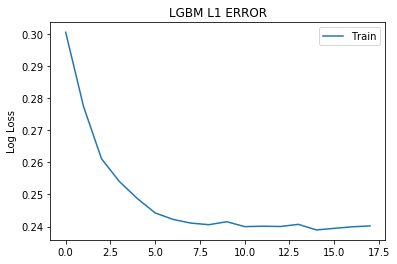

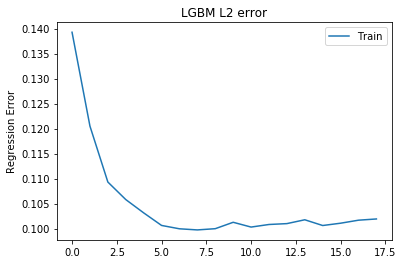

In [39]:
results = gbm_best.evals_result_
epochs = len(results['valid_0']['l1'])
x_axis = range(0, epochs)
# plot l1 error
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['l1'], label='Train')
ax.legend()
plt.ylabel('Log Loss')
plt.title('LGBM L1 ERROR')
plt.show()
# plot l2 error
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['l2'], label='Train')
ax.legend()
plt.ylabel('Regression Error')
plt.title('LGBM L2 error')
plt.show()

In [50]:
#Loading all data and trying to run the model on it

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
from pyspark.sql.types import StructField,StringType,IntegerType,StructType, DoubleType, ShortType, ByteType
data_schema = [StructField("Semana", ByteType(), True),StructField("Agencia_ID", ShortType(), True),
              StructField("Canal_ID", ByteType(), True),StructField("Ruta_SAK", ShortType(), True),
              StructField("Cliente_ID", IntegerType(), True),StructField("Producto_ID", ShortType(), True),
              StructField("Venta_uni_hoy", ShortType(), True),StructField("Venta_hoy", DoubleType(), True),
              StructField("Dev_uni_proxima", IntegerType(), True),StructField("Dev_proxima", DoubleType(), True),
              StructField("Demanda_uni_equil", IntegerType(), True)]
final_struc = StructType(fields=data_schema)
df = spark.read.csv("./train.csv/train.csv", schema=final_struc)

In [4]:
test = df.filter(df['Semana'] == 9).toPandas()

Py4JJavaError: An error occurred while calling o31.collectToPython.
: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:370)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:364)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.foreach(SparkPlan.scala:364)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1(SparkPlan.scala:386)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeCollect$1$adapted(SparkPlan.scala:385)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$2386/1896042975.apply(Unknown Source)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:385)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3448)
	at org.apache.spark.sql.Dataset$$Lambda$1266/612224443.apply(Unknown Source)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset$$Lambda$1267/963197663.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$1275/69283315.apply(Unknown Source)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.execution.SQLExecution$$$Lambda$1268/450063458.apply(Unknown Source)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:763)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3614)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3445)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)


In [5]:
#Tried training the validated model on the whole dataset, but data is not getting loaded in memory. Hence wil have to
#close this Project here due to lack of resources./